# Магазин "Клик в одну точку"

## Описание проекта

Интернет-магазин «В один клик» продаёт разные товары: для детей, для дома, мелкую бытовую технику, косметику и даже продукты. Отчёт магазина за прошлый период показал, что активность покупателей начала снижаться. Привлекать новых клиентов уже не так эффективно: о магазине и так знает большая часть целевой аудитории. Возможный выход — удерживать активность постоянных клиентов. Сделать это можно с помощью персонализированных предложений.
У компании есть небольшой отдел цифровых технологий, и нам предстоит побыть в роли стажёра в этом отделе. 
Итак, нашему отделу поручили разработать решение, которое позволит персонализировать предложения постоянным клиентам, чтобы увеличить их покупательскую активность.

`market_file.csv` - таблица, которая содержит данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении.

- `id` - номер покупателя в корпоративной базе данных
- `Покупательская активность` - рассчитанный класс покупательской активности (целевой признак): «снизилась» или «прежний уровень».
- `Тип сервиса` - уровень сервиса, например «премиум» и «стандарт».
- `Разрешить сообщать` - информация о том, можно ли присылать покупателю дополнительные предложения о товаре. Согласие на это даёт покупатель.
- `Маркет_актив_6_мес` - среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев. Это значение показывает, какое число рассылок, звонков, показов рекламы и прочего приходилось на клиента.
- `Маркет_актив_тек_мес` - количество маркетинговых коммуникаций в текущем месяце.
- `Длительность` - значение, которое показывает, сколько дней прошло с момента регистрации покупателя на сайте.
- `Акционные_покупки` - среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев.
- `Популярная_категория` - самая популярная категория товаров у покупателя за последние 6 месяцев.
- `Средний_просмотр_категорий_за_визит` - показывает, сколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца.
- `Неоплаченные_продукты_штук_квартал` - общее число неоплаченных товаров в корзине за последние 3 месяца.
- `Ошибка_сервиса` - число сбоев, которые коснулись покупателя во время посещения сайта.
- `Страниц_за_визит` - среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца.

`market_money.csv` - таблица с данными о выручке, которую получает магазин с покупателя, то есть сколько покупатель всего потратил за период взаимодействия с сайтом.

- `id` - номер покупателя в корпоративной базе данных.
- `Период` - название периода, во время которого зафиксирована выручка. Например, 'текущий_месяц' или 'предыдущий_месяц'.
- `Выручка` - сумма выручки за период.

`market_time.csv` - таблица с данными о времени (в минутах), которое покупатель провёл на сайте в течение периода.

- `id ` - номер покупателя в корпоративной базе данных.
- `Период` - название периода, во время которого зафиксировано общее время.
- `минут` - значение времени, проведённого на сайте, в минутах.

`money.csv` - таблица с данными о среднемесячной прибыли покупателя за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю

- `id` - номер покупателя в корпоративной базе данных.
- `Прибыль` - значение прибыли.



**Цель проекта:** разработать решение для увеличения покупательской активности.

**Задачи:**
1) Построим модель, которая предскажет вероятность снижения покупательской активности клиента в следующие три месяца.
2) Добавим дополнительные данные финансового департамента о прибыльности клиента: какой доход каждый покупатель приносил компании за последние три месяца.
3) Выделим сегменты покупателей и разработаем для них персонализированные предложения.я

**План работы:**
1) Загрузка данных.
2) Предобработка данных
3) Исследовательский анализ.
4) Объединим таблицы.
5) Корреляционный анализ.
6) Применим пайплайны.
7) Проведем анализ важности признаков.
8) Проанализируем сегментацию покупателей.
9) Подведём итоги.


## Загрузка данных

In [5]:
# для использования линейной алгебры
import numpy as np

# для работы с таблицами
import pandas as pd

# для визуализации
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns

# для разделение данных на выборки
from sklearn.model_selection import train_test_split

# загружаем класс pipeline
from sklearn.pipeline import Pipeline

# загружаем классы для подготовки данных
from sklearn.preprocessing import (
        OneHotEncoder, 
        OrdinalEncoder, 
        StandardScaler, 
        MinMaxScaler, 
        RobustScaler, 
        PolynomialFeatures
)
from sklearn.compose import ColumnTransformer

# загружаем класс для работы с пропусками
from sklearn.impute import SimpleImputer

# загружаем функцию для работы с метриками
from sklearn.metrics import (
        accuracy_score, 
        f1_score, 
        fbeta_score, 
        roc_curve, 
        roc_auc_score, 
        RocCurveDisplay, 
        ConfusionMatrixDisplay 
)

# для построения ROC-кривой
from yellowbrick.classifier.rocauc import roc_auc

# для дисбаланса классов
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from imblearn.combine import SMOTETomek
from sklearn.dummy import DummyClassifier

# импортируем класс GridSearchCV
from sklearn.model_selection import GridSearchCV

# импортируем класс RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

# импортируем класс OptunaSearchCV
from optuna import distributions
from optuna.integration import OptunaSearchCV

# загружаем нужные модели
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# кросс-валидация
from sklearn.model_selection import KFold, cross_val_score

# для отбора признаков
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
from sklearn.tree import plot_tree

# для оценки важности признаков 
from sklearn.inspection import permutation_importance
import shap

# для корреляции
from phik import phik_matrix
from phik.report import plot_correlation_matrix

import warnings

In [6]:
try:
    market_file = pd.read_csv('market_file.csv', sep = ',', decimal = ',')
    market_money = pd.read_csv('market_money.csv', sep = ',', decimal = ',')
    market_time = pd.read_csv('market_time.csv', sep = ',', decimal = ',')
    money = pd.read_csv('money.csv', sep = ';', decimal = ',')
except:
    market_file = pd.read_csv('/datasets/market_file.csv', sep = ',', decimal = ',')
    market_money = pd.read_csv('/datasets/market_money.csv', sep = ',', decimal = ',')
    market_time = pd.read_csv('/datasets/market_time.csv', sep = ',', decimal = ',')
    money = pd.read_csv('/datasets/money.csv', sep = ';', decimal = ',')

In [7]:
display(market_file.head())
display(money.head())
display(market_money.head())
display(market_time.head())

id Покупательская активность Тип сервиса Разрешить сообщать  \
0  215348                 Снизилась     премиум                 да   
1  215349                 Снизилась     премиум                 да   
2  215350                 Снизилась   стандартт                нет   
3  215351                 Снизилась   стандартт                 да   
4  215352                 Снизилась   стандартт                нет   

  Маркет_актив_6_мес  Маркет_актив_тек_мес  Длительность Акционные_покупки  \
0                3.4                     5           121               0.0   
1                4.4                     4           819              0.75   
2                4.9                     3           539              0.14   
3                3.2                     5           896              0.99   
4                5.1                     3          1064              0.94   

  Популярная_категория  Средний_просмотр_категорий_за_визит  \
0     Товары для детей                                    6   
1     Товары для детей                                    4   
2    Домашний текстиль                                    5   
3     Товары для детей                                    5   
4     Товары для детей                                    3   

   Неоплаченные_продукты_штук_квартал  Ошибка_сервиса  Страниц_за_визит  
0                                   2               1                 5  
1                                   4               2                 5  
2                                   2               1                 5  
3                                   0               6                 4  
4                                   2               3                 2

id  Прибыль
0  215348     0.98
1  215349     4.16
2  215350     3.13
3  215351     4.87
4  215352     4.21

id               Период Выручка
0  215348  препредыдущий_месяц     0.0
1  215348        текущий_месяц  3293.1
2  215348     предыдущий_месяц     0.0
3  215349  препредыдущий_месяц  4472.0
4  215349        текущий_месяц  4971.6

id            Период  минут
0  215348     текущий_месяц     14
1  215348  предыдцщий_месяц     13
2  215349     текущий_месяц     10
3  215349  предыдцщий_месяц     12
4  215350     текущий_месяц     13

In [8]:
market_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   id                                   1300 non-null   int64 
 1   Покупательская активность            1300 non-null   object
 2   Тип сервиса                          1300 non-null   object
 3   Разрешить сообщать                   1300 non-null   object
 4   Маркет_актив_6_мес                   1300 non-null   object
 5   Маркет_актив_тек_мес                 1300 non-null   int64 
 6   Длительность                         1300 non-null   int64 
 7   Акционные_покупки                    1300 non-null   object
 8   Популярная_категория                 1300 non-null   object
 9   Средний_просмотр_категорий_за_визит  1300 non-null   int64 
 10  Неоплаченные_продукты_штук_квартал   1300 non-null   int64 
 11  Ошибка_сервиса                       1300 n

In [9]:
money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int64  
 1   Прибыль  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB


In [10]:
market_money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       3900 non-null   int64 
 1   Период   3900 non-null   object
 2   Выручка  3900 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.5+ KB


In [11]:
market_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   Период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB


In [12]:
market_file.describe(include= 'all')

id Покупательская активность Тип сервиса  \
count     1300.000000                      1300        1300   
unique            NaN                         2           3   
top               NaN           Прежний уровень    стандарт   
freq              NaN                       802         914   
mean    215997.500000                       NaN         NaN   
std        375.421985                       NaN         NaN   
min     215348.000000                       NaN         NaN   
25%     215672.750000                       NaN         NaN   
50%     215997.500000                       NaN         NaN   
75%     216322.250000                       NaN         NaN   
max     216647.000000                       NaN         NaN   

       Разрешить сообщать Маркет_актив_6_мес  Маркет_актив_тек_мес  \
count                1300               1300           1300.000000   
unique                  2                 41                   NaN   
top                    да                4.1                   NaN   
freq                  962                 94                   NaN   
mean                  NaN                NaN              4.011538   
std                   NaN                NaN              0.696868   
min                   NaN                NaN              3.000000   
25%                   NaN                NaN              4.000000   
50%                   NaN                NaN              4.000000   
75%                   NaN                NaN              4.000000   
max                   NaN                NaN              5.000000   

        Длительность Акционные_покупки Популярная_категория  \
count    1300.000000              1300                 1300   
unique           NaN                42                    6   
top              NaN              0.24     Товары для детей   
freq             NaN                93                  330   
mean      601.898462               NaN                  NaN   
std       249.856289               NaN                  NaN   
min       110.000000               NaN                  NaN   
25%       405.500000               NaN                  NaN   
50%       606.000000               NaN                  NaN   
75%       806.000000               NaN                  NaN   
max      1079.000000               NaN                  NaN   

        Средний_просмотр_категорий_за_визит  \
count                            1300.00000   
unique                                  NaN   
top                                     NaN   
freq                                    NaN   
mean                                3.27000   
std                                 1.35535   
min                                 1.00000   
25%                                 2.00000   
50%                                 3.00000   
75%                                 4.00000   
max                                 6.00000   

        Неоплаченные_продукты_штук_квартал  Ошибка_сервиса  Страниц_за_визит  
count                          1300.000000     1300.000000       1300.000000  
unique                                 NaN             NaN               NaN  
top                                    NaN             NaN               NaN  
freq                                   NaN             NaN               NaN  
mean                              2.840000        4.185385          8.176923  
std                               1.971451        1.955298          3.978126  
min                               0.000000        0.000000          1.000000  
25%                               1.000000        3.000000          5.000000  
50%                               3.000000        4.000000          8.000000  
75%                               4.000000        6.000000         11.000000  
max                              10.000000        9.000000         20.000000

In [13]:
money.describe(include= 'all')

id      Прибыль
count    1300.000000  1300.000000
mean   215997.500000     3.996631
std       375.421985     1.013722
min    215348.000000     0.860000
25%    215672.750000     3.300000
50%    215997.500000     4.045000
75%    216322.250000     4.670000
max    216647.000000     7.430000

In [14]:
market_money.describe(include= 'all')

id               Период Выручка
count     3900.000000                 3900    3900
unique            NaN                    3    2776
top               NaN  препредыдущий_месяц  4729.0
freq              NaN                 1300       8
mean    215997.500000                  NaN     NaN
std        375.325686                  NaN     NaN
min     215348.000000                  NaN     NaN
25%     215672.750000                  NaN     NaN
50%     215997.500000                  NaN     NaN
75%     216322.250000                  NaN     NaN
max     216647.000000                  NaN     NaN

In [15]:
market_time.describe(include= 'all')

id         Период        минут
count     2600.000000           2600  2600.000000
unique            NaN              2          NaN
top               NaN  текущий_месяц          NaN
freq              NaN           1300          NaN
mean    215997.500000            NaN    13.336154
std        375.349754            NaN     4.080198
min     215348.000000            NaN     4.000000
25%     215672.750000            NaN    10.000000
50%     215997.500000            NaN    13.000000
75%     216322.250000            NaN    16.000000
max     216647.000000            NaN    23.000000

Выводы:
1) Пропусков не обнаружено.
2) Не везде корректно указано название столбцов.
3) Данные столбца `период` записаны с ошибками.
4) Данные столбца `выручка`, `Маркет_актив_тек_мес`, `Акционные_покупки` имеют тип данныx object, хотя там указы непреврвыные величины.
5) Разделение вещественных чисел заменено на `.`.
6) Попадются  значения сильно отличающиеся от медианного, возмозможно это выбросы или аномальные значения.

## Предобрботка данных

### Обработка названий столбцов

In [19]:
market_file.columns = market_file.columns.str.lower()
market_money.columns = market_money.columns.str.lower()
market_time.columns = market_time.columns.str.lower()
money.columns = money.columns.str.lower()

In [20]:
display(market_file.head())
display(money.head())
display(market_money.head())
display(market_time.head())

id покупательская активность тип сервиса разрешить сообщать  \
0  215348                 Снизилась     премиум                 да   
1  215349                 Снизилась     премиум                 да   
2  215350                 Снизилась   стандартт                нет   
3  215351                 Снизилась   стандартт                 да   
4  215352                 Снизилась   стандартт                нет   

  маркет_актив_6_мес  маркет_актив_тек_мес  длительность акционные_покупки  \
0                3.4                     5           121               0.0   
1                4.4                     4           819              0.75   
2                4.9                     3           539              0.14   
3                3.2                     5           896              0.99   
4                5.1                     3          1064              0.94   

  популярная_категория  средний_просмотр_категорий_за_визит  \
0     Товары для детей                                    6   
1     Товары для детей                                    4   
2    Домашний текстиль                                    5   
3     Товары для детей                                    5   
4     Товары для детей                                    3   

   неоплаченные_продукты_штук_квартал  ошибка_сервиса  страниц_за_визит  
0                                   2               1                 5  
1                                   4               2                 5  
2                                   2               1                 5  
3                                   0               6                 4  
4                                   2               3                 2

id  прибыль
0  215348     0.98
1  215349     4.16
2  215350     3.13
3  215351     4.87
4  215352     4.21

id               период выручка
0  215348  препредыдущий_месяц     0.0
1  215348        текущий_месяц  3293.1
2  215348     предыдущий_месяц     0.0
3  215349  препредыдущий_месяц  4472.0
4  215349        текущий_месяц  4971.6

id            период  минут
0  215348     текущий_месяц     14
1  215348  предыдцщий_месяц     13
2  215349     текущий_месяц     10
3  215349  предыдцщий_месяц     12
4  215350     текущий_месяц     13

In [21]:
market_file = market_file.rename(columns={'покупательская активность':'покупательская_активность',
                                'тип сервиса':'тип_сервиса', 
                                'разрешить сообщать':'разрешить_сообщать'
                                })

In [22]:
market_file.head()

id покупательская_активность тип_сервиса разрешить_сообщать  \
0  215348                 Снизилась     премиум                 да   
1  215349                 Снизилась     премиум                 да   
2  215350                 Снизилась   стандартт                нет   
3  215351                 Снизилась   стандартт                 да   
4  215352                 Снизилась   стандартт                нет   

  маркет_актив_6_мес  маркет_актив_тек_мес  длительность акционные_покупки  \
0                3.4                     5           121               0.0   
1                4.4                     4           819              0.75   
2                4.9                     3           539              0.14   
3                3.2                     5           896              0.99   
4                5.1                     3          1064              0.94   

  популярная_категория  средний_просмотр_категорий_за_визит  \
0     Товары для детей                                    6   
1     Товары для детей                                    4   
2    Домашний текстиль                                    5   
3     Товары для детей                                    5   
4     Товары для детей                                    3   

   неоплаченные_продукты_штук_квартал  ошибка_сервиса  страниц_за_визит  
0                                   2               1                 5  
1                                   4               2                 5  
2                                   2               1                 5  
3                                   0               6                 4  
4                                   2               3                 2

Поменяли все название столбцов на строчное прописание. 

Названия `покупательская активность`, `тип сервиса`, `разрешить сообщать` записали через нижний регистр

### Обработка пропусков 

In [25]:
market_file.isna().sum()

id                                     0
покупательская_активность              0
тип_сервиса                            0
разрешить_сообщать                     0
маркет_актив_6_мес                     0
маркет_актив_тек_мес                   0
длительность                           0
акционные_покупки                      0
популярная_категория                   0
средний_просмотр_категорий_за_визит    0
неоплаченные_продукты_штук_квартал     0
ошибка_сервиса                         0
страниц_за_визит                       0
dtype: int64

In [26]:
market_money.isna().sum()

id         0
период     0
выручка    0
dtype: int64

In [27]:
market_time.isna().sum()

id        0
период    0
минут     0
dtype: int64

In [28]:
money.isna().sum()

id         0
прибыль    0
dtype: int64

Пропусков не найдено.

### Изменение типа данных

In [31]:
market_file['маркет_актив_6_мес'] = pd.to_numeric(market_file['маркет_актив_6_мес'])
market_file['акционные_покупки'] = pd.to_numeric(market_file['акционные_покупки'])
market_money['выручка'] = pd.to_numeric(market_money['выручка'])

In [32]:
market_file['маркет_актив_6_мес'].dtype

dtype('float64')

In [33]:
market_file['акционные_покупки'].dtype

dtype('float64')

In [34]:
market_money['выручка'].dtype

dtype('float64')

Изменили в столбцах `маркет_актив_6_мес`, `акционные_покупки`, `выручка` тип данных  с str на float. 

### Обработка дубликатов

Для начала проверим уникальные значения в столбцах с типом данных str.

In [38]:
#Будем использовать метод unique()
market_file['покупательская_активность'].unique()

array(['Снизилась', 'Прежний уровень'], dtype=object)

Здесь все хорошо.

In [40]:
market_file['тип_сервиса'].unique()

array(['премиум', 'стандартт', 'стандарт'], dtype=object)

Здесь нужно поменять 'стандартт' на 'стандарт'

In [42]:
# с помощью метода replace() изменим 'стандартт' на 'стандарт'
market_file['тип_сервиса'] = market_file['тип_сервиса'].replace('стандартт', 'стандарт')

In [43]:
# проверим изменение
market_file['тип_сервиса'].unique()

array(['премиум', 'стандарт'], dtype=object)

In [44]:
market_file['разрешить_сообщать'].unique()

array(['да', 'нет'], dtype=object)

Здесь все хорошо.


In [46]:
market_file['популярная_категория'].unique()

array(['Товары для детей', 'Домашний текстиль', 'Косметика и аксесуары',
       'Техника для красоты и здоровья', 'Кухонная посуда',
       'Мелкая бытовая техника и электроника'], dtype=object)

Ошибок не обнаружено.

In [48]:
market_money['период'].unique()

array(['препредыдущий_месяц', 'текущий_месяц', 'предыдущий_месяц'],
      dtype=object)

Здес все хорошо. 

In [50]:
market_time['период'].unique()

array(['текущий_месяц', 'предыдцщий_месяц'], dtype=object)

Заменим 'предыдцщий_месяц' на 'предыдущий_месяц'


In [52]:
# с помощью метода replace() изменим 'предыдцщий_месяц' на 'предыдущий_месяц'
market_time['период'] = market_time['период'].replace('предыдцщий_месяц', 'предыдущий_месяц')

In [53]:
# проверим изменение
market_time['период'].unique()

array(['текущий_месяц', 'предыдущий_месяц'], dtype=object)

Теперь проверим явные дубликаты.

In [55]:
# методами duplicated() и sum() найдем кол-во явных дубликатов
market_file.duplicated().sum()

0

In [56]:
market_money.duplicated().sum()

0

In [57]:
market_time.duplicated().sum()

0

In [58]:
money.duplicated().sum()

0

Явные дубликаты не найдены.

Проверим неявные.

In [60]:
# проверим дубликаты по столбцу `id`
market_file['id'].duplicated().sum()

0

In [61]:
# проверим дубликаты по столбцу 'id', 'период'
market_time[['id', 'период']].duplicated().sum()

0

In [62]:
# проверим дубликаты по столбцу `id`
money['id'].duplicated().sum()

0

Не явные дубликаты не найдены.

Итог:
1) Название столбцов изменены на нижний регистр.
2) Названия `покупательская_активность`, `тип_сервиса`, `разрешить_сообщать` записали через нижний регистр.
3) Пропуски не найдены.
4) Изменили тип данные с object на float в столбцах маркет_актив_6_мес, акционные_покупки, выручка.
5) Заменили предыдцщий_месяц на предыдущий_месяц.
6) 
Заменили стандартт на стандар776) Явные и неявные дубликаты не обнаружены.

## Исследовательский анализ данных 

Задачи:
1) Построить графики распределения, круговые диграммы и диграммы размаха.
2) Сделать выводы на их основе.
3) Отобрать клиентов с покупательской активностью не менее 3 месяцев.
4) Сравнить две группы клиентов с разной покупательской активностью.

### Общий исследовательский анализ данных

In [68]:
#Создам функцию для построения гистораммы и диаграммы размаха
try:
    def build_histogram_boxplot(data_set, name_plt, name_x, bins):

        print(data_set.describe())
        
        fig, axes = plt.subplots(nrows = 1, ncols = 2)
        plt.subplots_adjust(wspace=0.5, hspace=0.5, right = 2)
        plt.title(name_plt, x=-0.5, y= 1)
         
        
        axes[0].set_ylabel('кол-во повторений')
        axes[0].set_xlabel(name_x)

       
        axes[1].set_xlabel(name_x)
            
        axes[0].hist(data_set, bins = bins)
        axes[1].boxplot(data_set, vert = False)
        plt.show()
except:
    print('Что то пошло не так(')

In [69]:
#Создадим функцию для построения круговой диагрммы
try:
    def build_pie(data_series, name_pie):
        data_series.value_counts().plot(kind = 'pie', autopct="%0.0f%%")
        plt.ylabel('')
        plt.title(name_pie)
        plt.show()
except:
    print('Что то пошло не так(')       

count    1300.000000
mean        4.253769
std         1.014814
min         0.900000
25%         3.700000
50%         4.200000
75%         4.900000
max         6.600000
Name: маркет_актив_6_мес, dtype: float64


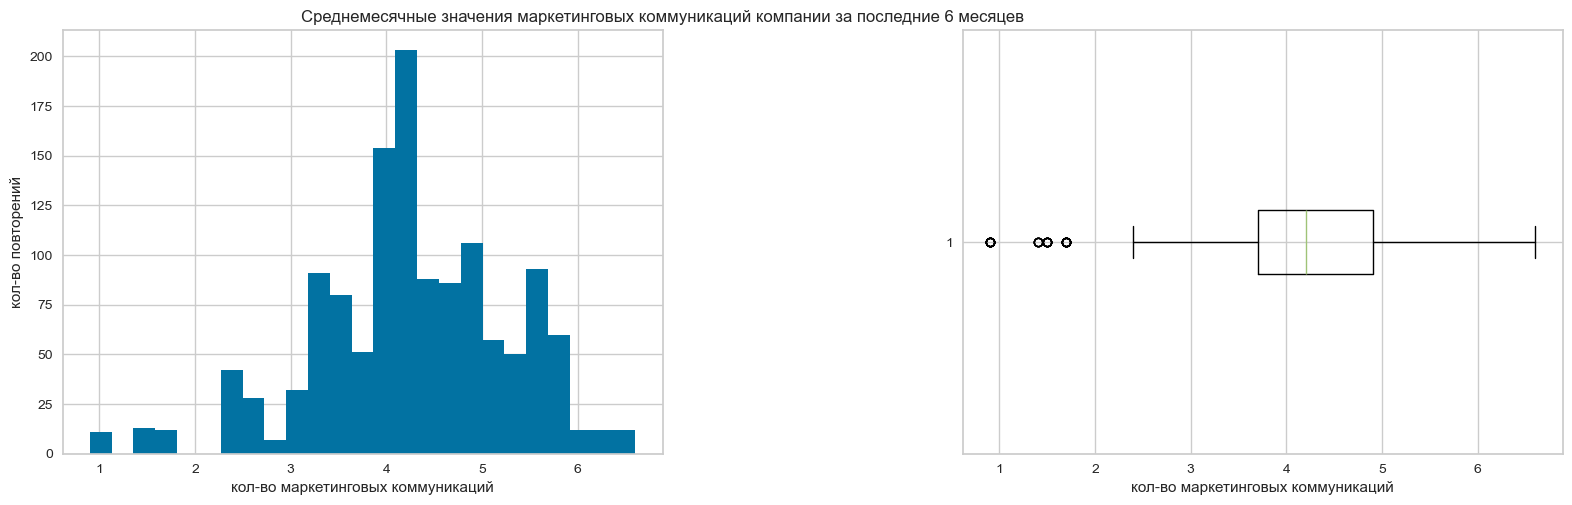

In [70]:
build_histogram_boxplot(
    market_file['маркет_актив_6_мес'], 
    'Среднемесячные значения маркетинговых коммуникаций компании за последние 6 месяцев',
    'кол-во маркетинговых коммуникаций', 
    25
)

75% данных лежит в диапазоне от 2.3 до 4.9.
Замечаны выбросы, но данные значение вполне вероятны. 

count    1300.000000
mean        4.011538
std         0.696868
min         3.000000
25%         4.000000
50%         4.000000
75%         4.000000
max         5.000000
Name: маркет_актив_тек_мес, dtype: float64


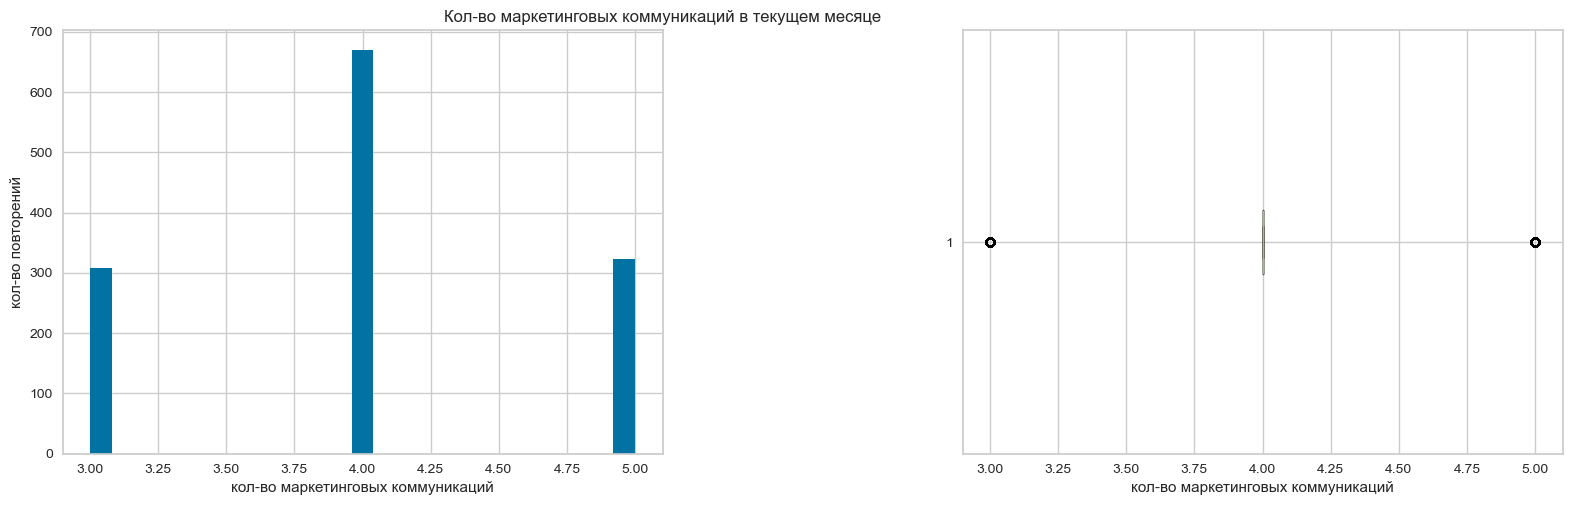

In [72]:
build_histogram_boxplot(
    market_file['маркет_актив_тек_мес'], 
    'Кол-во маркетинговых коммуникаций в текущем месяце',
    'кол-во маркетинговых коммуникаций', 
    25
)

Скорей всего это категориальный признак. Возможно стратегия компании основа на том что нужно предлагать именно 3,4, и 5 маркетинговых коммуникаций в месяц.

Посмотрим процентное соотношение.

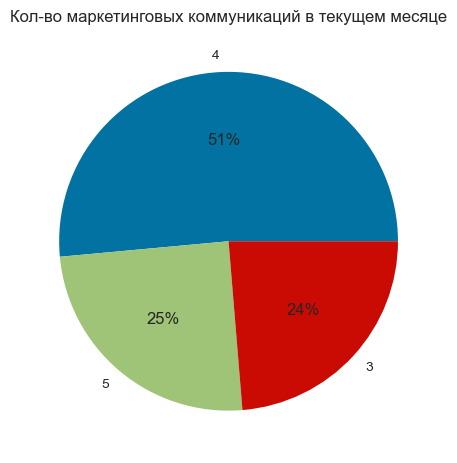

In [74]:
build_pie(market_file['маркет_актив_тек_мес'], 'Кол-во маркетинговых коммуникаций в текущем месяце')

4 каких - либо маркетинговых коммуникаций использовалось в 51% случаи.

Остальное кол-во маркетинговых коммуникаций равное 5 или 3 использовались в 25% и 24% случаях.

Меньше 3 и больше 5 каких - либо маркетинговых коммуникаций компания не использовала, опять же это может быть связано с стратегией компании по привлечению клиентов.

count    1300.000000
mean      601.898462
std       249.856289
min       110.000000
25%       405.500000
50%       606.000000
75%       806.000000
max      1079.000000
Name: длительность, dtype: float64


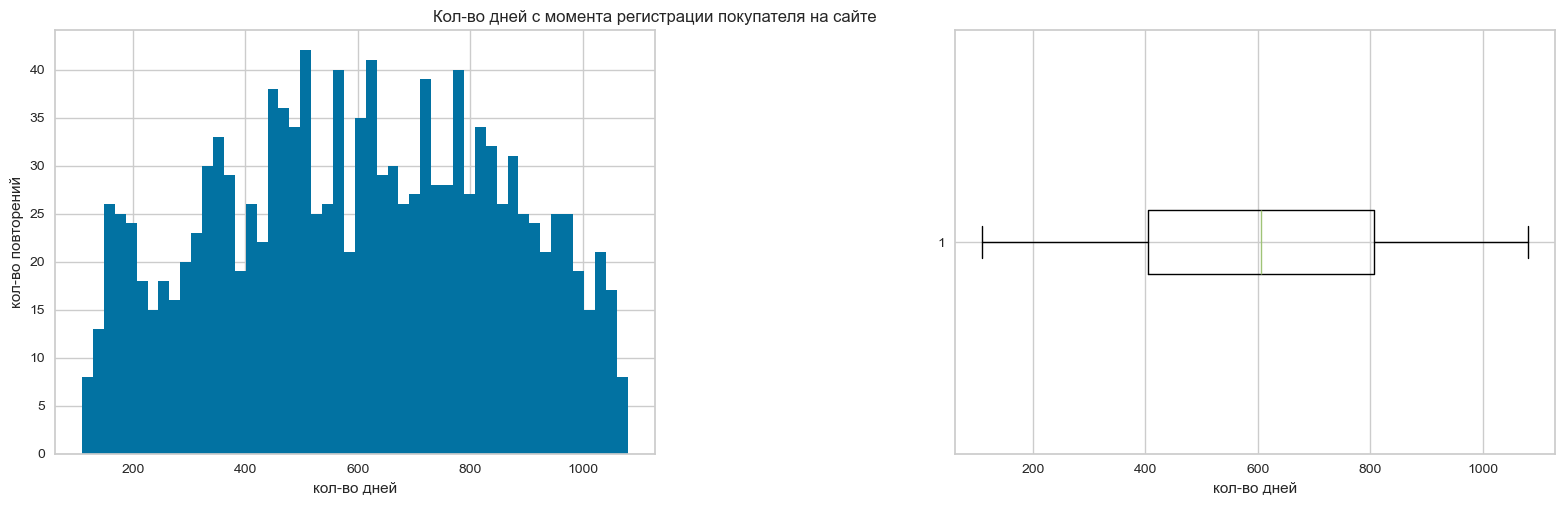

In [76]:
build_histogram_boxplot(
    market_file['длительность'], 
    'Кол-во дней с момента регистрации покупателя на сайте',
    'кол-во дней', 
    50
)

В 75% случаях кол-во дней с момента регистрации покупателя на сайте находится в диапазоне от 110 до 806 дней. Значения выше не выглядят как выбросы или аномалии.

count    1300.000000
mean        0.319808
std         0.249843
min         0.000000
25%         0.170000
50%         0.240000
75%         0.300000
max         0.990000
Name: акционные_покупки, dtype: float64


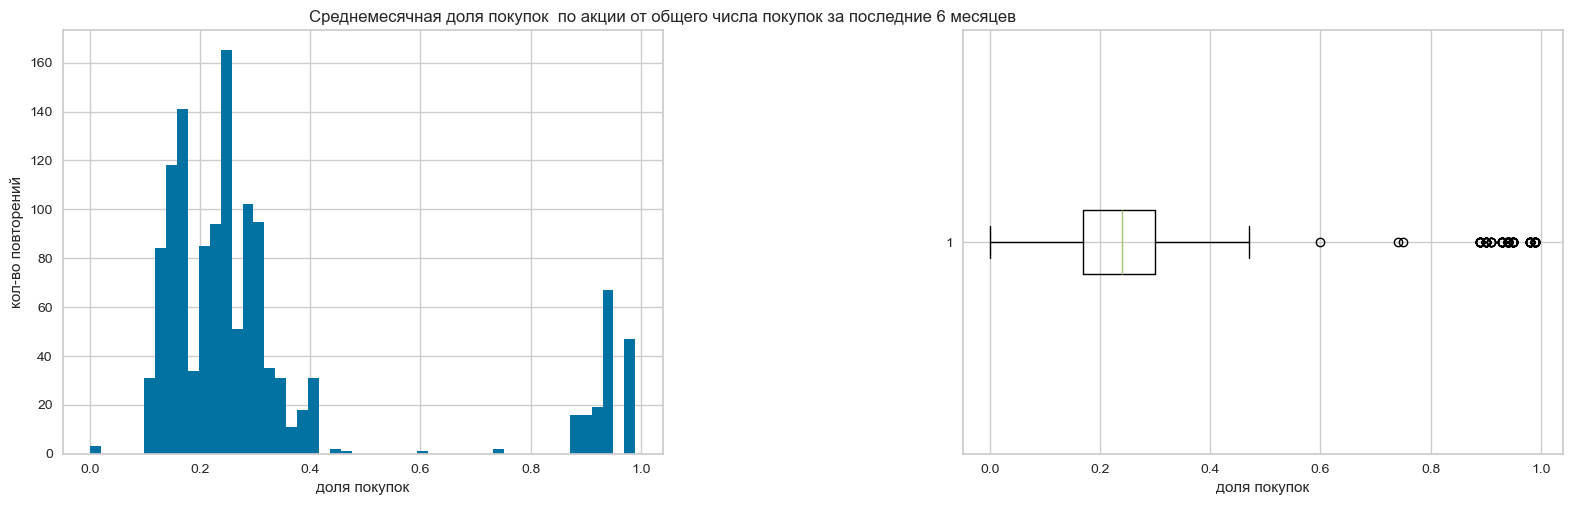

In [78]:
build_histogram_boxplot(
    market_file['акционные_покупки'], 
    'Среднемесячная доля покупок  по акции от общего числа покупок за последние 6 месяцев',
    'доля покупок', 
    50
)

В основом доля покупок по акции от общего числа лежит в диапазоне от 0 до 0.3.

Выделяется отдельная группа, которая в основном покупает по акции.



count    1300.00000
mean        3.27000
std         1.35535
min         1.00000
25%         2.00000
50%         3.00000
75%         4.00000
max         6.00000
Name: средний_просмотр_категорий_за_визит, dtype: float64


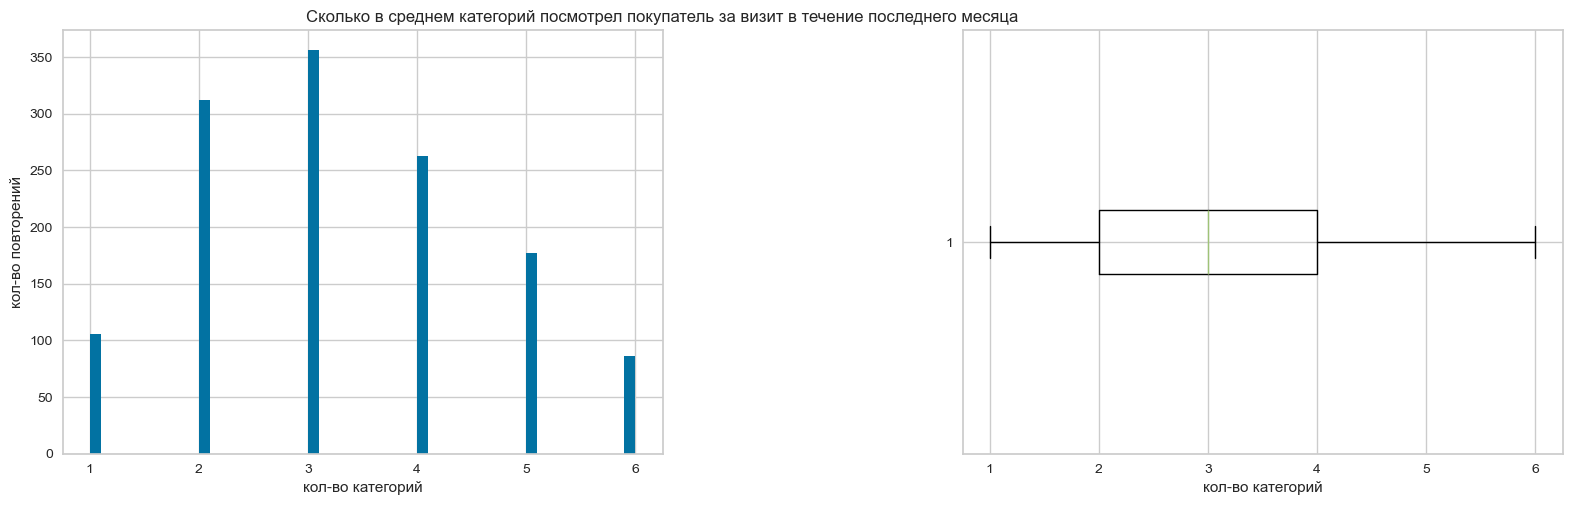

In [80]:
build_histogram_boxplot(
    market_file['средний_просмотр_категорий_за_визит'], 
    'Сколько в среднем категорий посмотрел покупатель за визит в течение последнего месяца',
    'кол-во категорий', 
    50
)

Больше походит на категориальный признак. Посмотрим на процентное соотношение.

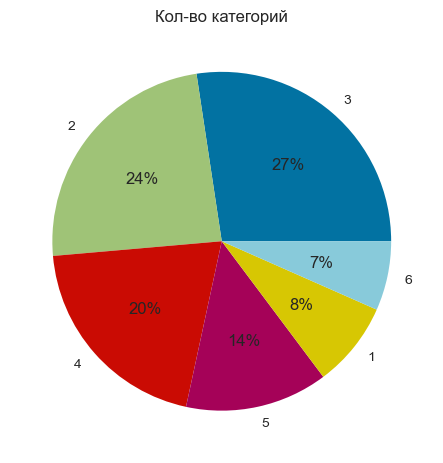

In [82]:
build_pie(market_file['средний_просмотр_категорий_за_визит'], 'Кол-во категорий')

В основном покупатель за визит смотрит на 2 - 4 категории

count    1300.000000
mean        2.840000
std         1.971451
min         0.000000
25%         1.000000
50%         3.000000
75%         4.000000
max        10.000000
Name: неоплаченные_продукты_штук_квартал, dtype: float64


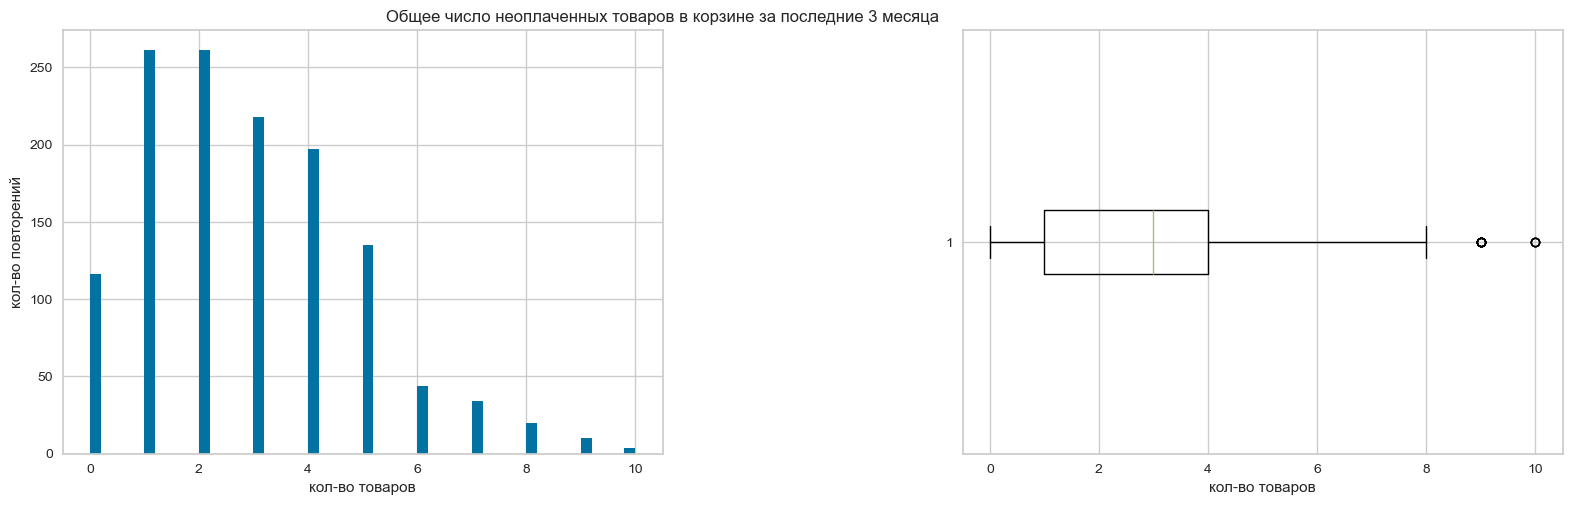

In [84]:
build_histogram_boxplot(
    market_file['неоплаченные_продукты_штук_квартал'], 
    'Общее число неоплаченных товаров в корзине за последние 3 месяца',
    'кол-во товаров', 
    50
)

В основном кол-во неоплаченного товара за последние 3 месяца не больше 4.

Попадаются выбросы, но они вполне реальны, думаю лучше оствить.

Здесь также можно рассмотреть данные как категорильный признак от 0 до 10.

count    1300.000000
mean        4.185385
std         1.955298
min         0.000000
25%         3.000000
50%         4.000000
75%         6.000000
max         9.000000
Name: ошибка_сервиса, dtype: float64


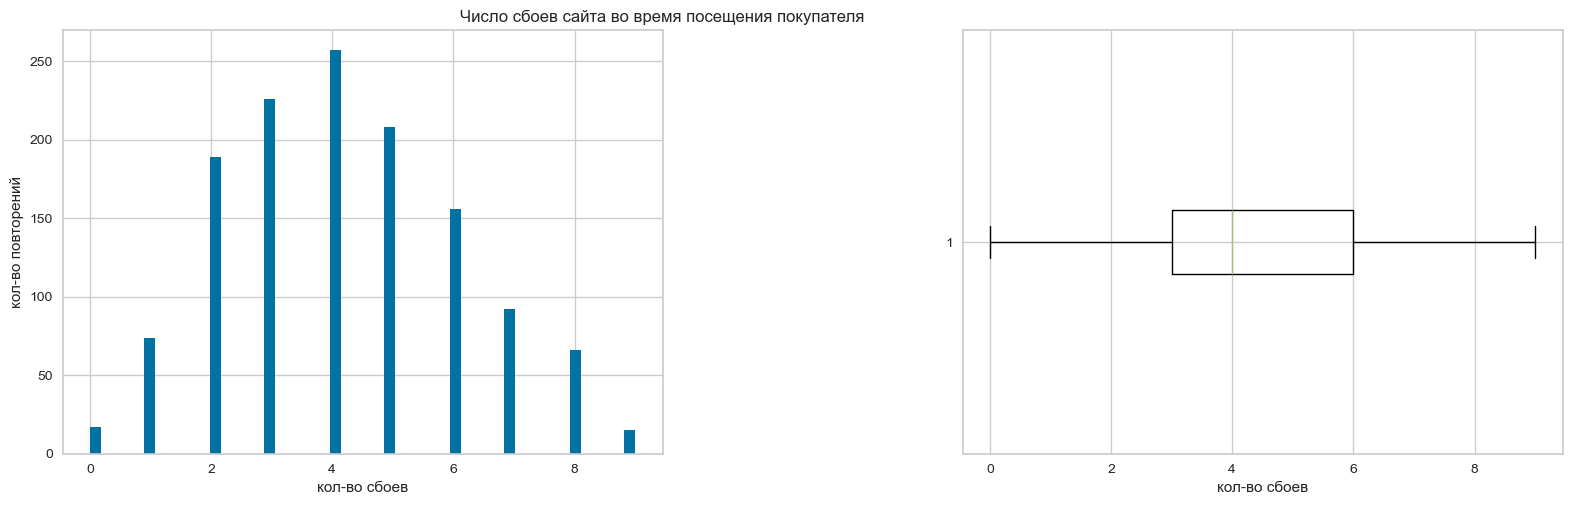

In [86]:
build_histogram_boxplot(
    market_file['ошибка_сервиса'], 
    'Число сбоев сайта во время посещения покупателя',
    'кол-во сбоев', 
    50
)

Данные распределены нормально. 

Можно выделить как категориальный признака от 0 до 9.

count    1300.000000
mean        8.176923
std         3.978126
min         1.000000
25%         5.000000
50%         8.000000
75%        11.000000
max        20.000000
Name: страниц_за_визит, dtype: float64


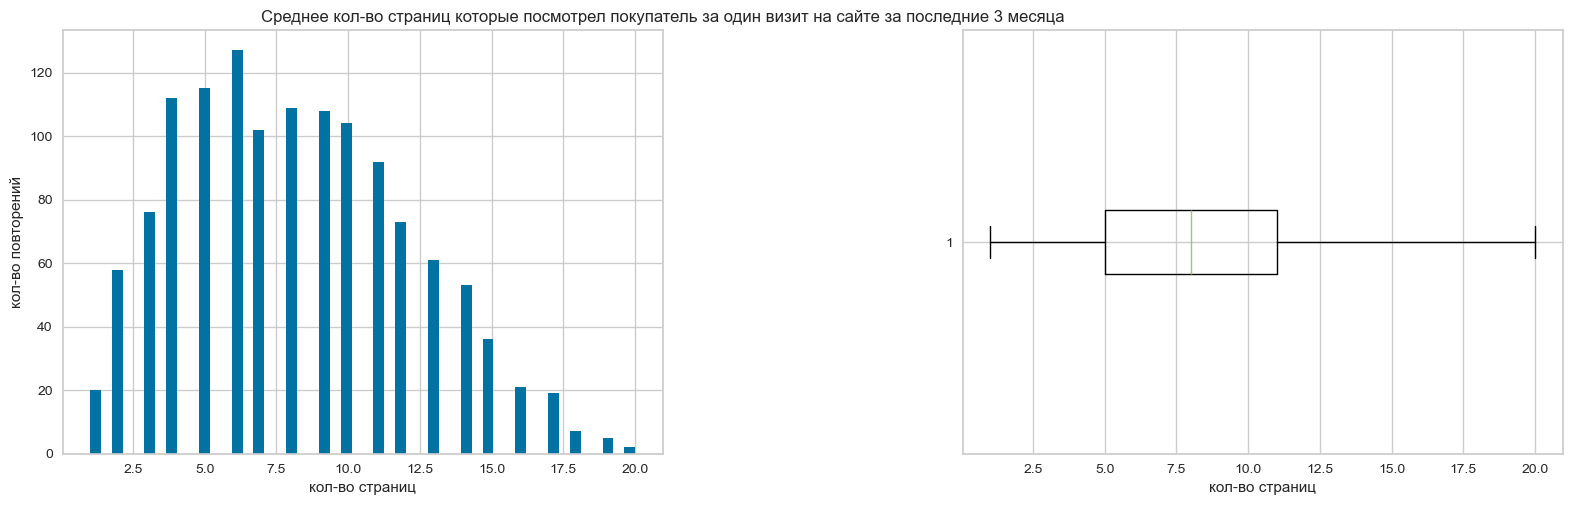

In [88]:
build_histogram_boxplot(
    market_file['страниц_за_визит'], 
    'Среднее кол-во страниц которые посмотрел покупатель за один визит на сайте за последние 3 месяца',
    'кол-во страниц', 
    50
)

Данные распределены нормально. В основном пользователи смотрят не больше 11 страниц. 

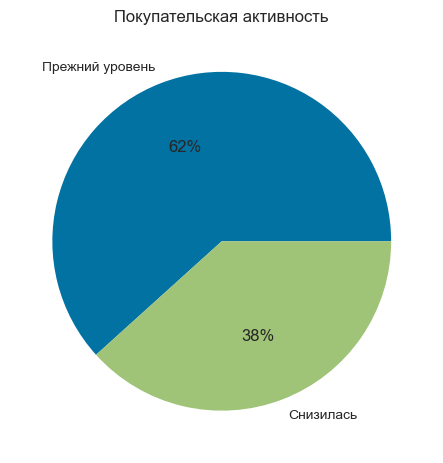

In [90]:
build_pie(market_file['покупательская_активность'], 'Покупательская активность')

В основном активность покупателей держится на прежнем уровне. 

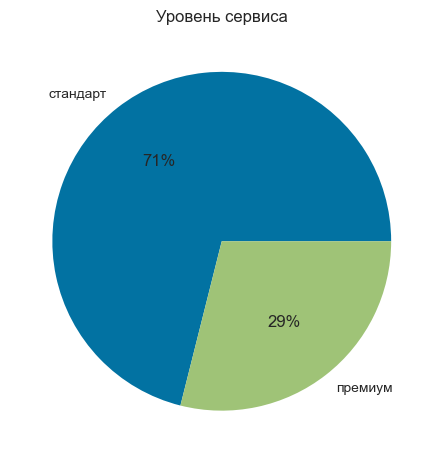

In [92]:
build_pie(market_file['тип_сервиса'], 'Уровень сервиса')

Пользователи предпочитают стандартный тип сервиса.

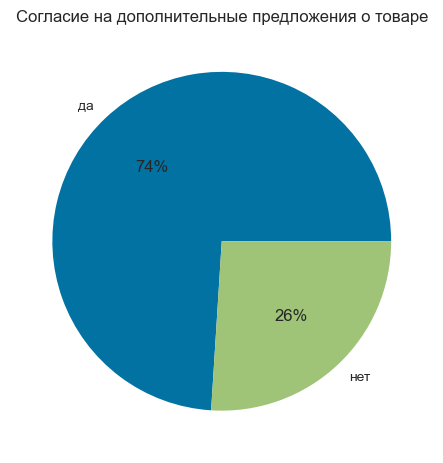

In [94]:
build_pie(market_file['разрешить_сообщать'], 'Согласие на дополнительные предложения о товаре')

Большинство клиентов соглашаются на дополнительные предложения о товаре.

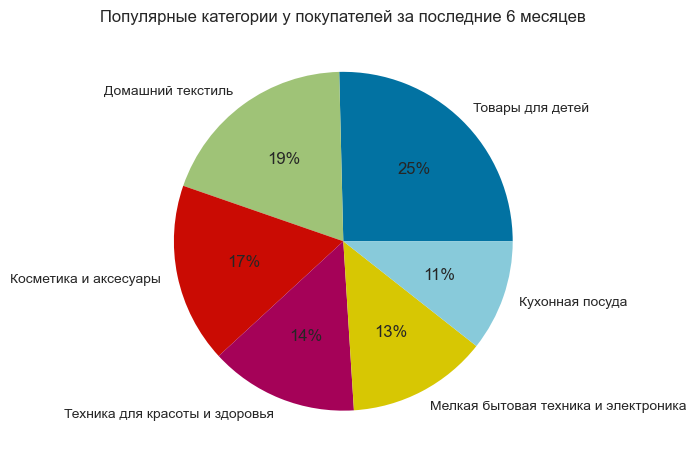

In [96]:
build_pie(market_file['популярная_категория'], 'Популярные категории у покупателей за последние 6 месяцев')

Возможно, категории: кухонная посуда, мелкая бытовая техника и электроника и техника для красоты и здоровья обычно содержат такие продукты, которых хватает на долго поэтому данные категории менее популярны их реже покупают. Остальные категории имеют вещи, которых может хватить на небольшой срок, поэтому их чаще берут. 


count    1300.000000
mean        3.996631
std         1.013722
min         0.860000
25%         3.300000
50%         4.045000
75%         4.670000
max         7.430000
Name: прибыль, dtype: float64


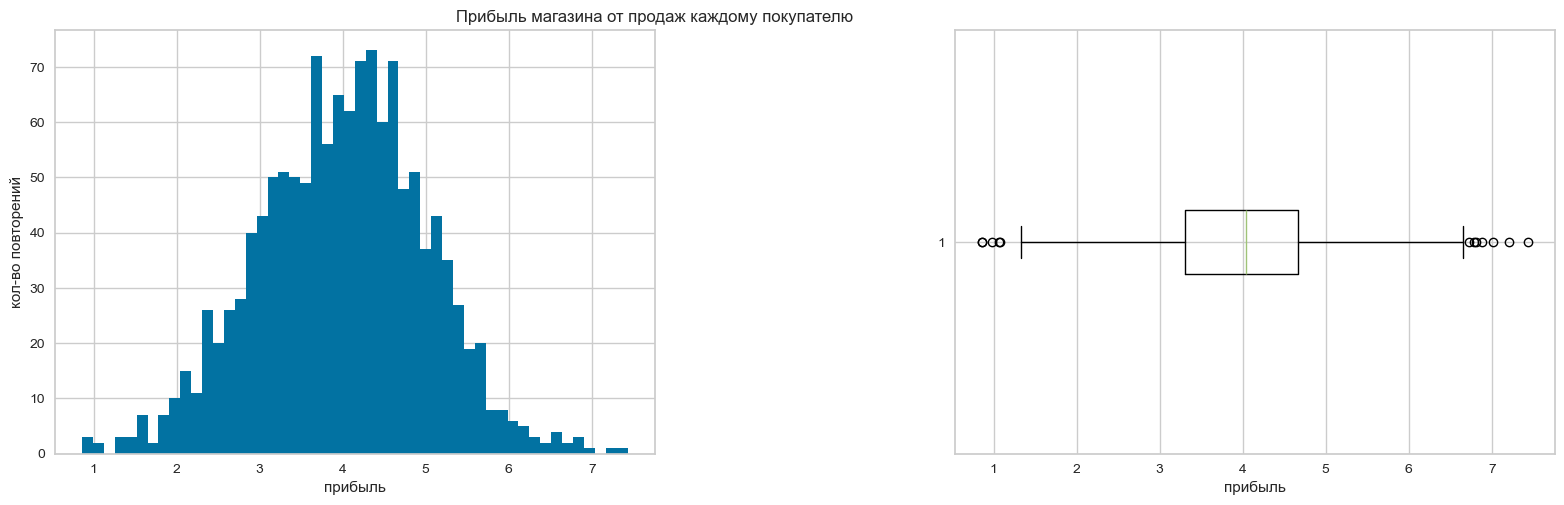

In [98]:
build_histogram_boxplot(
    money['прибыль'], 
    'Прибыль магазина от продаж каждому покупателю',
    'прибыль', 
    50
)

Данные распределены нормально, попадаются небольшие выбросы.

count      3900.000000
mean       5025.696051
std        1777.704104
min           0.000000
25%        4590.150000
50%        4957.500000
75%        5363.000000
max      106862.200000
Name: выручка, dtype: float64


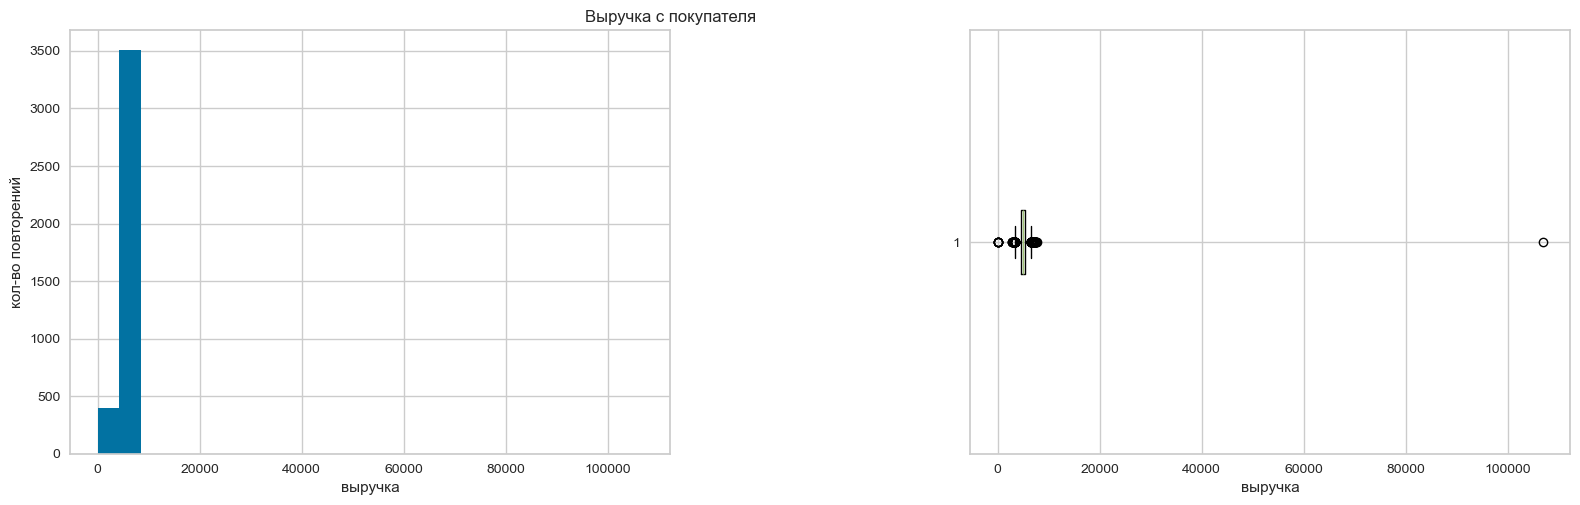

In [100]:
# распределение вырычки за весь период
build_histogram_boxplot(
    market_money['выручка'], 
    'Выручка с покупателя',
    'выручка', 
    25
)

Попадются аномальные значения и выбросы. Посмотрим на их поподробней.

In [102]:
# надём пользователей с аномальными значениями
market_money[market_money['выручка'] > 10000]

id         период   выручка
98  215380  текущий_месяц  106862.2

In [103]:
# посмотрим сколько тратил пользователь в другие периоды
market_money[market_money['id'] == 215380]

id               период   выручка
96  215380  препредыдущий_месяц    5051.0
97  215380     предыдущий_месяц    6077.0
98  215380        текущий_месяц  106862.2

Скорей всего возникла какая - либо ошибка, был сбой в системе или пользователь действительно совершил дорогую покупку. Так как такой случай один, и он только может помешать, лучше его удалить.

In [105]:
# удалим из всех датасетов аномального пользователя с id 215380
market_file = market_file[market_file['id'] != 215380].reset_index(drop = True)
market_money = market_money[market_money['id'] != 215380].reset_index(drop = True)
market_time = market_time[market_time['id'] != 215380].reset_index(drop = True)
money = money[money['id'] != 215380].reset_index(drop = True)

count    3897.000000
mean     4999.287760
std       706.970089
min         0.000000
25%      4590.000000
50%      4956.000000
75%      5363.000000
max      7799.400000
Name: выручка, dtype: float64


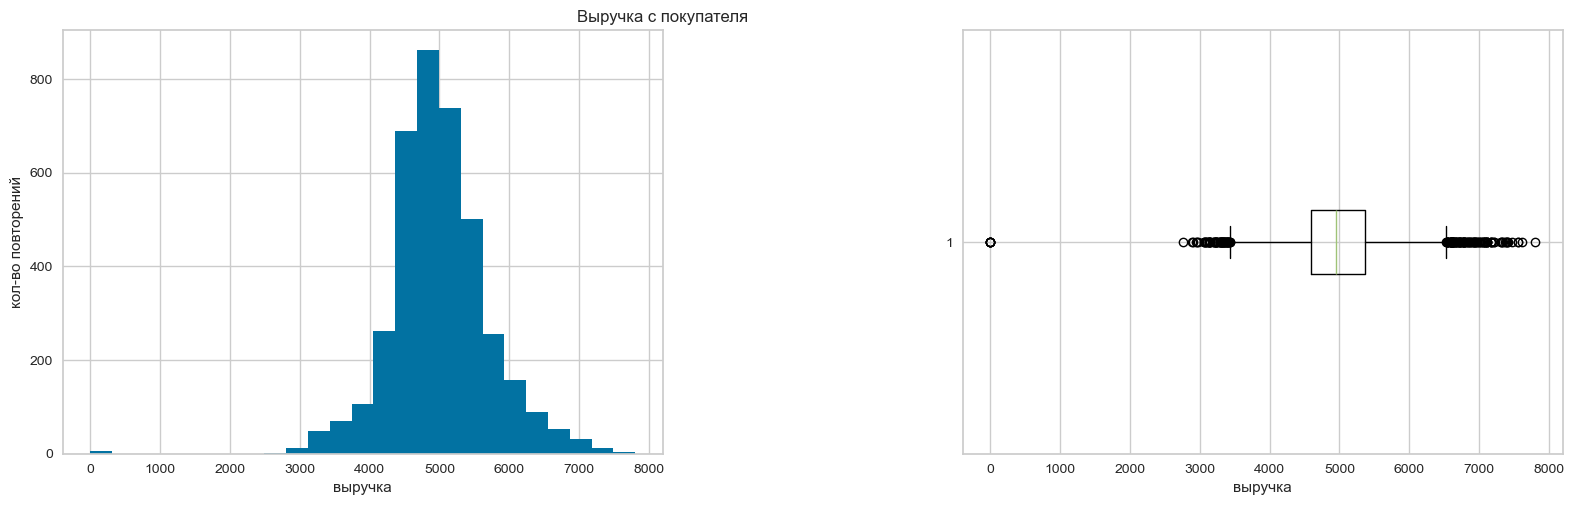

In [106]:
# посмтотрим как изменилось распределение выручки за весь период
build_histogram_boxplot(
    market_money['выручка'], 
    'Выручка с покупателя',
    'выручка', 
    25
)

Расределение стало лучше, но попадаются нулевые значения, посмотрим на таких пользователей.

In [108]:
# пользователи с нулевой выручкой
market_money[market_money['выручка'] == 0]

id               период  выручка
0   215348  препредыдущий_месяц      0.0
2   215348     предыдущий_месяц      0.0
28  215357  препредыдущий_месяц      0.0
29  215357     предыдущий_месяц      0.0
34  215359     предыдущий_месяц      0.0
35  215359  препредыдущий_месяц      0.0

In [109]:
# посмотрим выручку одного из пользователей
market_money[market_money['id'] == 215357]

id               период  выручка
27  215357        текущий_месяц   5986.3
28  215357  препредыдущий_месяц      0.0
29  215357     предыдущий_месяц      0.0

Получается это такик клиенты, которые делали покупки только в текущем месяце. Возможно появились какие-то акции, интересные предложения, и они решели купить. В принципе они приносят прибыль, но искажают данные для модели. Посмотрим на суммарную выручку за все периоды каждого клиента.

count     1299.000000
mean     14997.863279
std       1656.706215
min       3293.100000
25%      13942.300000
50%      15071.100000
75%      16085.550000
max      19766.500000
Name: выручка, dtype: float64


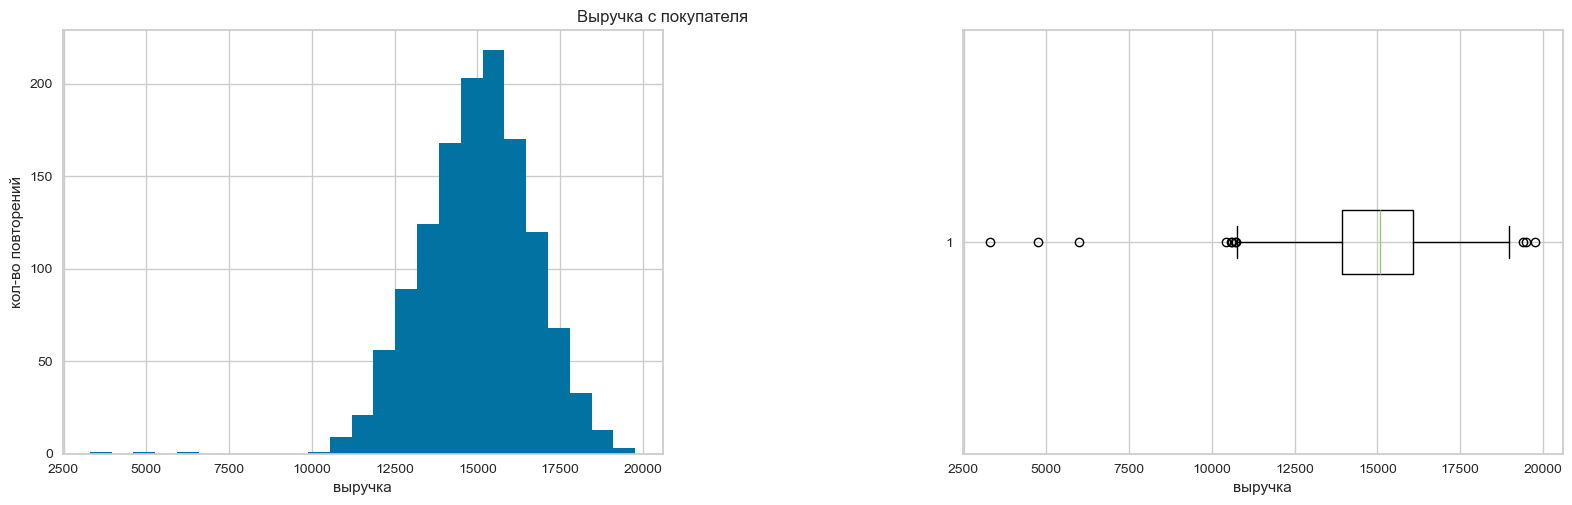

In [111]:
# посмотрим на суммарные выручки от каждого пользователя
build_histogram_boxplot(
    market_money.pivot_table(index = 'id', values = 'выручка', aggfunc = 'sum')['выручка'], 
    'Выручка с покупателя',
    'выручка', 
    25
)

Расределение выглядит нормально, но опять попадаются три выброса, это те клиенты которые совершили покупки только в текущем месяце. Так как их не так много и они искажают данные, удалим их.

In [113]:
# удалим из всех датасетов пользователей с низкой выручкой  с id 215348, 215357, 215359
market_file = market_file[~market_file['id'].isin([215348, 215357, 215359])].reset_index(drop = True)
market_money = market_money[~market_money['id'].isin([215348, 215357, 215359])].reset_index(drop = True)
market_time = market_time[~market_time['id'].isin([215348, 215357, 215359])].reset_index(drop = True)
money = money[~money['id'].isin([215348, 215357, 215359])].reset_index(drop = True)

In [114]:
# проверим размер таблиц после удаления выбросов методом shape
market_file.shape

(1296, 13)

In [115]:
market_money.shape

(3888, 3)

In [116]:
market_time.shape

(2592, 3)

In [117]:
money.shape

(1296, 2)

count     1296.000000
mean     15021.766975
std       1581.337135
min      10437.600000
25%      13954.325000
50%      15072.550000
75%      16087.025000
max      19766.500000
Name: выручка, dtype: float64


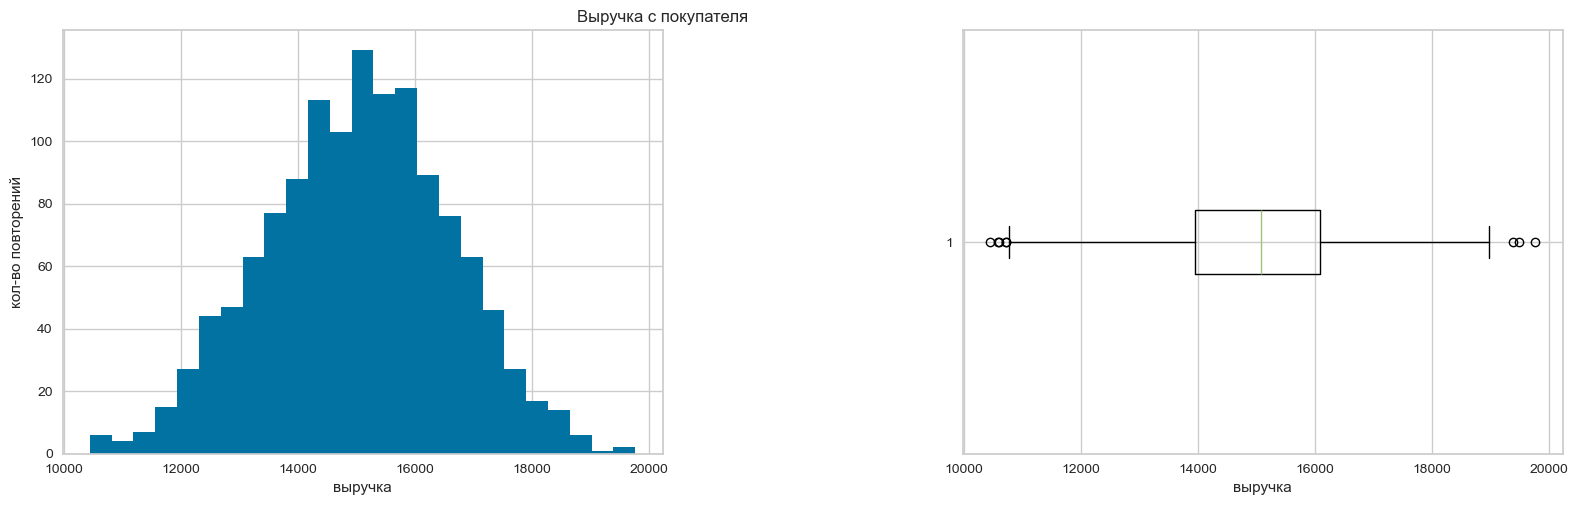

In [118]:
# посмотрим на суммарные выручки от каждого пользователя после удаления подозрительных покупателей
build_histogram_boxplot(
    market_money.pivot_table(index = 'id', values = 'выручка', aggfunc = 'sum')['выручка'], 
    'Выручка с покупателя',
    'выручка', 
    25
)

Теперь распределение выглядит лучше.

За три месяца 75% пользователей тратят от 10437 до 16087. Остальная часть платит больше.

count    2592.000000
mean       13.340664
std         4.083469
min         4.000000
25%        10.000000
50%        13.000000
75%        16.000000
max        23.000000
Name: минут, dtype: float64


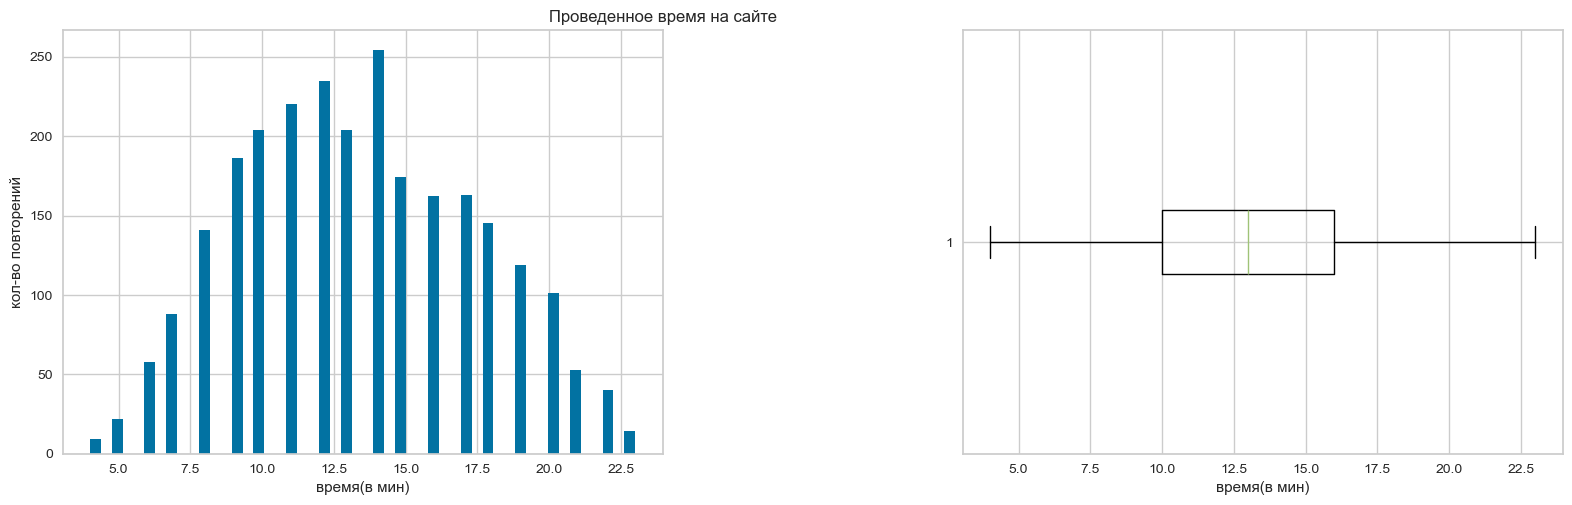

In [120]:
build_histogram_boxplot(
    market_time['минут'], 
    'Проведенное время на сайте',
    'время(в мин)', 
    50
)

count    1296.000000
mean       26.681327
std         6.704311
min         9.000000
25%        21.000000
50%        27.000000
75%        32.000000
max        45.000000
Name: минут, dtype: float64


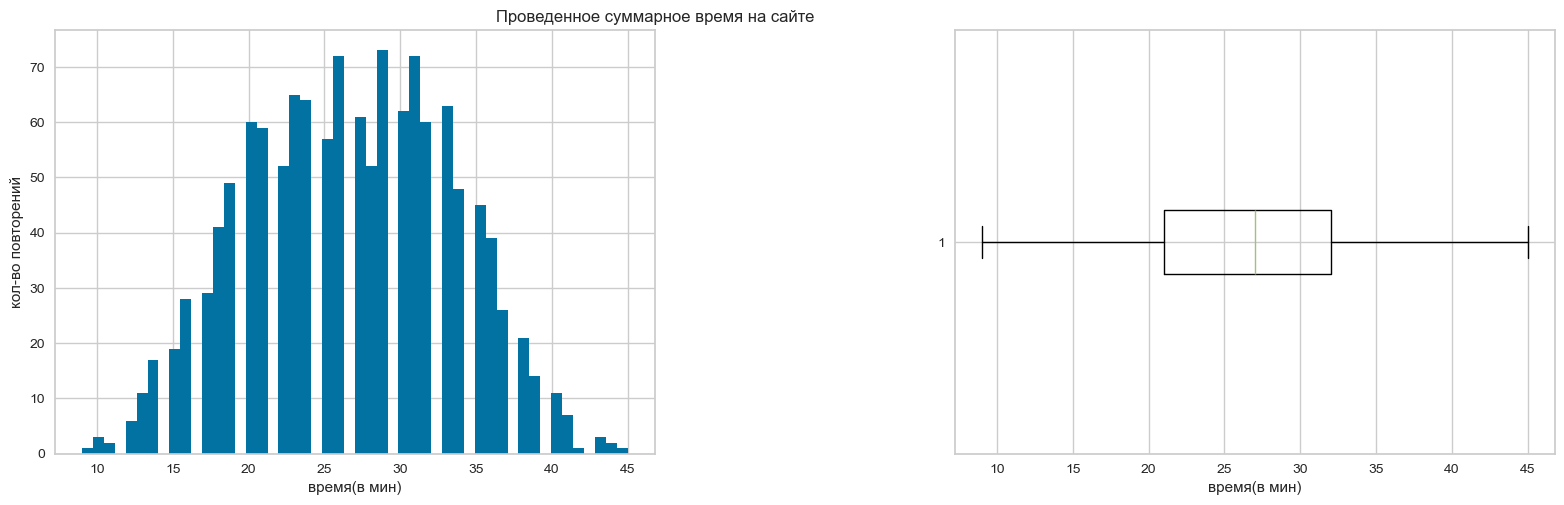

In [121]:
# суммарное время проведенное на сайте
build_histogram_boxplot(
    market_time.pivot_table(index = 'id', values = 'минут', aggfunc = 'sum')['минут'], 
    'Проведенное суммарное время на сайте',
    'время(в мин)', 
    50
)

Данные распределены нормально. 

75% пользователей проводят на сайте не больше 16 минут в месяц.

Итог:
1) При расределение столбца `'акционные_покупки'` выделяется группа которая покупает товары в основом по акциям.
2) Столбцы: `ошибка_сервиса``маркет_актив_тек_мес``средний_просмотр_категорий_за_визит``неоплаченные_продукты_штук_квартал` больше подходят под категориальные признаки.
3) Было удалено 4 пользователя: 1 с аномальной выручкой и остальные с слишком низкой выручкой.
4) Отобраны пользователи с покупательсокой активностью не менее 3 месяцев.

## Объединение таблиц

Задачи: Объединим таблицы `market_file.csv`, `market_money.csv`, `market_time.csv`.

In [126]:
# создадим новую переменную для объединения таблиц
df_full = market_file

In [127]:
# объединим данные таблицы market_money с market_file 
for i in ['препредыдущий_месяц', 'предыдущий_месяц', 'текущий_месяц']:
    df_full = df_full.merge((market_money.query('период == @i')[['id','выручка']]), 
                                on = 'id',
                                how = 'left', 
                                suffixes = ('_препред', '_пред')
                           )

#переименование столбца 
df_full = df_full.rename(columns={'выручка':'выручка_тек'})


In [128]:
# посмотрим как объединились таблицы
df_full.head()

id покупательская_активность тип_сервиса разрешить_сообщать  \
0  215349                 Снизилась     премиум                 да   
1  215350                 Снизилась    стандарт                нет   
2  215351                 Снизилась    стандарт                 да   
3  215352                 Снизилась    стандарт                нет   
4  215353                 Снизилась    стандарт                 да   

   маркет_актив_6_мес  маркет_актив_тек_мес  длительность  акционные_покупки  \
0                 4.4                     4           819               0.75   
1                 4.9                     3           539               0.14   
2                 3.2                     5           896               0.99   
3                 5.1                     3          1064               0.94   
4                 3.3                     4           762               0.26   

  популярная_категория  средний_просмотр_категорий_за_визит  \
0     Товары для детей                                    4   
1    Домашний текстиль                                    5   
2     Товары для детей                                    5   
3     Товары для детей                                    3   
4    Домашний текстиль                                    4   

   неоплаченные_продукты_штук_квартал  ошибка_сервиса  страниц_за_визит  \
0                                   4               2                 5   
1                                   2               1                 5   
2                                   0               6                 4   
3                                   2               3                 2   
4                                   1               1                 4   

   выручка_препред  выручка_пред  выручка_тек  
0           4472.0        5216.0       4971.6  
1           4826.0        5457.5       5058.4  
2           4793.0        6158.0       6610.4  
3           4594.0        5807.5       5872.5  
4           5124.0        4738.5       5388.5

In [129]:
# объединим таблицы df_full с market_time
for i in ['предыдущий_месяц', 'текущий_месяц']:
    df_full = df_full.merge((market_time.query('период == @i')[['id','минут']]), 
                                on = 'id',
                                how = 'left', 
                                suffixes = ('_пред', '_тек')
                           )

In [130]:
# оценим заключительное объединение
df_full.head()

id покупательская_активность тип_сервиса разрешить_сообщать  \
0  215349                 Снизилась     премиум                 да   
1  215350                 Снизилась    стандарт                нет   
2  215351                 Снизилась    стандарт                 да   
3  215352                 Снизилась    стандарт                нет   
4  215353                 Снизилась    стандарт                 да   

   маркет_актив_6_мес  маркет_актив_тек_мес  длительность  акционные_покупки  \
0                 4.4                     4           819               0.75   
1                 4.9                     3           539               0.14   
2                 3.2                     5           896               0.99   
3                 5.1                     3          1064               0.94   
4                 3.3                     4           762               0.26   

  популярная_категория  средний_просмотр_категорий_за_визит  \
0     Товары для детей                                    4   
1    Домашний текстиль                                    5   
2     Товары для детей                                    5   
3     Товары для детей                                    3   
4    Домашний текстиль                                    4   

   неоплаченные_продукты_штук_квартал  ошибка_сервиса  страниц_за_визит  \
0                                   4               2                 5   
1                                   2               1                 5   
2                                   0               6                 4   
3                                   2               3                 2   
4                                   1               1                 4   

   выручка_препред  выручка_пред  выручка_тек  минут_пред  минут_тек  
0           4472.0        5216.0       4971.6          12         10  
1           4826.0        5457.5       5058.4           8         13  
2           4793.0        6158.0       6610.4          11         13  
3           4594.0        5807.5       5872.5           8         11  
4           5124.0        4738.5       5388.5          10         10

In [131]:
df_full.shape

(1296, 18)

Получили итоговую таблицу с новыми столбцами: `выручка_препред`, `выручка_пред`, `выручка_тек`, `минут_пред`, `минут_тек`.

## Исследовательский анализ данных для групп с активностью `снизилась` и `прежний уровень` 

Проведем ещё раз исследовательский анализ на объединённой таблице с учётом разных групп клиентов. 

In [135]:
# воспользуемся готовой функций для построения гистрограмм и диаграмм размаха
def build_histogram_boxplot_2(dataset, column):
    plt.figure(figsize=(15,5))
    plt.subplot(1, 2, 1)
    plt.title(f'Гистограмма для "{column}"')
    sns.histplot(data=dataset, x=column, hue='покупательская_активность')
    plt.xlabel(f'Значение параметра "{column}"')
    plt.ylabel('Частота')
    
    plt.subplot(1, 2, 2)
    plt.title(f'Диаграмма размаха для "{column}"')
    sns.boxplot(x='покупательская_активность', y=column, data=dataset);
    plt.ylabel(f'Значение параметра "{column}"')

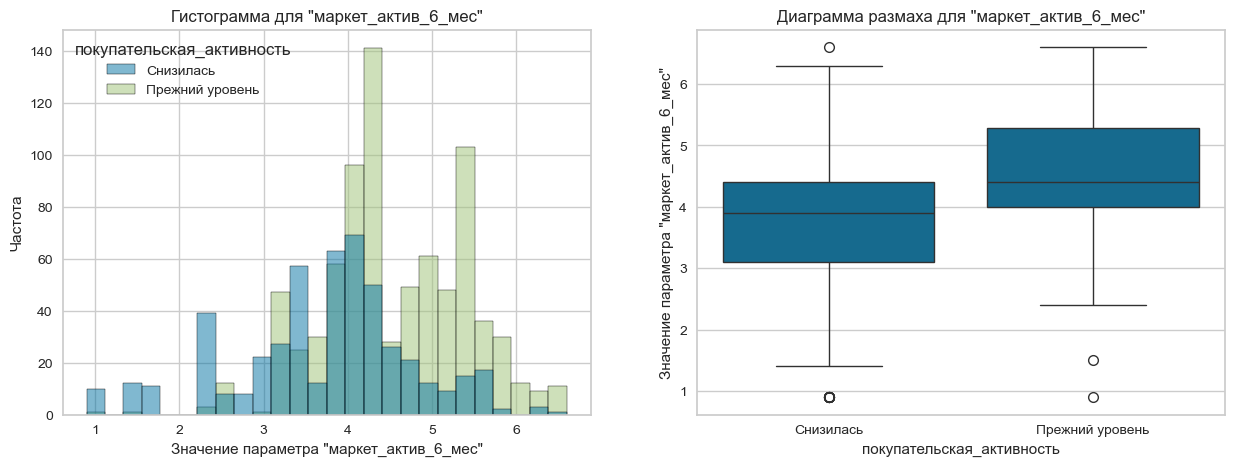

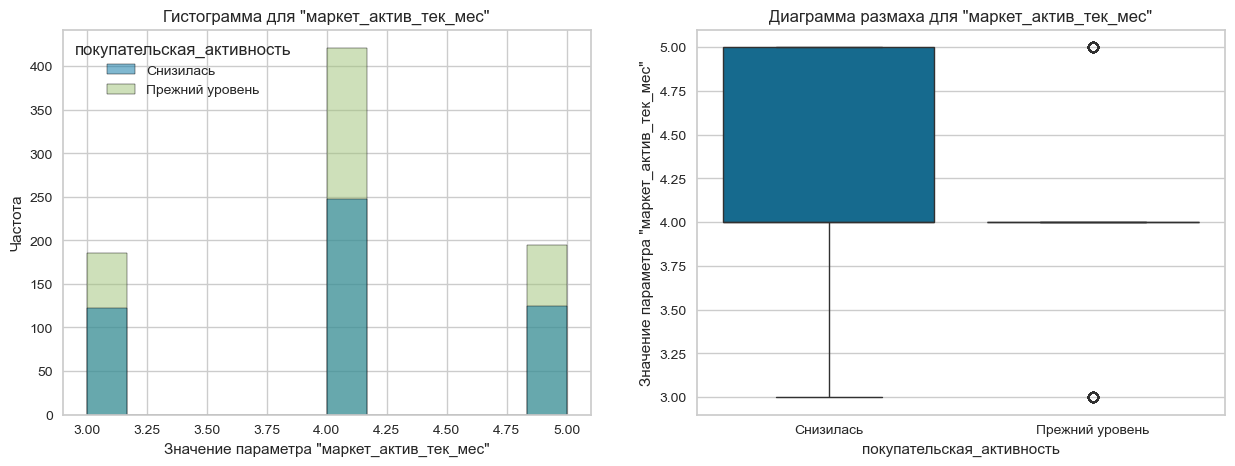

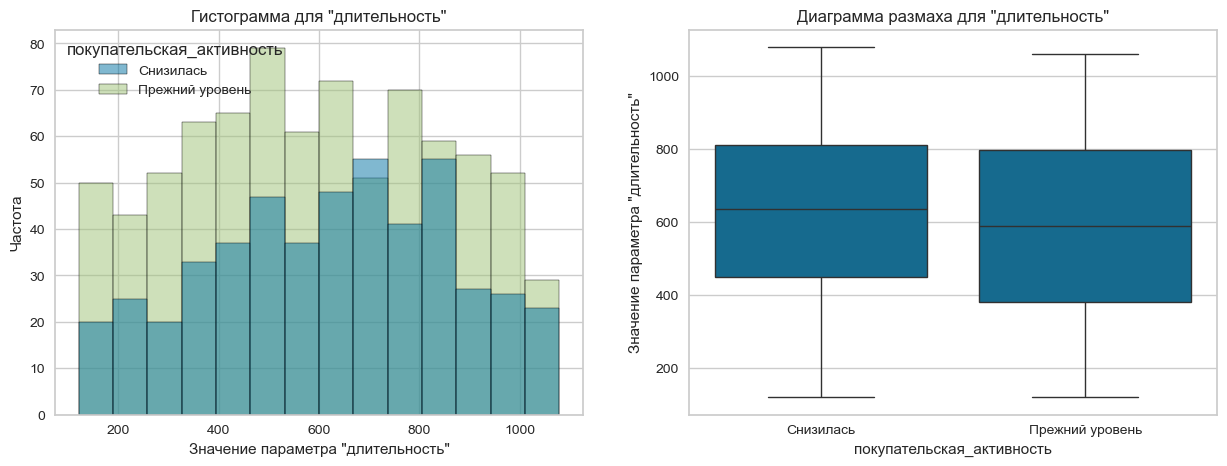

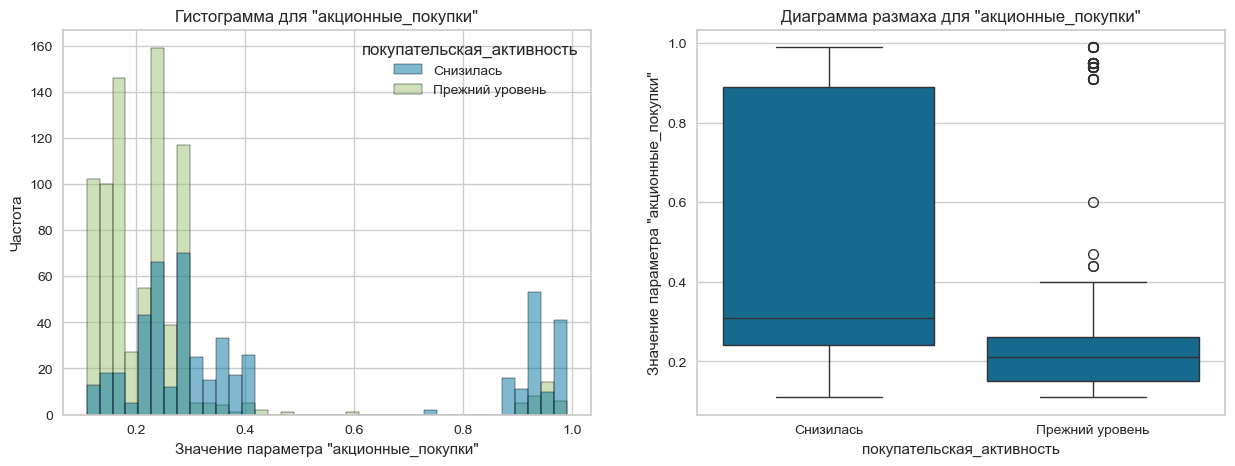

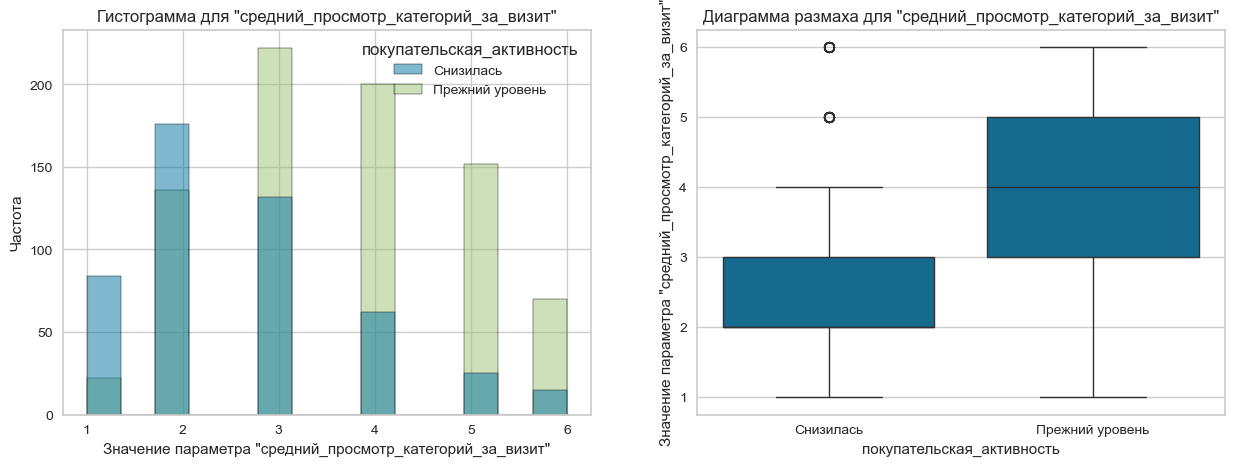

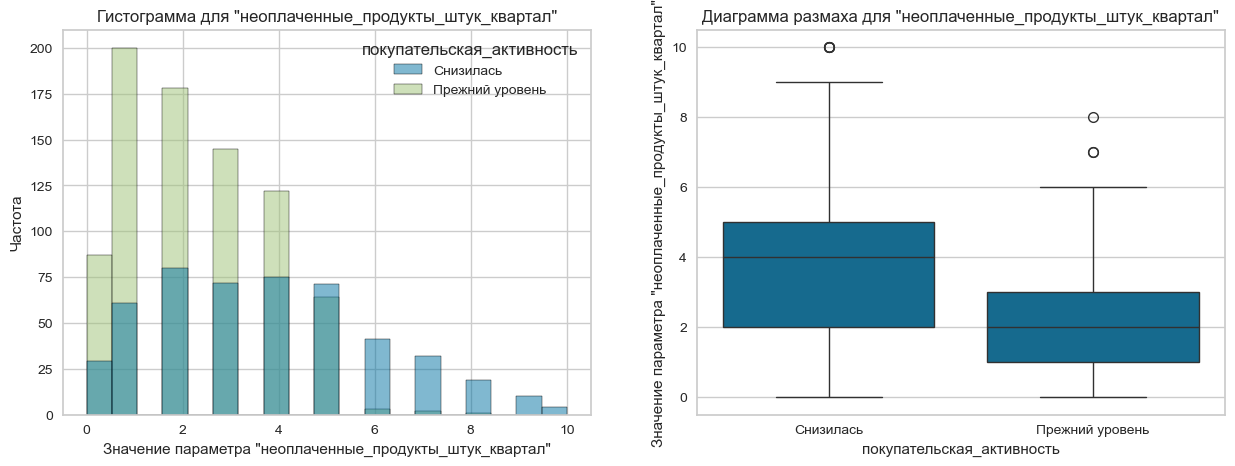

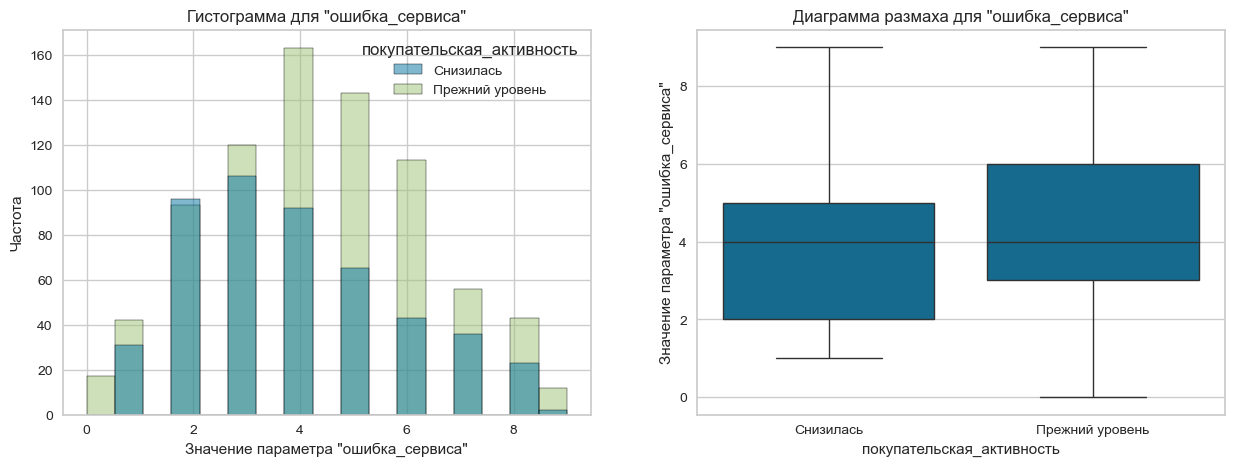

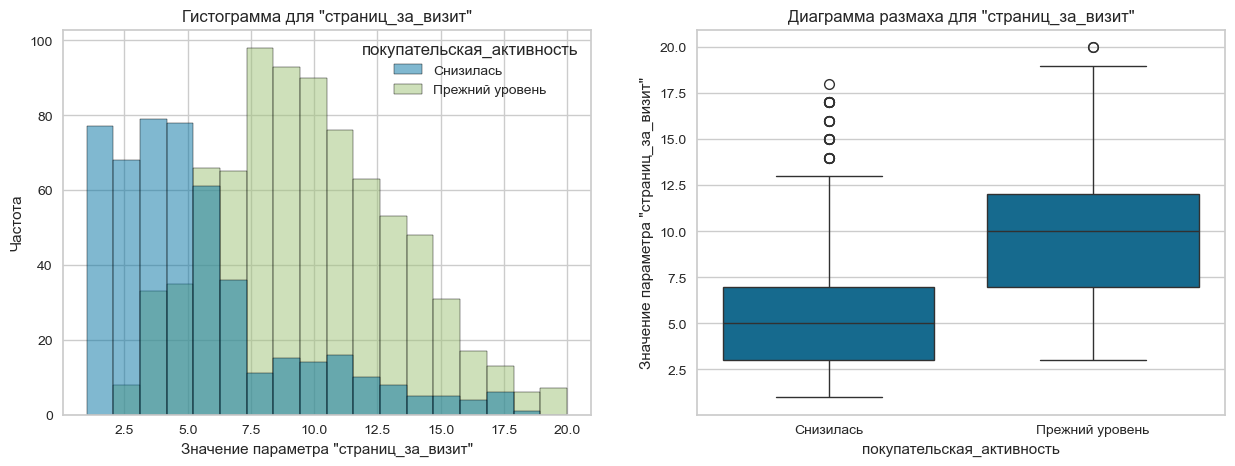

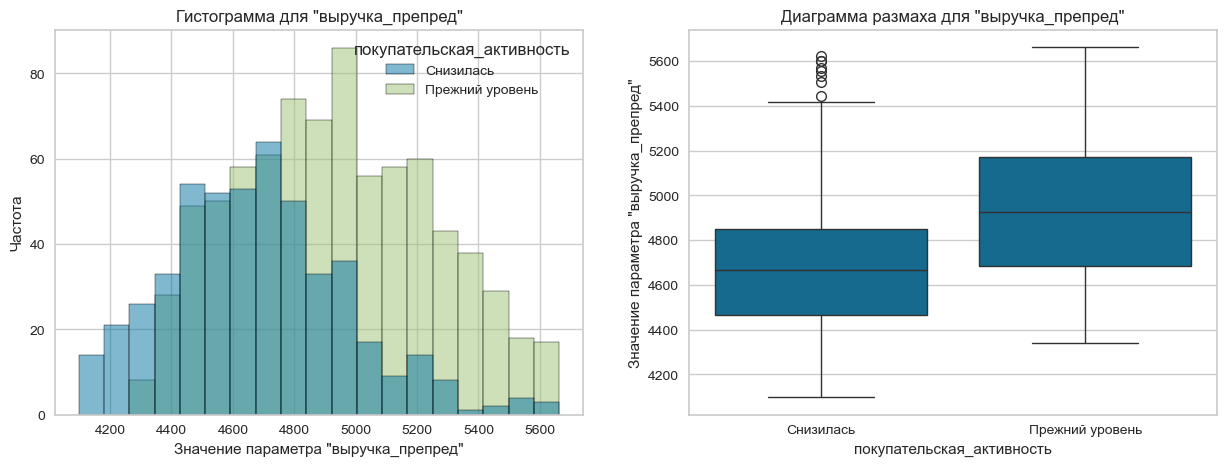

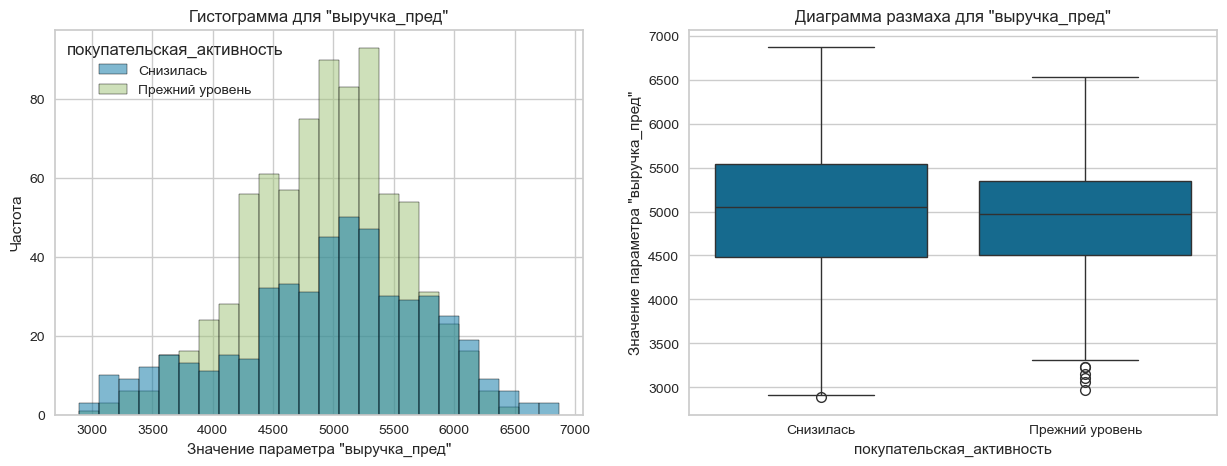

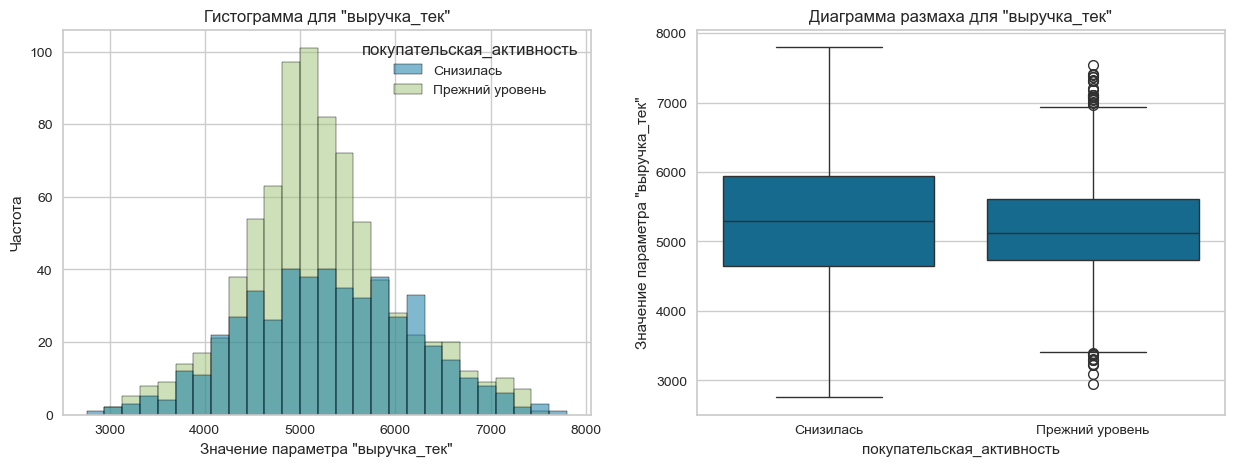

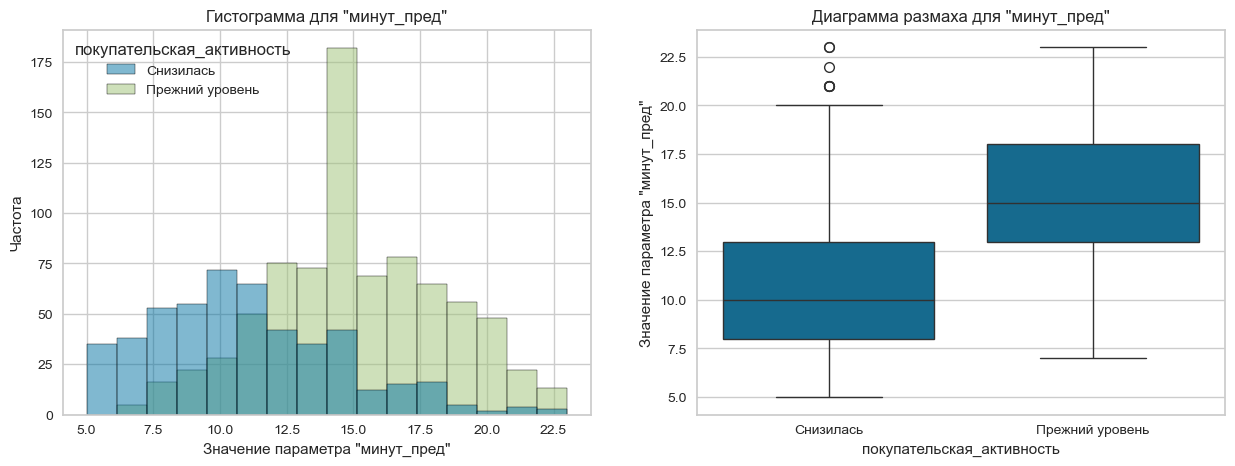

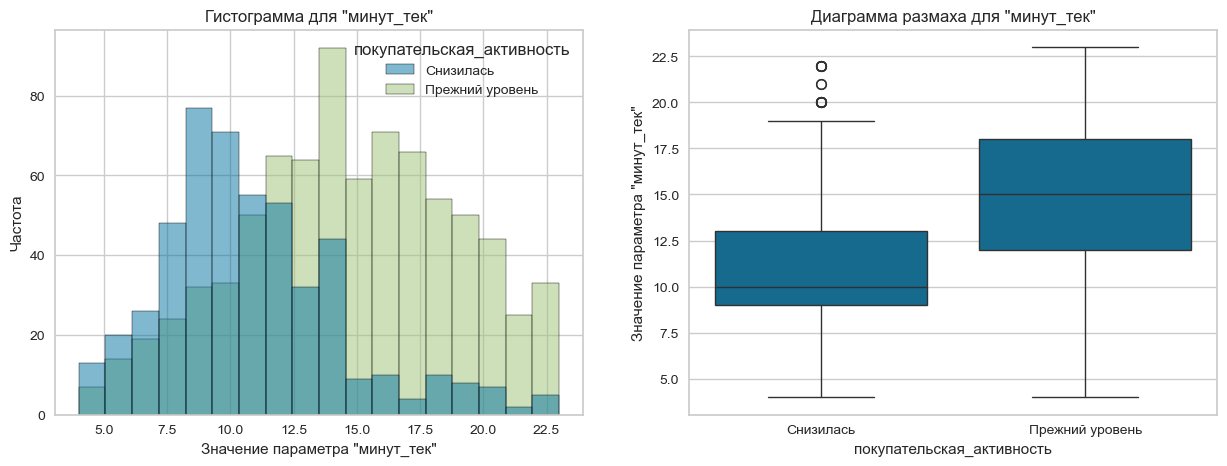

In [136]:
# вывозовим функции для построения графиков с количественными признаками таблицы df_full
for name in df_full.select_dtypes(include = 'number').columns.to_list():
    if name != 'id':
        build_histogram_boxplot_2(df_full, name)
        plt.show()

На группу `прежний уровень` маркетинговых коммуникаций за последние 6 месяцев в среднем на одного человека больше, чем у группы `снизилась`.

В текущем месяце наоборот на группу `снизилась` в срденм на одного человека приходится больше маркентиговых коммуникаций. Здесь видимо как раз пытаются привлечь клиентов у которых снизилась покупательская активность.

Кол-во дней с момента регистрации практически одинаково у двух групп.

Группа `снизилась` в основном предпочитает делать акционные покупки.

Группа `снизилась` меньше просматривает категорий(2-4) за один визит.

В среднем на одного человека у группы `снизилась` больше неоплаченных товаров в корзине. То есть в приницпе они возможно хотели бы их купить, но что то их останавливает.

В среднем на одного человека у групп одинаквое кол-во ошибок при использовании сайта.

Группа `снизилась` в среднем на одного человека меньше просматривает страниц(5), у группы `прежний уровень` в среднем на 1 человека за визит 10 страниц. 

За препредыдущий месяц выручка в среднем на 1 человека у группы `прежниий уровень` была больше(4900 по сравнению с 4700). В следущем месяце в среднем на 1 человека выручка практическая одинаковая(5000). В текущем месяце группа `снизилась` в среднем на 1 человека имеет больше выручки( примерно 5300 по сравнению 5200). Выручка между 2-мя группа не сильно отличается, и она даже в среднем на одного человека растёт из месяца в месяц.

Группа `прежниий уровень` в среднем на 1 человека больше проводит времени на сайте(15 минут по сравнению с 10 мин.).

Думаю, стоит обратить внимание на тех клиентов у которых много неоплаченных товаров в корзине и они любят покупать товары по акции.

In [138]:
# создадим функцию для построения круговой диаграммы с учётом 2 групп
def build_pie_2(data, name_column):
    
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.suptitle(f'Признак {name_column}', y=0.98, x = 1)
    plt.subplots_adjust(wspace=0.5, hspace=0.5, right = 2)
    
    ax1.set_title('Покупательская активность - снизилась')
    ax1.pie(data.query('покупательская_активность == "Снизилась"')[name_column].value_counts(), 
            labels = data[name_column].unique(),
            autopct='%1.1f%%'
           )
    
    
    ax2.set_title('Покупательская активность: прежний уровень')
    ax2.pie(data.query('покупательская_активность == "Прежний уровень"')[name_column].value_counts(), 
            labels = data[name_column].unique(),
            autopct='%1.1f%%'
           )
    
    
    plt.show()

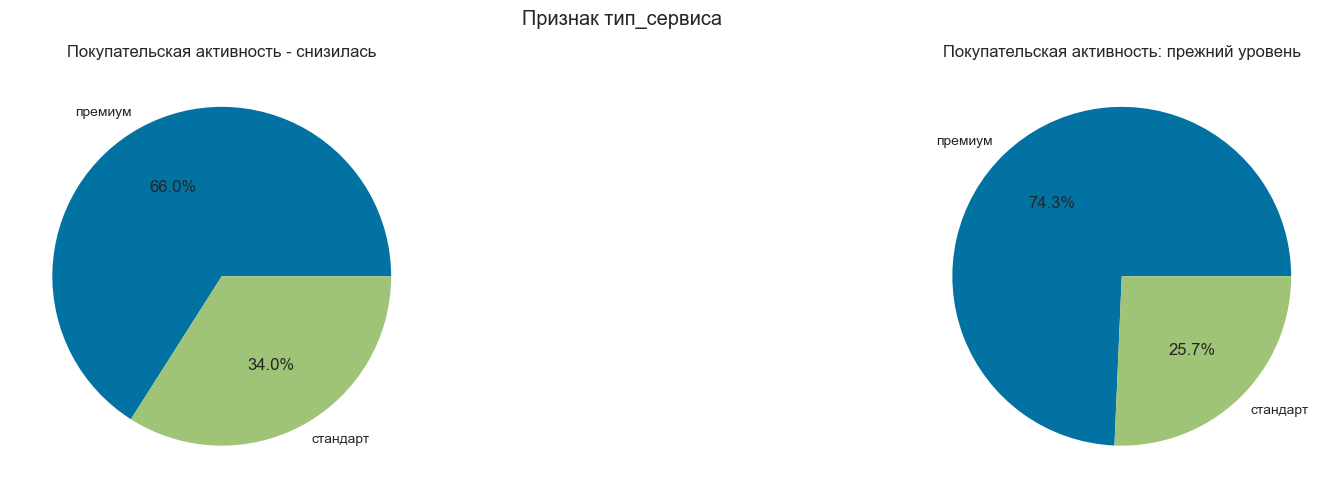

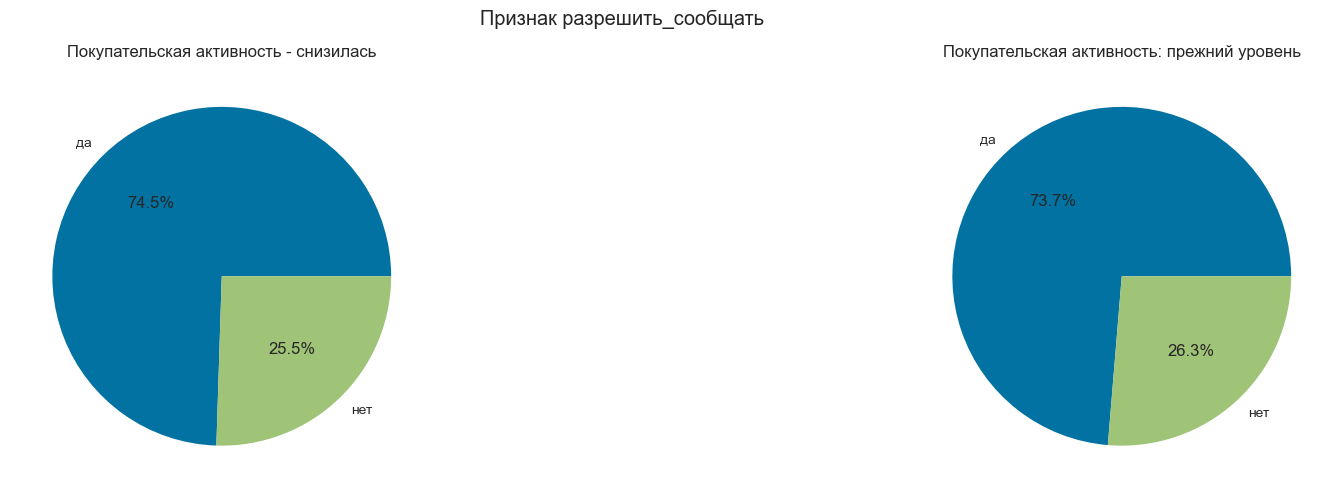

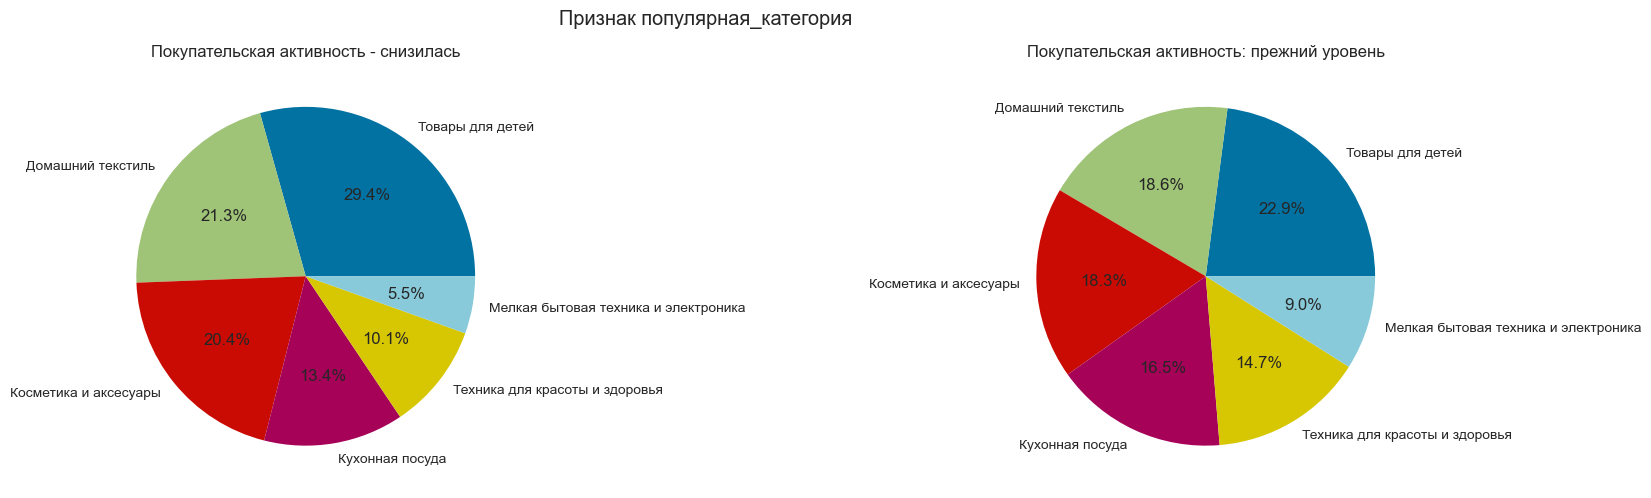

In [139]:
# вызовем функцию для построение круговых диаграм категориальных признаков 2 групп
for name in df_full.select_dtypes(exclude = 'number').columns.to_list():
    if name != 'покупательская_активность':   
        build_pie_2(df_full, name)

Особых различий между группами не обнаружено.

## Корреляционный анализ

Задачи:
1) Проведем корреляционный анализ.
2) Устраним мультиколлинеарность по необхдодимости.

In [143]:
# воспользуемся методом phik_matrix для определения корреляции количественных и категориальных признаков
phik_overview = phik_matrix(df_full.drop(columns = 'id'), 
                            interval_cols= list(df_full.select_dtypes(include = 'number').columns)
                           )

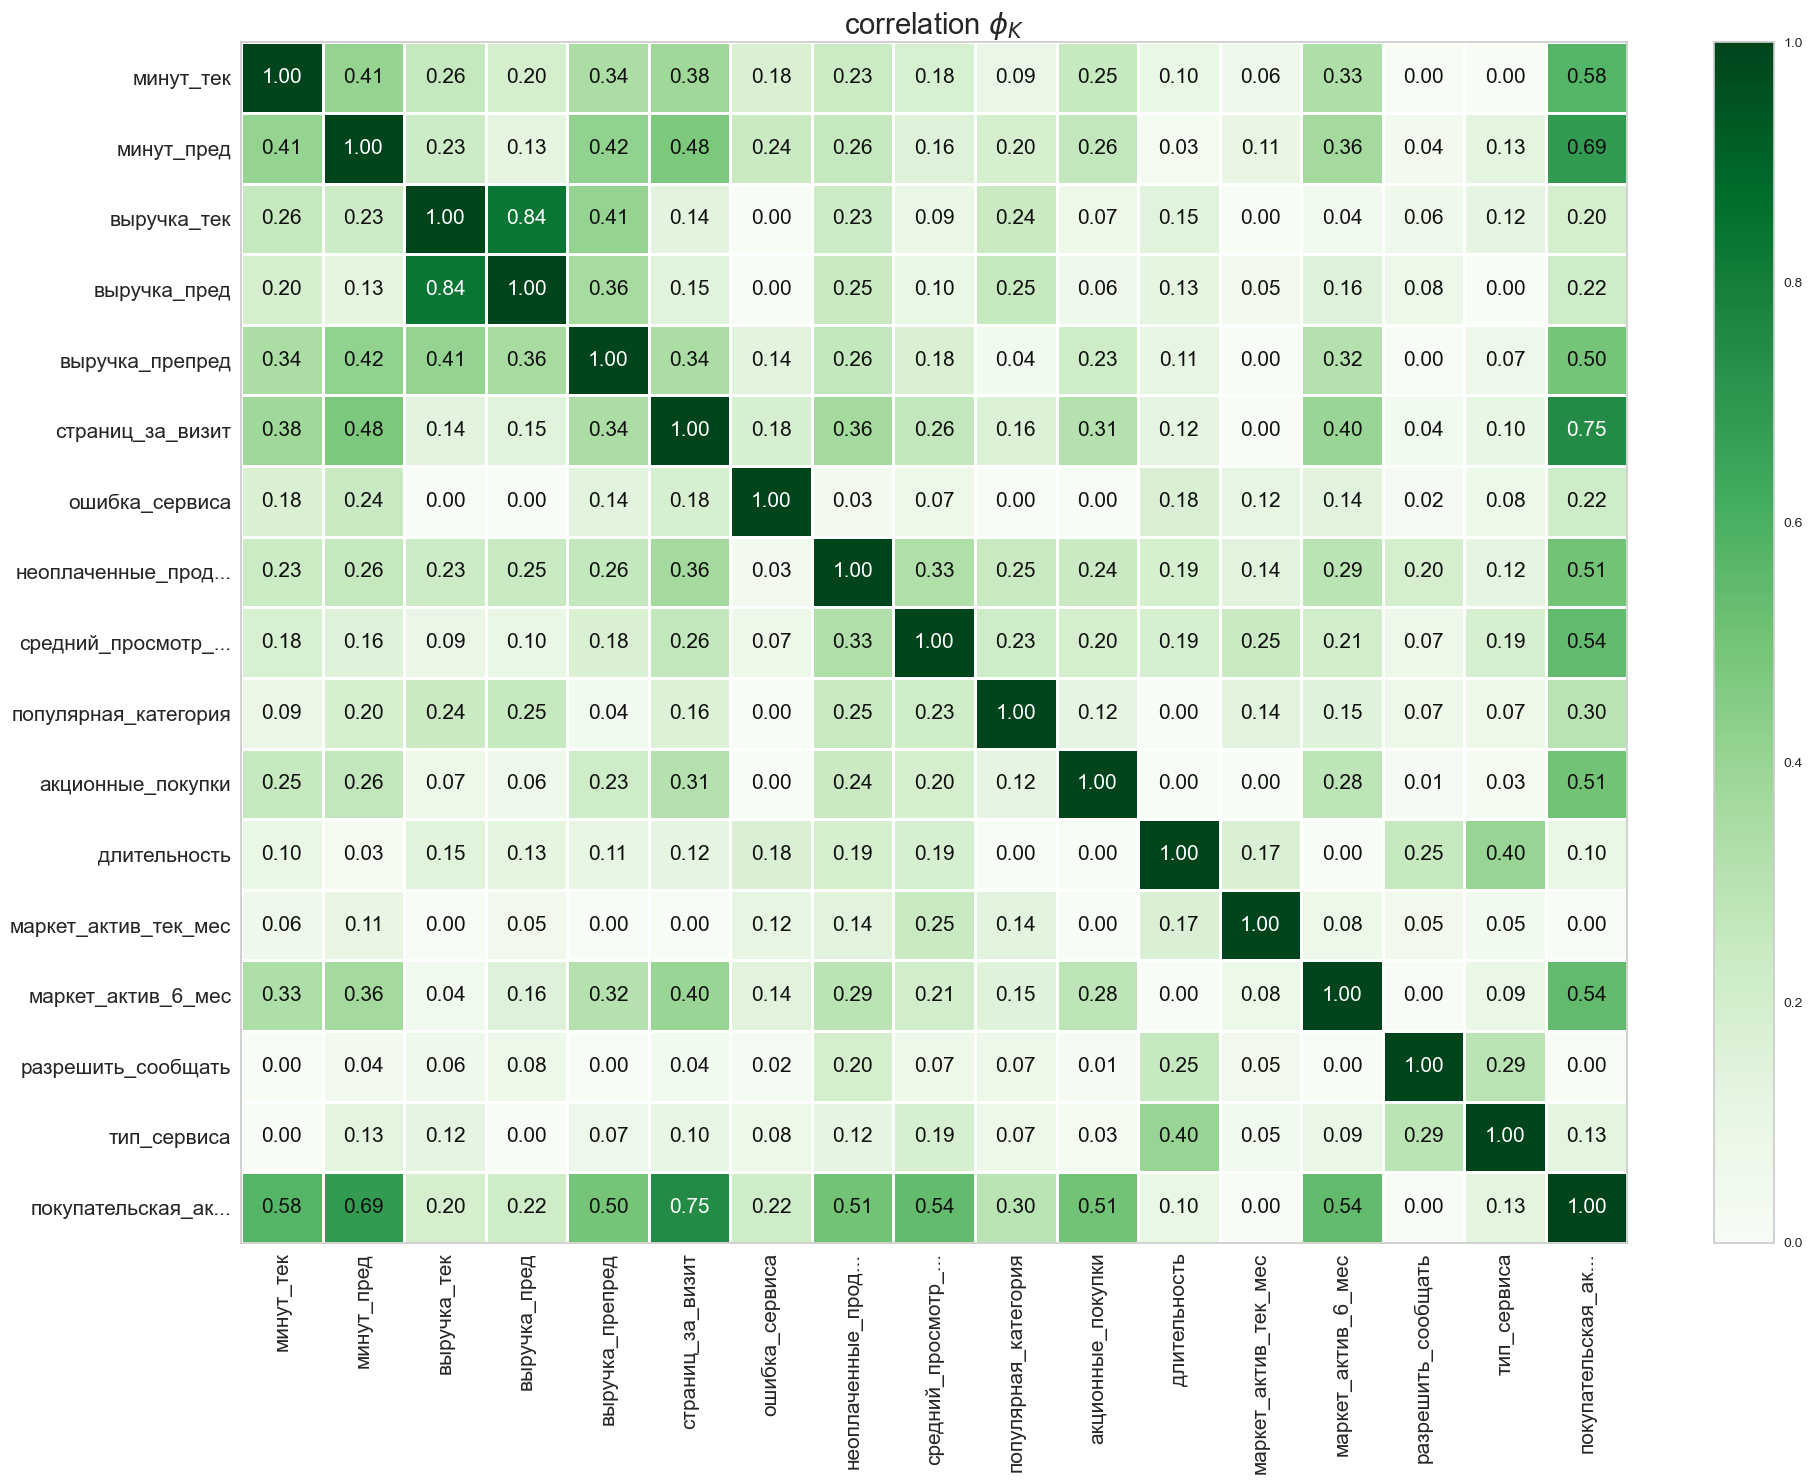

In [144]:
plot_correlation_matrix(
    phik_overview.values,
    x_labels=phik_overview.columns,
    y_labels=phik_overview.index,
    vmin=0, vmax=1, color_map='Greens',
    title=r'correlation $\phi_K$',
    fontsize_factor=1.5,
    figsize=(20, 15)
) 

В целом между входными признаками не большие зависимости, кроме `выручка_тек` и `выручка_пред`. Между ними высокая прямая положительная связь(0.85). 

Мультиколлинеарность не наблюадается, будем учитывать все признаки при обучении модели.


## Использование пайплайнов

Задачи: 
1) Для подготовки данных воспользуемся `ColumnTransformer`.
2) Для кодирования категориальных признаков используем как минимум два кодировщика, для масштабирования количественных — как минимум два скейлера.
3) Обучим четыре модели: KNeighborsClassifier(), DecisionTreeClassifier(), LogisticRegression() и SVC(). Для каждой из них подберем как минимум один гиперпараметр.
4)  Выберим подходящую для задачи метрику.
5) Выберим лучшую модель, используя заданную метрику. Для этого применим стратегию: воспользуемся одним общим пайплайном для всех моделей и инструментом для подбора гиперпараметров, который вернёт лучшую модель

Будем использовать метрику ROC-AUC как основную, так как она может оценить качество работы модели вне зависимости от выбранного порога вероятности. Метрику можно использовать в случае, когда объектов с одним значением целевого признака больше, чем с другими.

Дополнительно оценим метрику F1-score, так как она агрегирует значения precision и recall в единый показатель качества модели, в нашем случае как раз важны как precision так и recall.

In [149]:
RANDOM_STATE = 42
TEST_SIZE = 0.25
df_full = df_full.set_index('id')
# разделяем данные на тренировочные и тестовые
X_train, X_test, y_train, y_test = train_test_split(
    df_full.drop(['покупательская_активность'], axis=1),
    df_full['покупательская_активность'],
    test_size = TEST_SIZE, 
    random_state = RANDOM_STATE,
    stratify = df_full['покупательская_активность'])


# создаём списки с названиями признаков
ohe_columns = [
    'тип_сервиса',
    'разрешить_сообщать'
]

ord_columns = ['популярная_категория']

num_columns = [
    'маркет_актив_6_мес',
    'маркет_актив_тек_мес',
    'длительность',
    'акционные_покупки',
    'средний_просмотр_категорий_за_визит',
    'неоплаченные_продукты_штук_квартал',
    'ошибка_сервиса',
    'страниц_за_визит',
    'выручка_препред',
    'выручка_пред',
    'выручка_тек',
    'минут_пред',
    'минут_тек',
]

# создаём пайплайн для подготовки признаков из списка ohe_columns: OHE-кодирование
ohe_pipe = Pipeline(
    [('ohe', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False))]
    )

# создаём пайплайн для подготовки признаков из списка ord_columns: Ordinal-кодирование
ord_pipe = Pipeline(
    [('ord', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=np.nan))]
)

# создаём общий пайплайн для подготовки данных
data_preprocessor = ColumnTransformer(
    [('ohe', ohe_pipe, ohe_columns),
     ('ord', ord_pipe, ord_columns),
     ('num', MinMaxScaler(), num_columns)
    ], 
    remainder='passthrough'
)

# создаём итоговый пайплайн: подготовка данных и модель
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
])

param_grid = [
    # словарь для модели DecisionTreeClassifier()
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(2, 6),
        #'models__min_samples_split': range(2, 6),
        #'models__min_samples_leaf': range(2, 6),
        'models__max_features': range(2,6),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    
    # словарь для модели KNeighborsClassifier() 
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(2,6),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']   
    },

    # словарь для модели LogisticRegression()
    {
        'models': [LogisticRegression(
            random_state=RANDOM_STATE, 
            solver='liblinear', 
            penalty='l1'
        )],
        'models__C': range(1,6),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    }
]

randomized_search = RandomizedSearchCV(
    pipe_final, 
    param_grid, 
    cv=5,
    scoring='roc_auc',
    random_state=RANDOM_STATE,
    n_jobs=-1
)
randomized_search.fit(X_train, y_train)

print('Лучшая модель и её параметры:\n\n', randomized_search.best_estimator_)
print ('Метрика лучшей модели на тренировочной выборке:', randomized_search.best_score_)

# проверим работу модели на тестовой выборке
# рассчитаем прогноз на тестовых данных
y_test_pred = randomized_search.predict(X_test)
y_test_proba = randomized_search.predict_proba(X_test)

print(f'Метрика ROC-AUC на тестовой выборке: {roc_auc_score(y_test, y_test_proba[:,1])}')
print('Метрика f1 на тестовой выборке:',f1_score(y_test, y_test_pred, pos_label = 'Снизилась'))

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['тип_сервиса',
                                                   'разрешить_сообщать']),
                                                 ('ord',
                                                  Pipeline(steps=[('ord',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                               

В итоге перебора разных моделей, лучшей стала LogisticRegression() с параметрами (C=1, penalty='l1', random_state=42, solver='liblinear').

Метрики показали неплохой результат.

## Анлиз важности признаков

Задачи:
1) Оценим важность признаков для лучшей модели и построим график важности с помощью метода SHAP.

2) Сделаем выводы о значимости признаков:
    - какие признаки мало значимы для модели;
    - какие признаки сильнее всего влияют на целевой признак 
    - ккак можно использовать эти наблюдения при моделировании и принятии бизне -реении.й


In [153]:
# поиск важных признаков
# извлекем из паплайна значения после кодирования данных
X_values = randomized_search.best_estimator_['preprocessor'].fit_transform(X_train)

# извлекем из паплайна лучшую модель с параметрами
model_best = randomized_search.best_estimator_['models'].fit(X_values, y_train)

# извлекем из паплайна название столбцов после кодирования данных
X_labels = randomized_search.best_estimator_[:-1].get_feature_names_out()


In [154]:
# объединим в таблицу название и значения закодированных и отмасштабированных признаков 
X_new_df = pd.DataFrame(X_values, columns = X_labels)

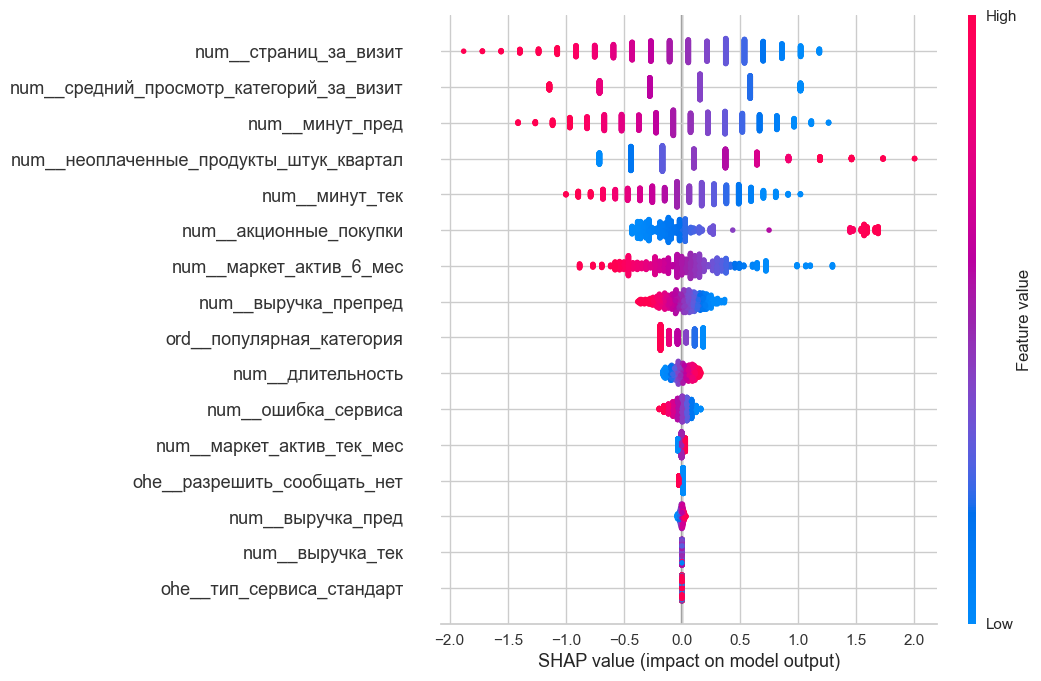

In [155]:
# визуализируем вклад признаков в каждое предсказание модели метдом shap.plots.beeswarm()
explainer = shap.LinearExplainer(model_best, X_values)
shap_values = explainer(X_new_df)

shap.plots.beeswarm(shap_values, max_display=17)

Слева покупательская активность: `Прежний уровень`, справа `Снизилась`.

Чем больше значения признаков `неоплаченные_продукты_штук_квартал`, `акционные_покупки` тем больше SHAP значения объектов. Если у наблюдения высокое значение этих признаков, то у него высокая вероятность принадлежности к классу `Снизилась`. Также чем выше значение `Длительность`, тем вероятней класс`Снизилась`.

Чем больше значения остальных признаков, тем больше вероятность принадлежности к классу `Прежний уровень`.

Признаки: `тип_сервиса_стандарт`, `разрешить_сообщать_нет`, `маркет_актив_тек_мес`, `выручка_пред`, `выручка_тек` меньше всех влияет на активность покупателя.

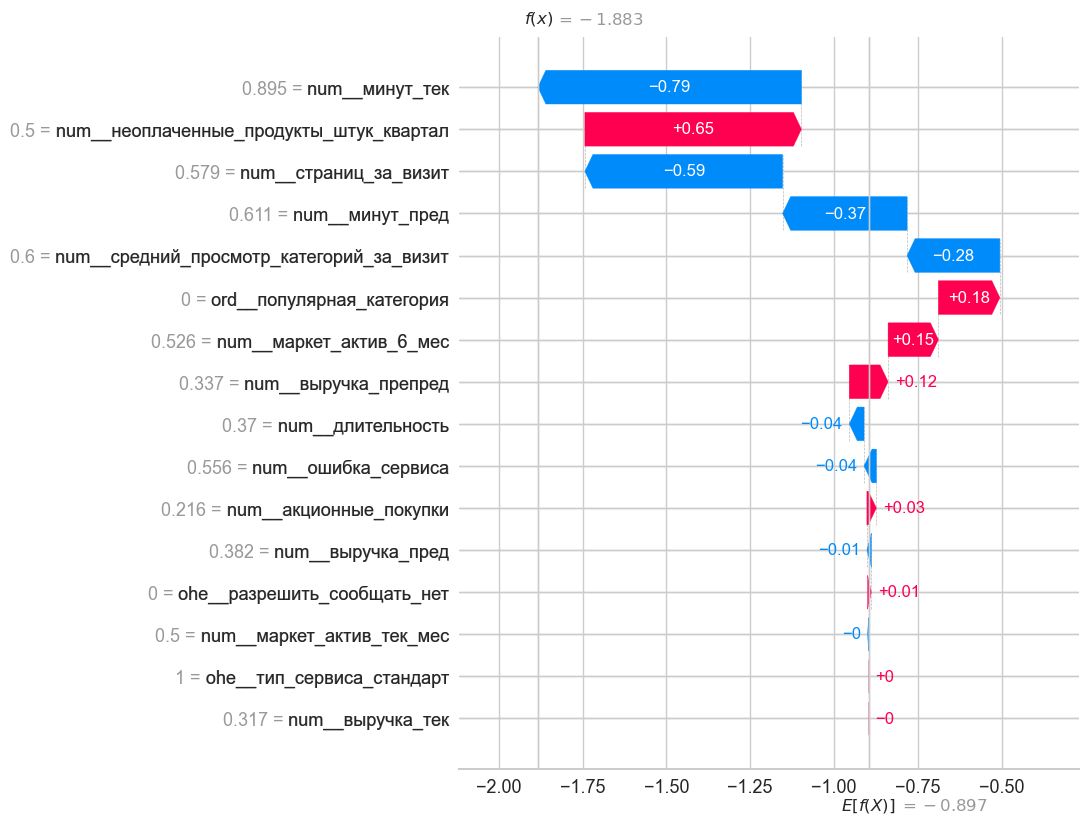

In [157]:
# визуализируем индивидуальные SHAP-значения каждого наблюдения в датасете для случайного пользователя методом shap.plots.waterfall()
shap.plots.waterfall(shap_values[333], max_display=17) 

Данный пользователь больше подходит под класс `прежний уровень`, так как сущесвтенный вклад внес признак `минут_тек`, то есть клиент гороздо больше проводит минут на сайте, чем тот у кого актнивность снизилась. Хотя у данного пользователя большой показатель `неоплаченные_продукты_штук_квартал`, что может говорить о его снижении покупательской активности. В итоге больше признаков повлияло всё-таки на класс `прежний уровень`, клиент много проводит минут на сайте, просматривает в среднем больше категорий и покупает товары в основном не по акции.

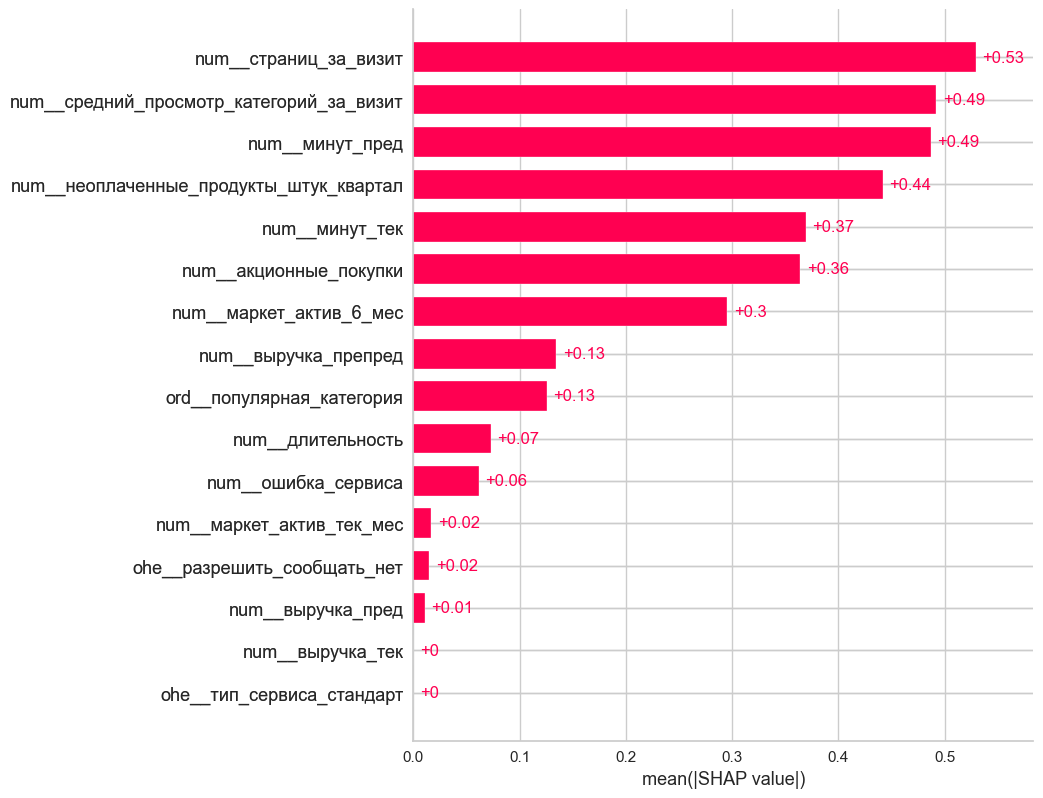

In [159]:
# общий вклад признаков в прогнозы модели
shap.plots.bar(shap_values, max_display=17) 

## Сегментация покупателей 

Задачи:
1) Выполним сегментацию покупателей на основе результатов моделирования и данных о прибыльности покупателей.
2) Выберим группу покупателей и предложим, как увеличить её покупательскую активность: 
    - Проведите графическое и аналитическое исследование группы покупателей.
    - Сделаем предложения по работе с сегментом для увеличения покупательской активности.
3) Выберем дополнительный сегмент, проанализирем его, предложим возможные решения повышения активности покупателей.

In [162]:
# отберем сегемент покупаетелей из тестовых данных
segment_customer = X_test

In [163]:
# добавим столбец 'выручка_тек'
#segment_customer = segment_customer.join(df_full[['выручка_тек']])

In [164]:
segment_customer['выручк_сум_квартал'] = segment_customer['выручка_тек'] + segment_customer['выручка_пред'] + segment_customer['выручка_препред']

In [165]:
# объединим таблицы с segment_customer и money по id для добаления столбца `прибыль`
segment_customer = segment_customer.join(money.set_index('id'))

In [166]:
# добавим столбец 'покупательская_активность' на основе предсказанных значений модели на тествовых данных
segment_customer['покупательская_активность'] = y_test_pred

In [167]:
# добавим столбец 'вероятность_активности' на основе предсказанных значений модели на тествовых данных
segment_customer['вероятность_активности'] = y_test_proba[:,1]

In [168]:
# посмотрим что получилось
segment_customer.head()

тип_сервиса разрешить_сообщать  маркет_актив_6_мес  \
id                                                          
216161    стандарт                 да                 4.1   
215654     премиум                нет                 1.4   
216307     премиум                 да                 3.3   
215501     премиум                 да                 3.5   
215934    стандарт                нет                 5.5   

        маркет_актив_тек_мес  длительность  акционные_покупки  \
id                                                              
216161                     4           606               0.15   
215654                     4           684               0.94   
216307                     4           488               0.13   
215501                     3          1057               0.35   
215934                     4           147               0.99   

                        популярная_категория  \
id                                             
216161        Техника для красоты и здоровья   
215654                      Товары для детей   
216307                     Домашний текстиль   
215501                     Домашний текстиль   
215934  Мелкая бытовая техника и электроника   

        средний_просмотр_категорий_за_визит  \
id                                            
216161                                    6   
215654                                    3   
216307                                    4   
215501                                    4   
215934                                    1   

        неоплаченные_продукты_штук_квартал  ошибка_сервиса  страниц_за_визит  \
id                                                                             
216161                                   1               4                12   
215654                                   6               1                 6   
216307                                   2               8                10   
215501                                   3               5                 6   
215934                                   2               3                 7   

        выручка_препред  выручка_пред  выручка_тек  минут_пред  минут_тек  \
id                                                                          
216161           4912.0        3973.0       3289.2          16         17   
215654           4656.0        3548.0       4170.7          11          9   
216307           4565.0        5444.0       6335.8          20         11   
215501           4993.0        6604.0       6758.7           9          9   
215934           4451.0        5090.0       5773.8          15         18   

        выручк_сум_квартал  прибыль покупательская_активность  \
id                                                              
216161             12174.2     4.69           Прежний уровень   
215654             12374.7     2.75                 Снизилась   
216307             16344.8     3.16           Прежний уровень   
215501             18355.7     3.74                 Снизилась   
215934             15314.8     4.40                 Снизилась   

        вероятность_активности  
id                              
216161                0.014738  
215654                0.983583  
216307                0.104136  
215501                0.762062  
215934                0.674217

In [169]:
segment_customer.shape

(324, 20)

На основе данной таблцы выберем группу покупателей `Снизилась`. 

Проведём графическое и аналитическое исследование данной группы покупателей.

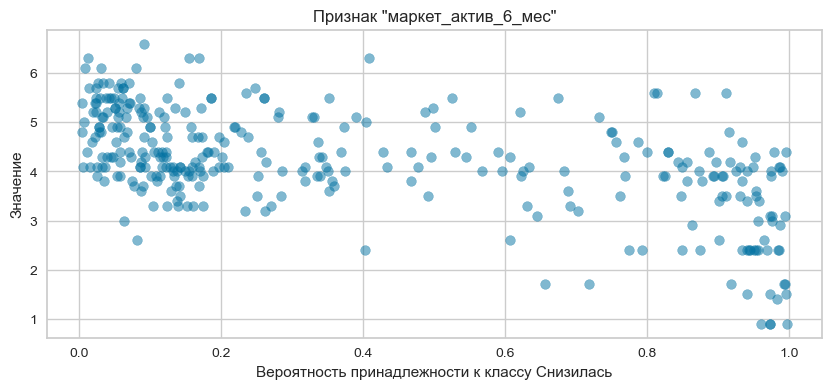

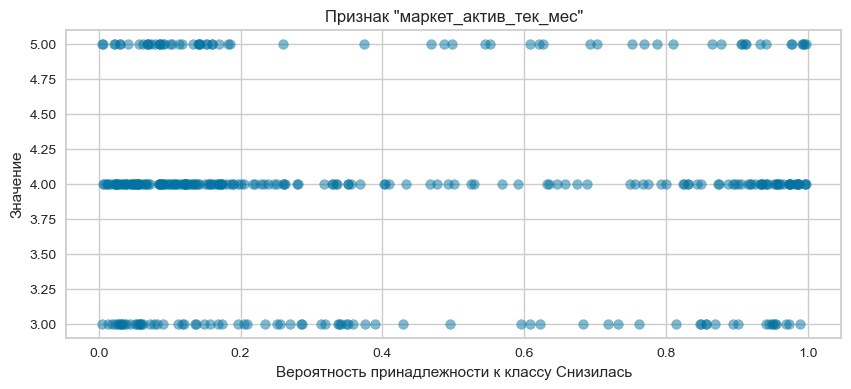

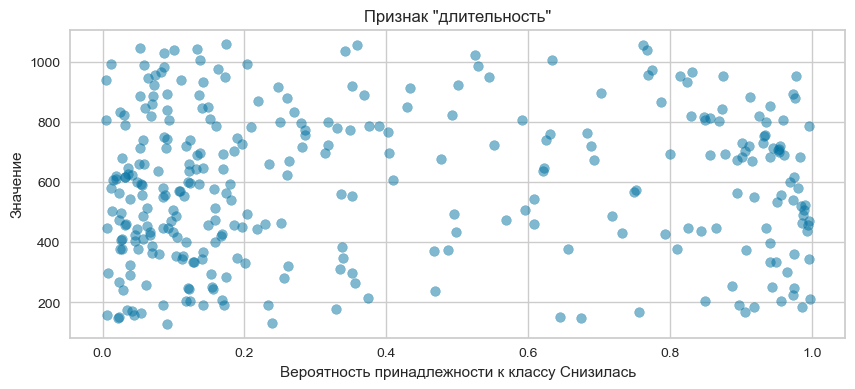

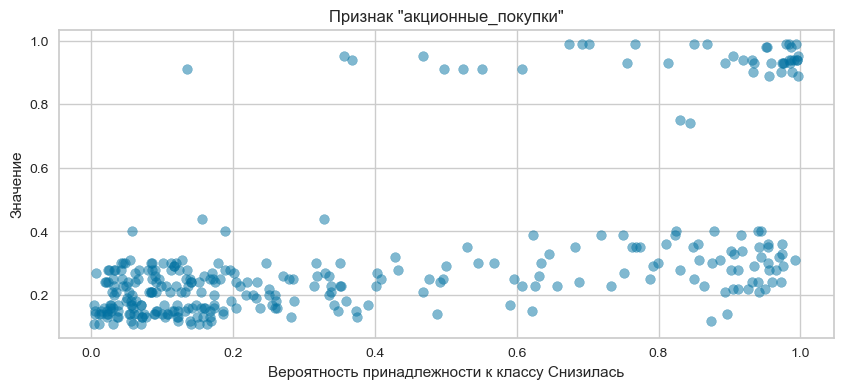

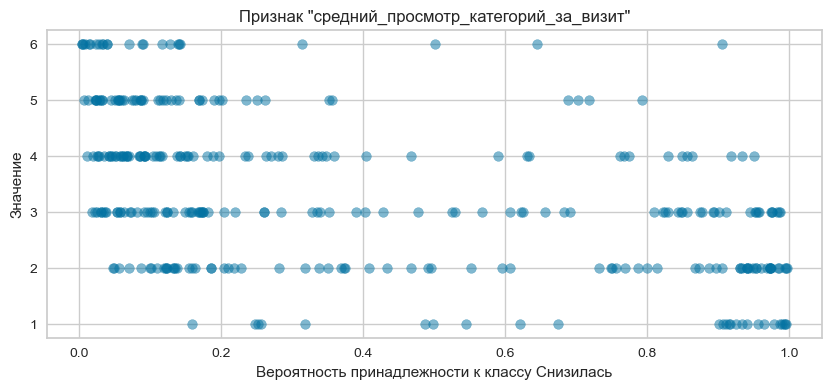

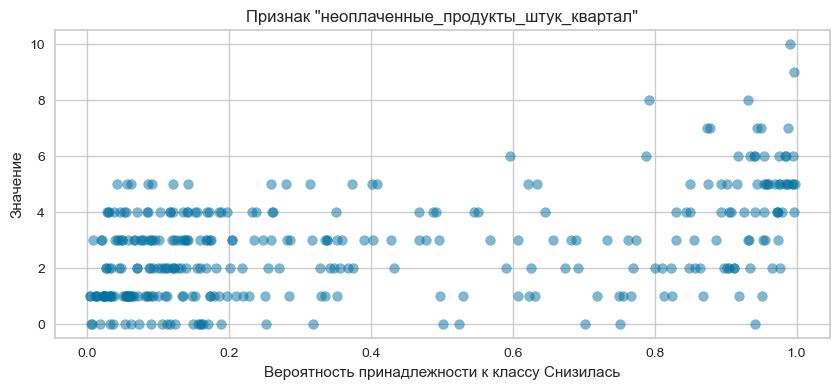

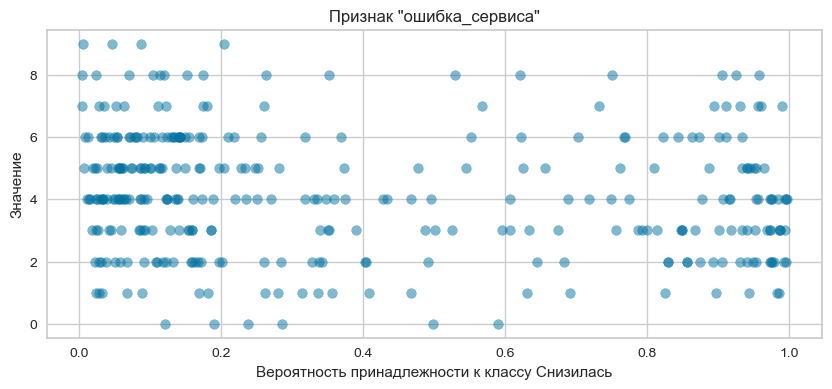

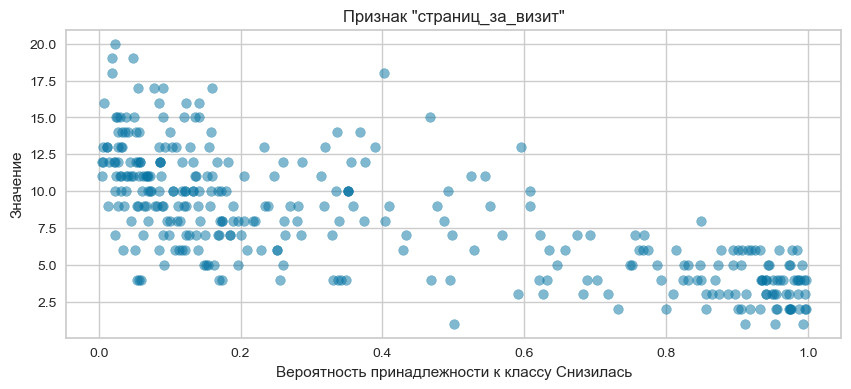

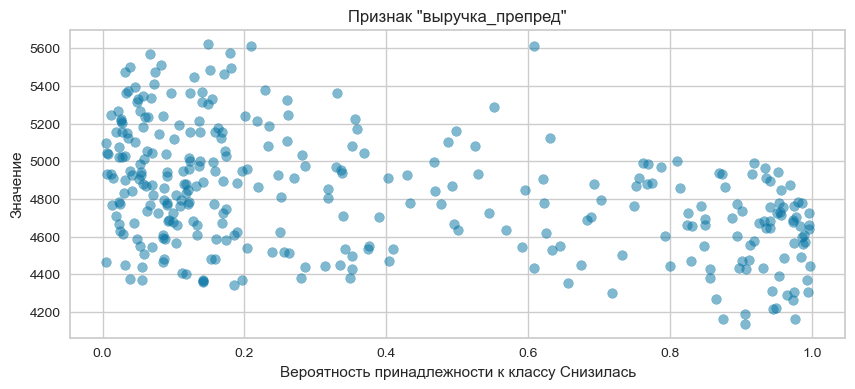

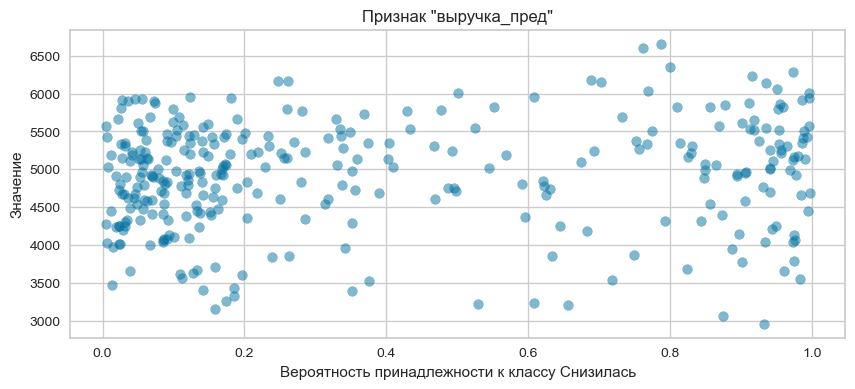

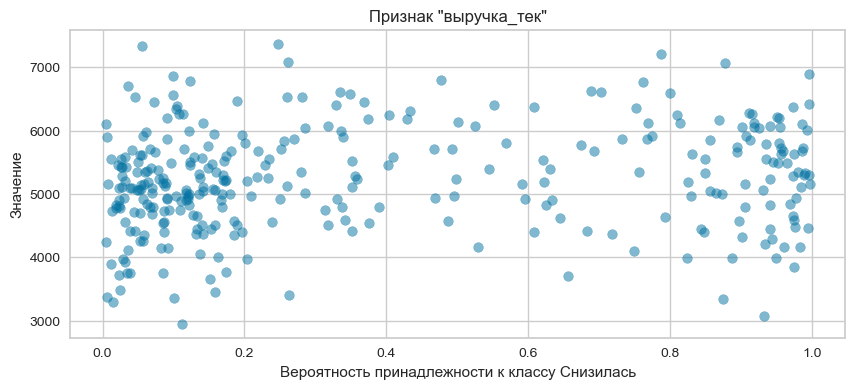

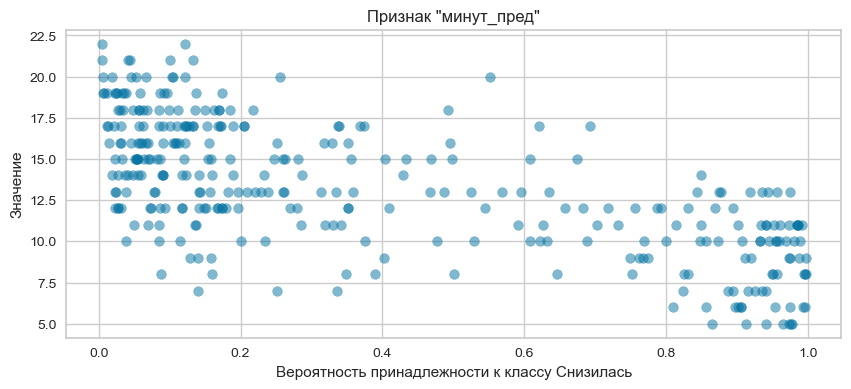

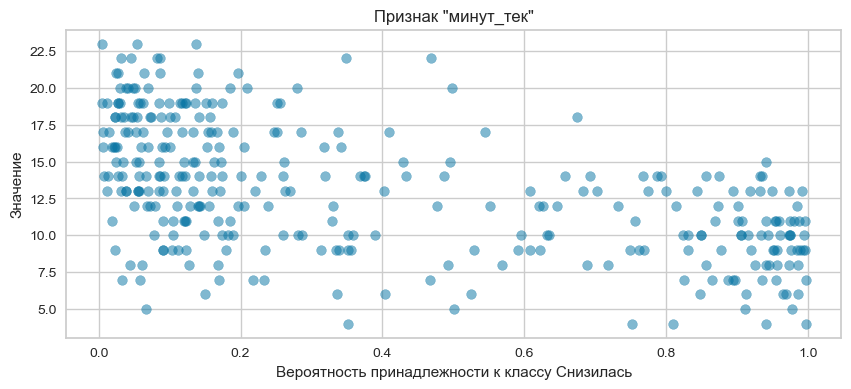

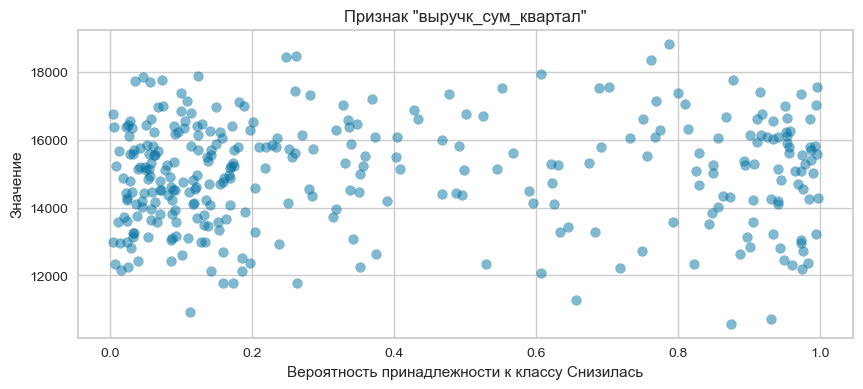

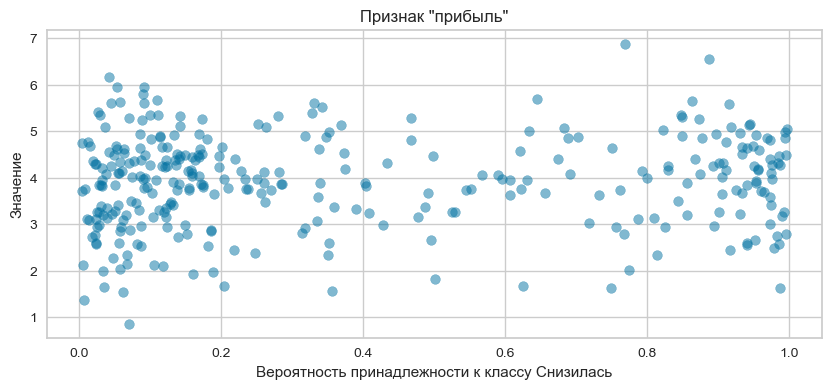

In [171]:
# оценим какие занчения количественных признаков характерны для группы 'Снизилась'
for name in segment_customer.select_dtypes(include = 'number').columns.to_list():
    if name != 'вероятность_активности':
        plt.figure(figsize=(10, 4))
        plt.title(f'Признак "{name}"')
        plt.xlabel('Вероятность принадлежности к классу Снизилась')
        plt.ylabel(f'Значение')
        plt.scatter(x=segment_customer['вероятность_активности'], 
                    y=segment_customer[name],
                    alpha=0.5, 
                    )

- большая вероятность приннадлежности к классу `Снизилась` наблюдается при значении `маркет_актив_6_мес` меньше 3.
- клиенты у  которых доля товаров с акцией больше 0.6 с большой вероятностью имеют класс `Снизилась`.
- признак `средний_просмотр_категорий_за_визит` меньше 2 характерен в основном для класса `Снизилась`.
- кол-во неоплаченных товаров в корзине больше 5 также характерна для класса `Снизилась`
- выручка за препредыдущий месяц показывает, что клиенты с классом `Cнизилась` имеет в основном выручку меньше 5000.
- кол-во минут на сайте за текущий и предыдущий месяц в основном не больше 13 минут для класса `Снизилась`.
- по вем остальным трудно выделить более точные границы для класса `Снизилась`

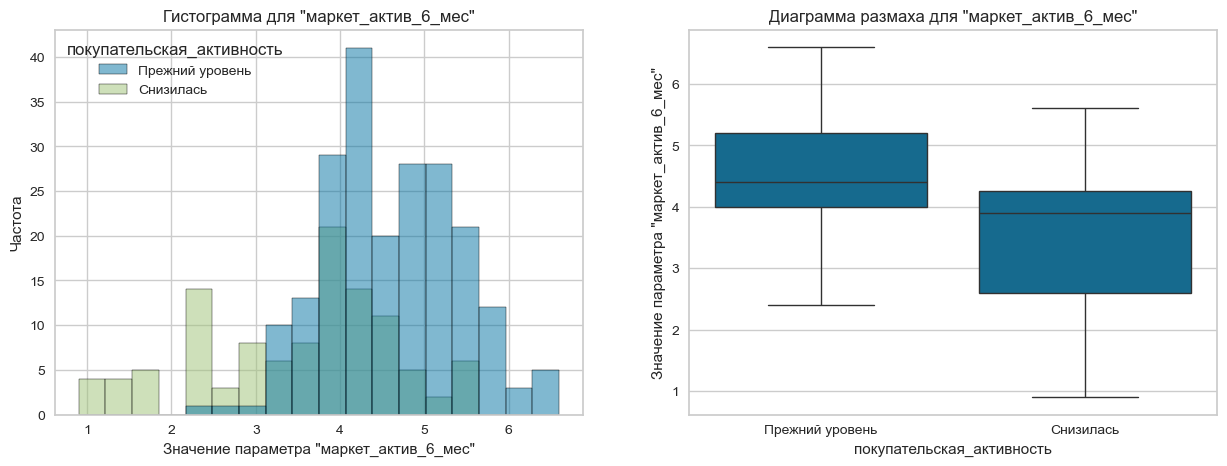

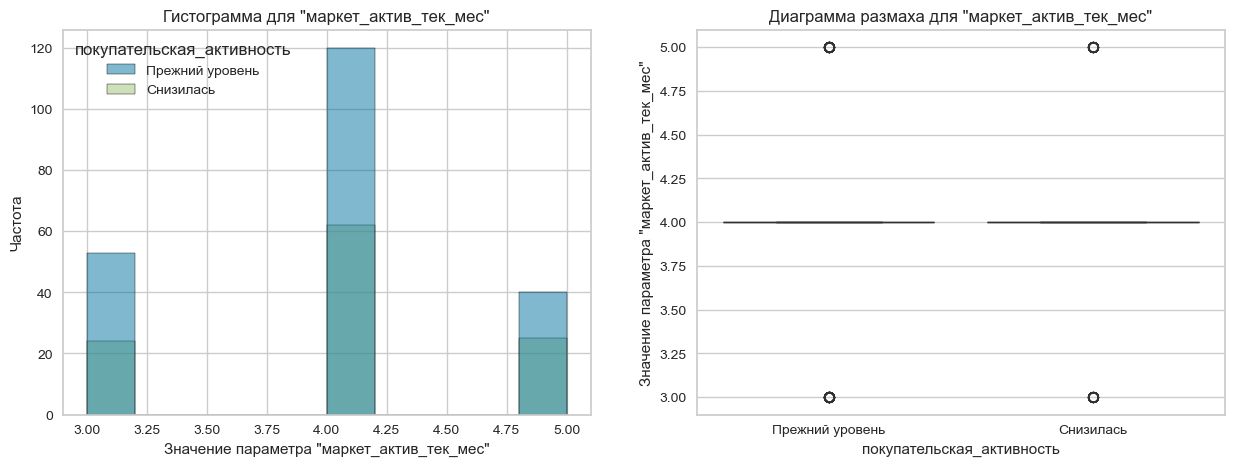

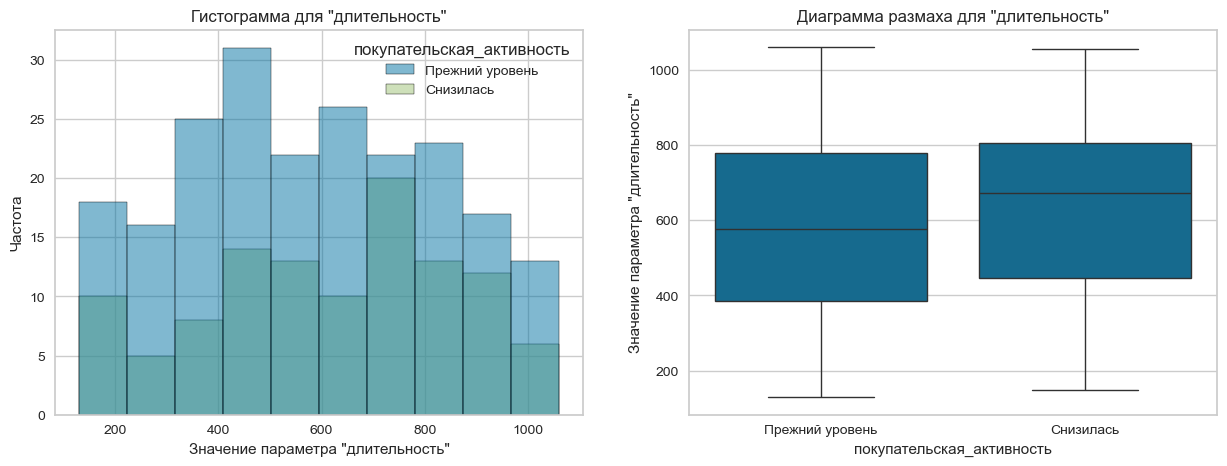

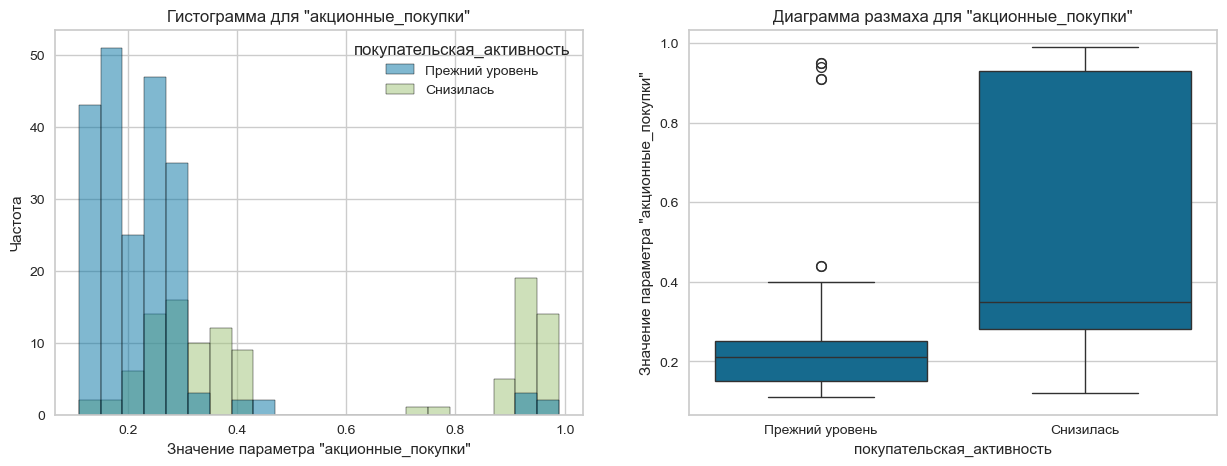

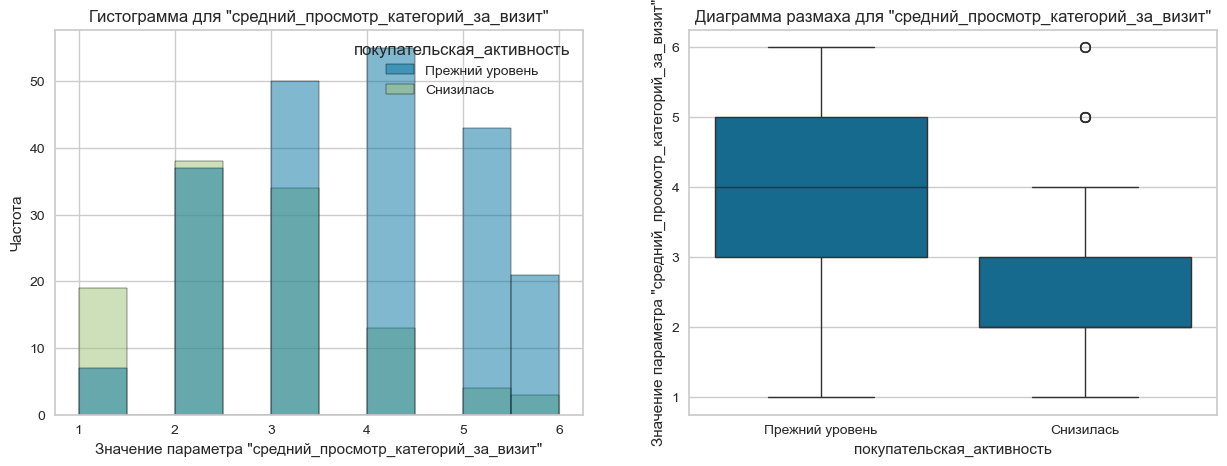

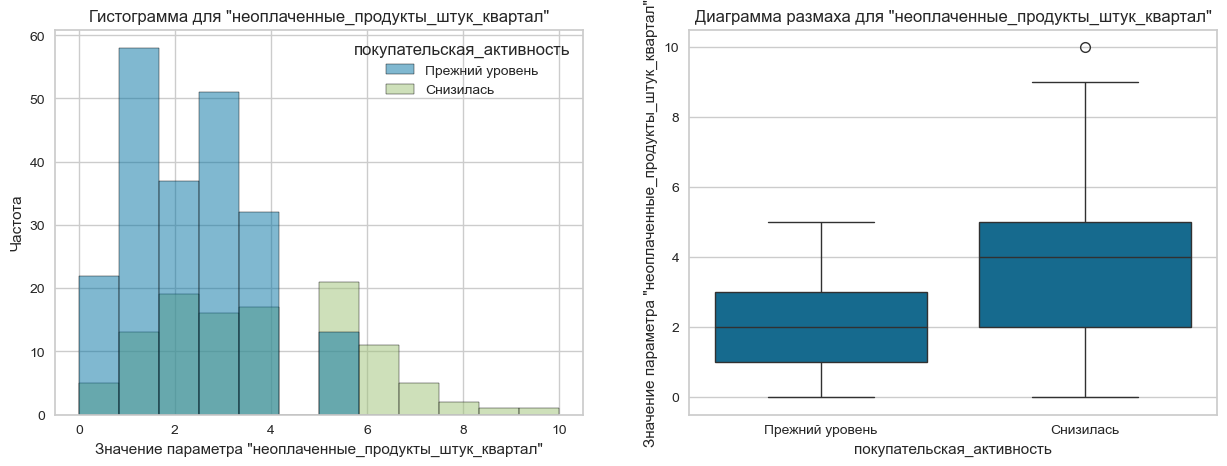

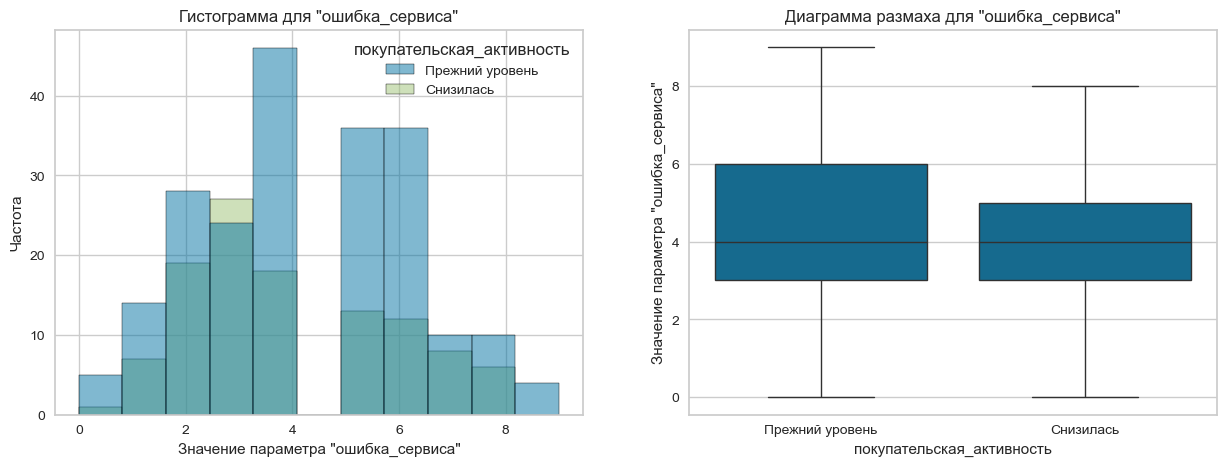

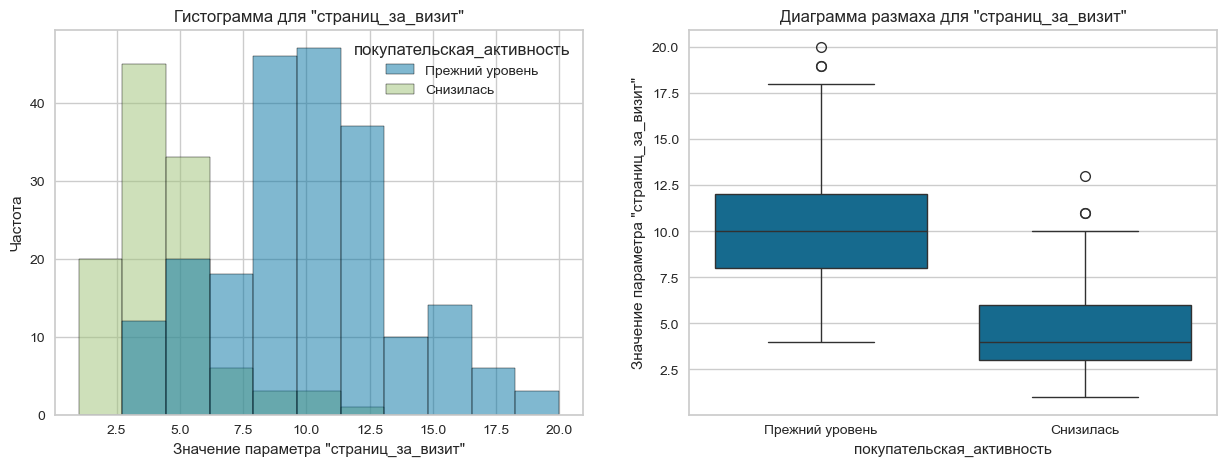

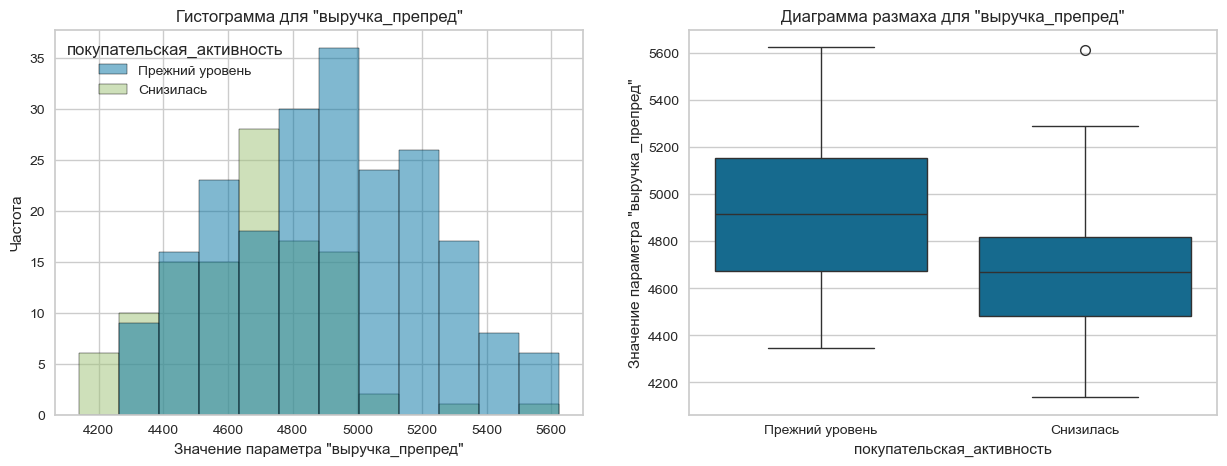

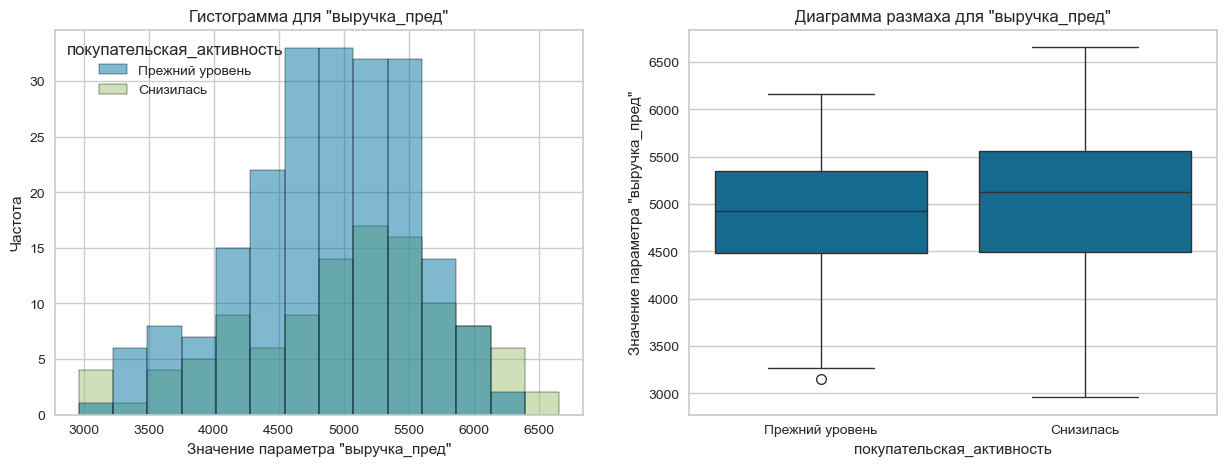

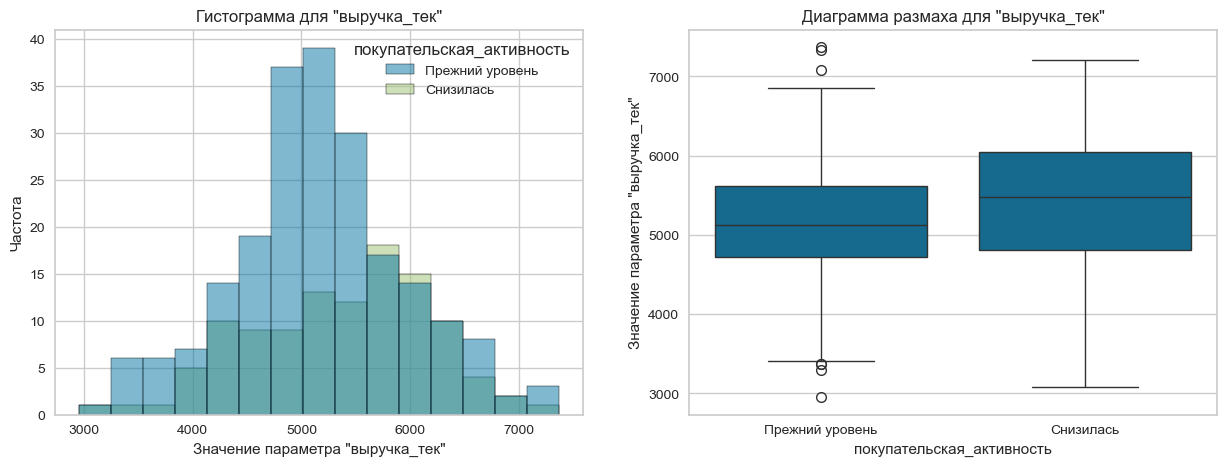

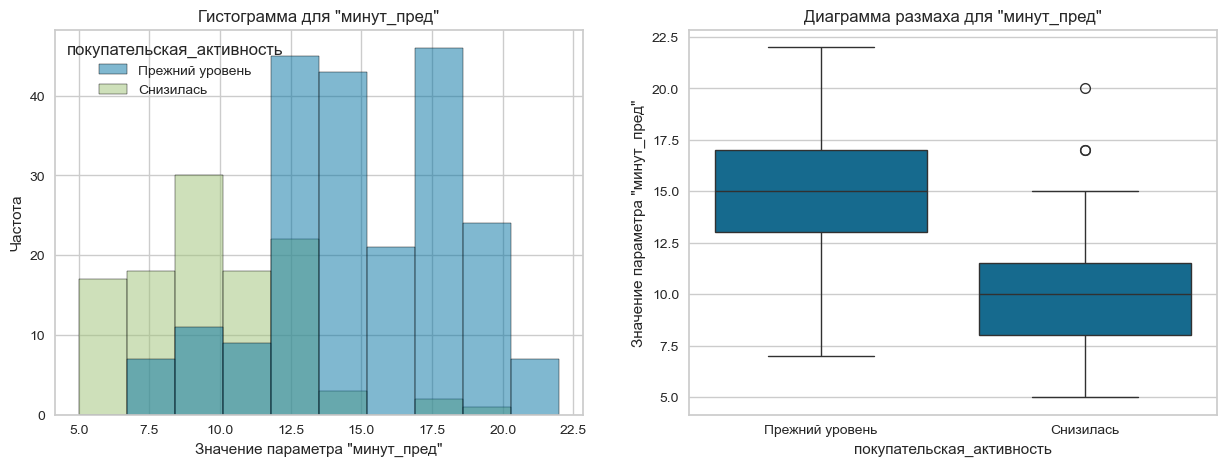

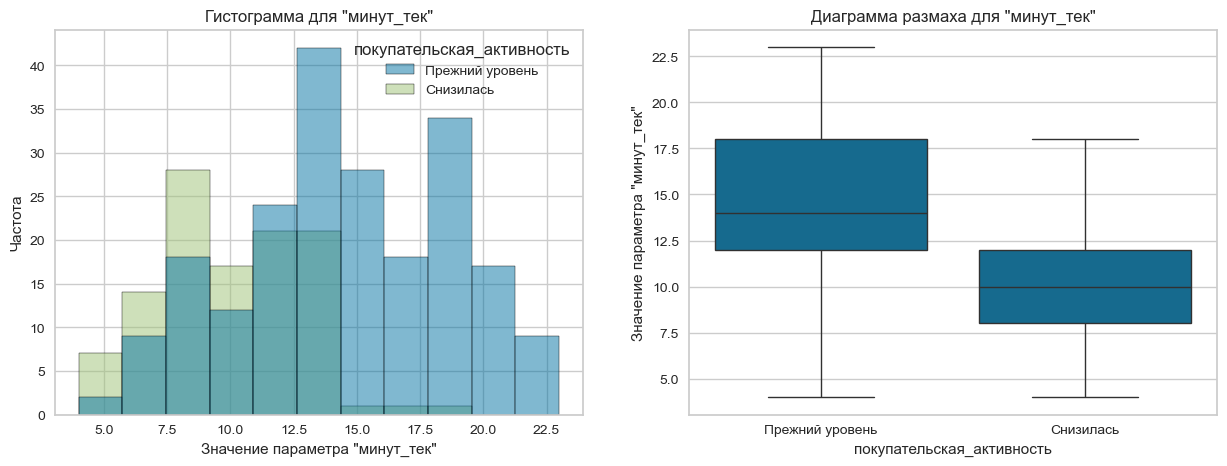

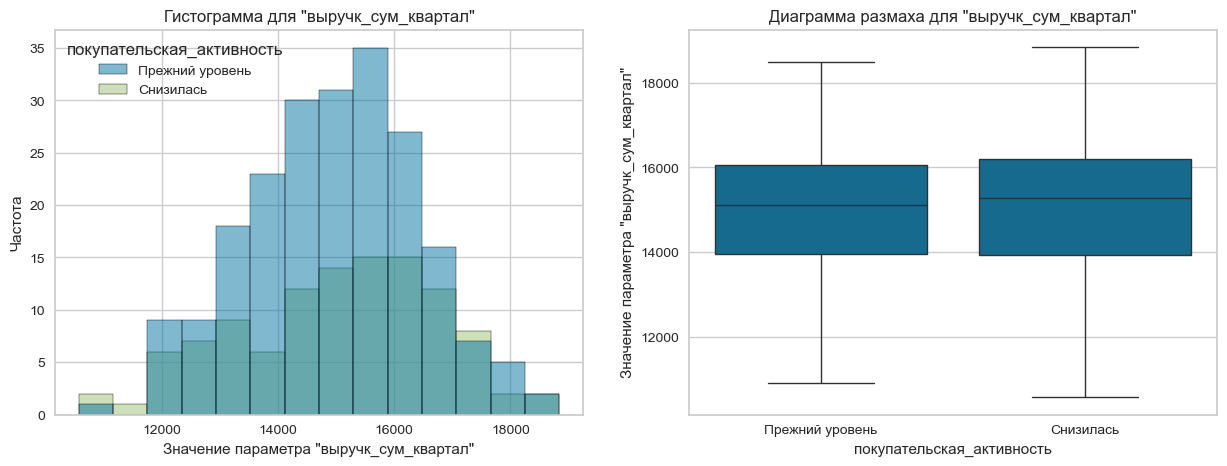

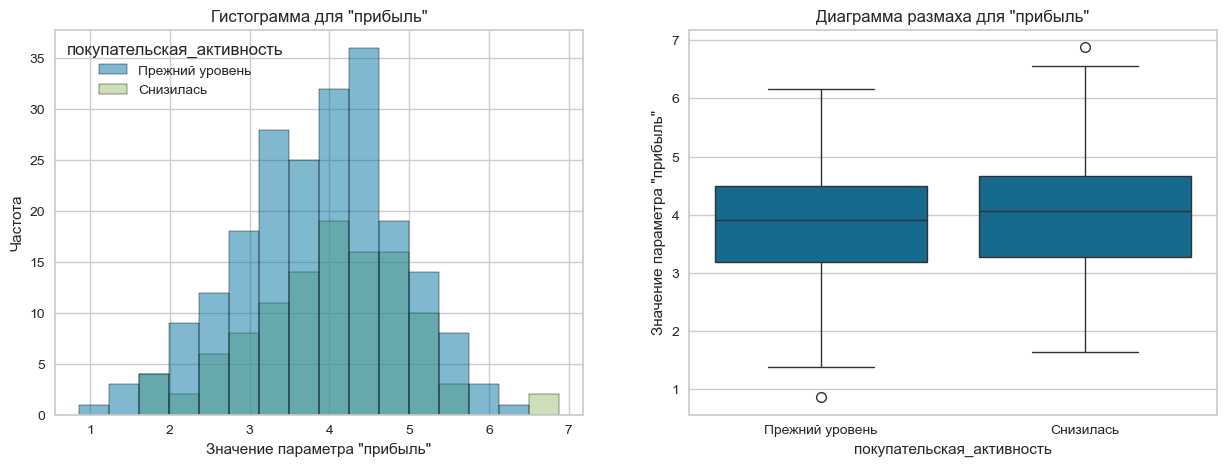

In [173]:
# вывозовим функции для построения графиков с количественными признаками
for name in segment_customer.select_dtypes(include = 'number').columns.to_list():
    if name != 'вероятность_активности':
        build_histogram_boxplot_2(segment_customer, name)
        plt.show()

- В целом выводы выше также подходят для описания данных гистограмм и диграмм размаха. 
- Суммарна выручка за три месяца показывает, что в среднем на одного человека у класса `Снизилась` и `Прежний уровень` выручка пратически одинакова.
- Средемесячна прибыль с одного клиента равна примерно от 1300 до 4600(это 75% клиентов), остальная часть(25%) готова платить до 6900 рублей. Нет смысла предлагать клиентам особо дорогие товары, нужно ориентироваться на сумму 1300 - 4600 рублей. Те кто платит больше скорей всего покупают товары с длинным сроком жизни(техника).

Посмторим распределение категориальных признаков.

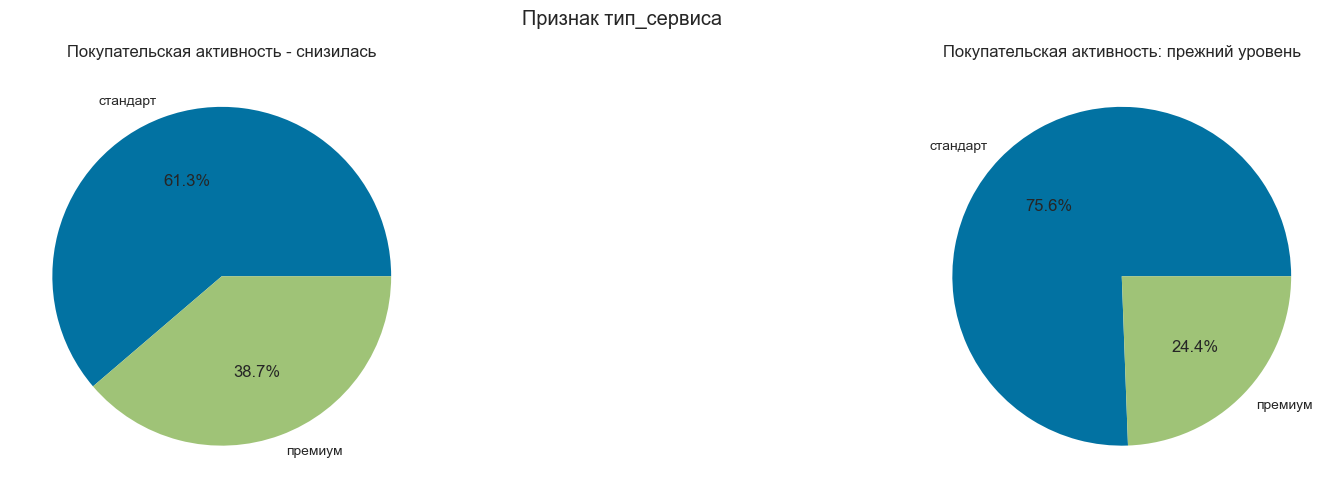

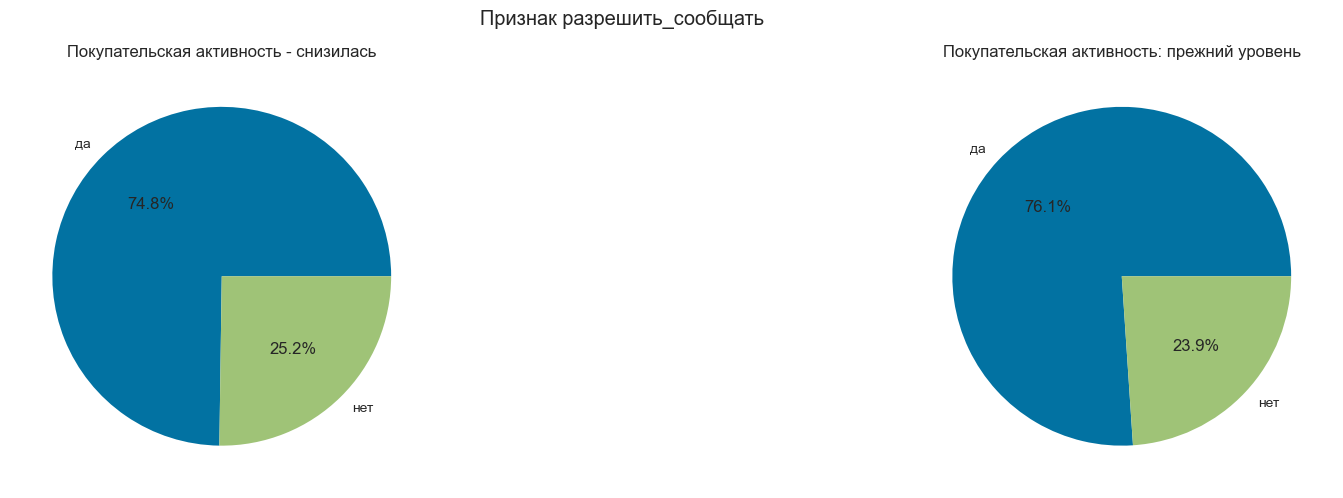

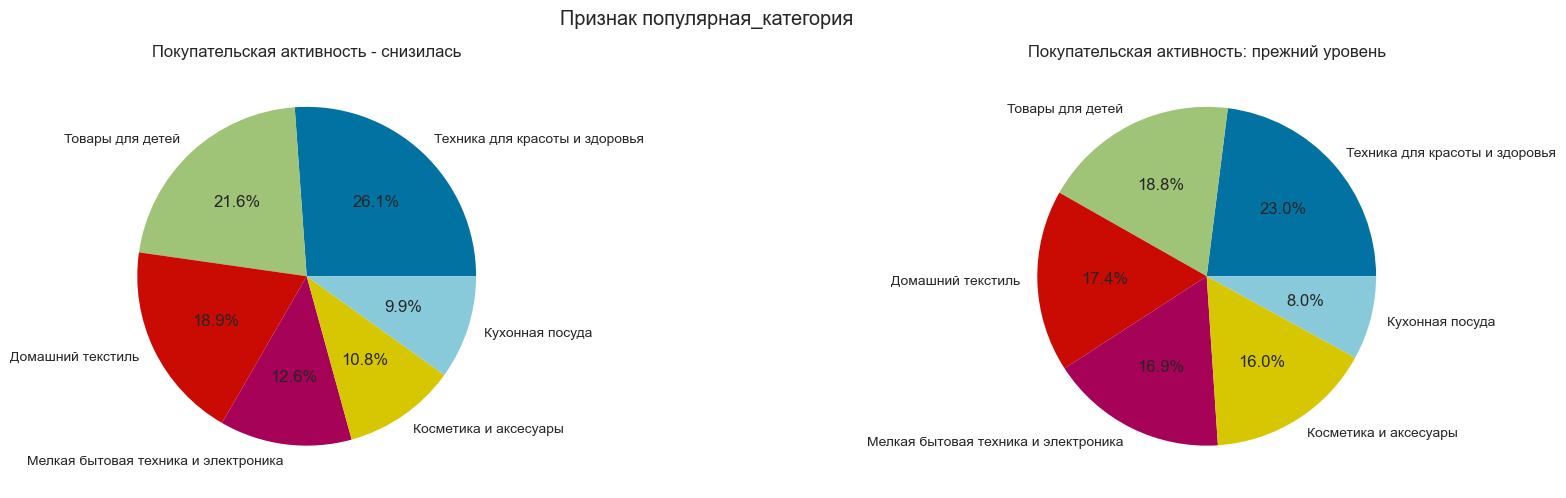

In [175]:
# вызовем функцию для построение круговых диаграм категориальных признаков 2 классов
for name in segment_customer.select_dtypes(exclude = 'number').columns.to_list():
    if name != 'покупательская_активность':   
        build_pie_2(segment_customer, name)

У двух групп нет особо больших различий. 

Категории `Товары для детей`, `Техника для красоты и здоровья`, `Домашний текстиль` пользуется большим спросом среди остальных. Данные категории наводят на мысль что покупатели в основном женщины, которые любят делать покупки для детей, для своего здоровья и домашнего уюта.

Скорей всего для класса `Снизилась` нужно продумать более точечный маркетинг нацеленный на женщин и на определенные товары. Так как в группе `Снизилась` преобладает категории `Товары для детей` и `Техника для красоты и здоровья`, то можно сделать фокус именно на них, предлагая заманчивые предложения, акции, промокоды... 

На основе данного анализа выберем дополнительный сегмент для исследования:
- Группа клиентов с максимальной долей покупок по акции и высокой вероятностью снижения покупательской активности.

In [178]:
# отберем клиентов с максимальной долей покупок по акции и высокой вероятностью снижения покупательской активности
operation_client = segment_customer.query('(акционные_покупки > 0.6) and (вероятность_активности > 0.8)')

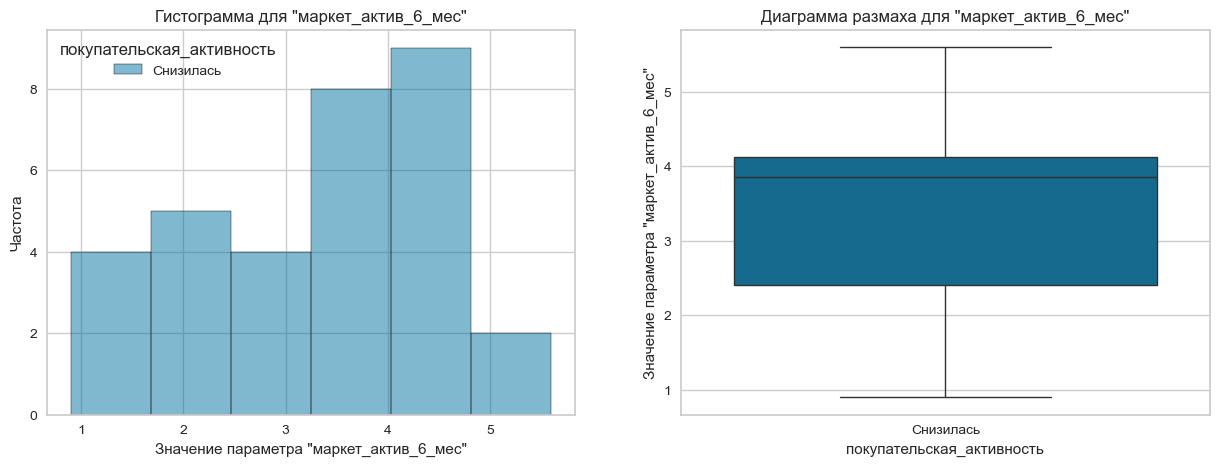

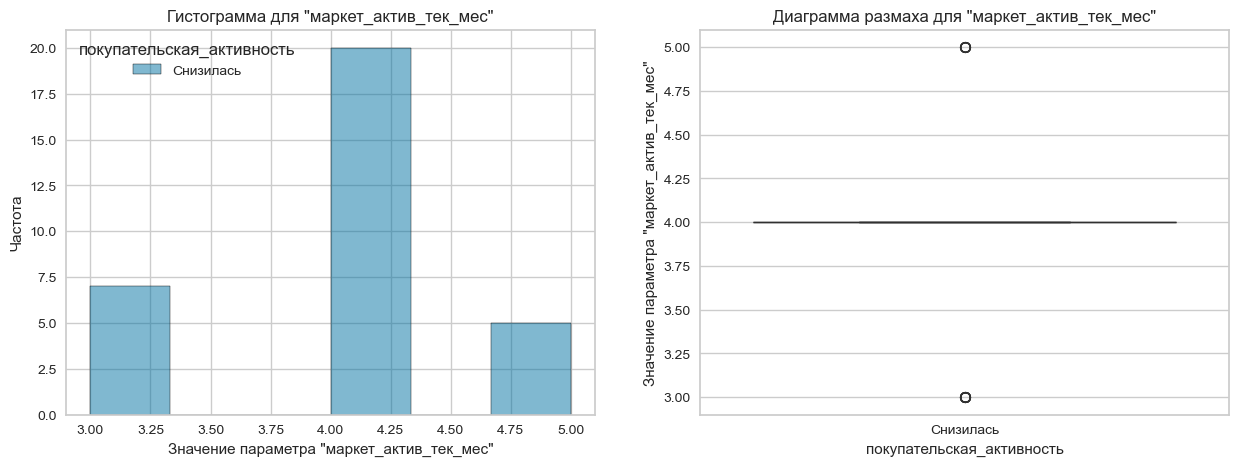

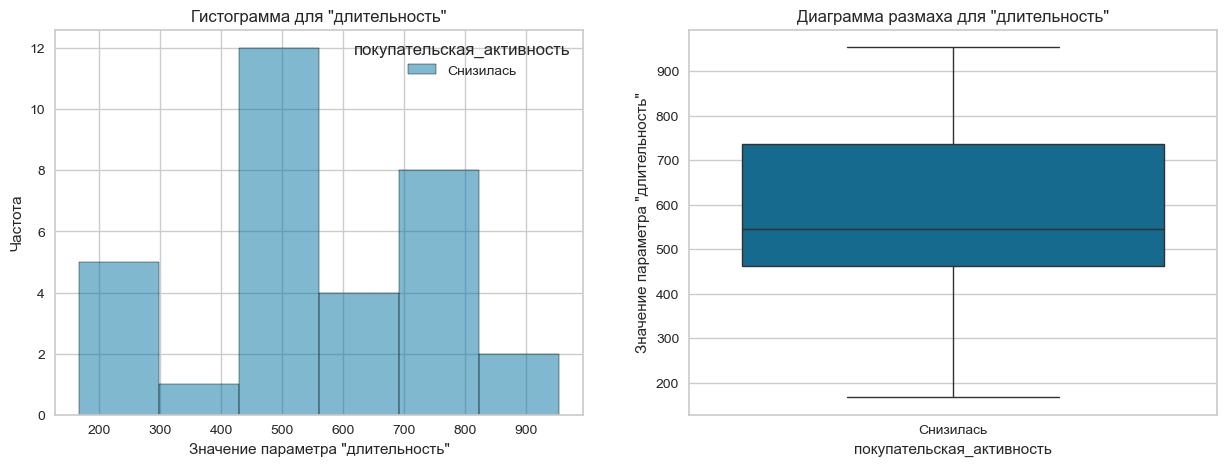

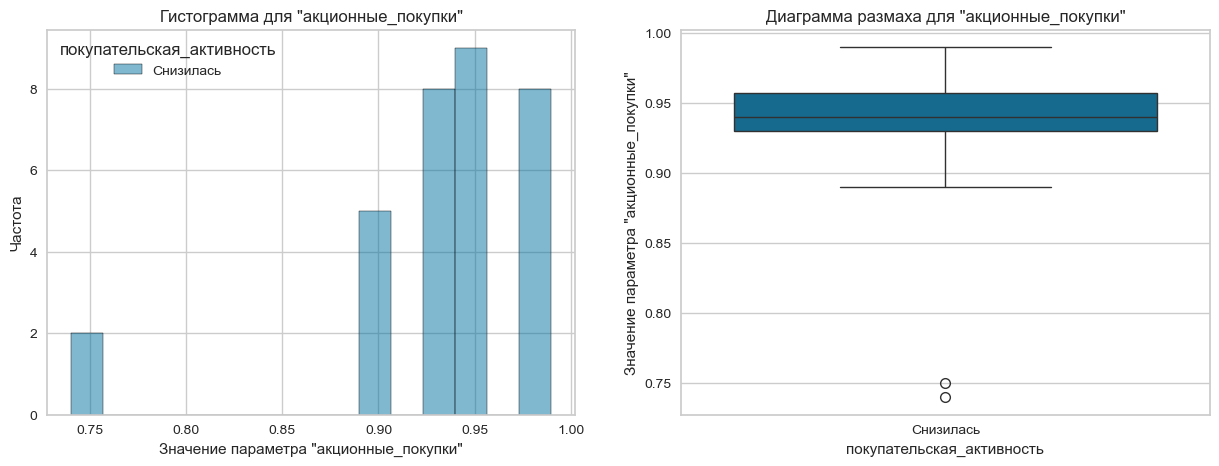

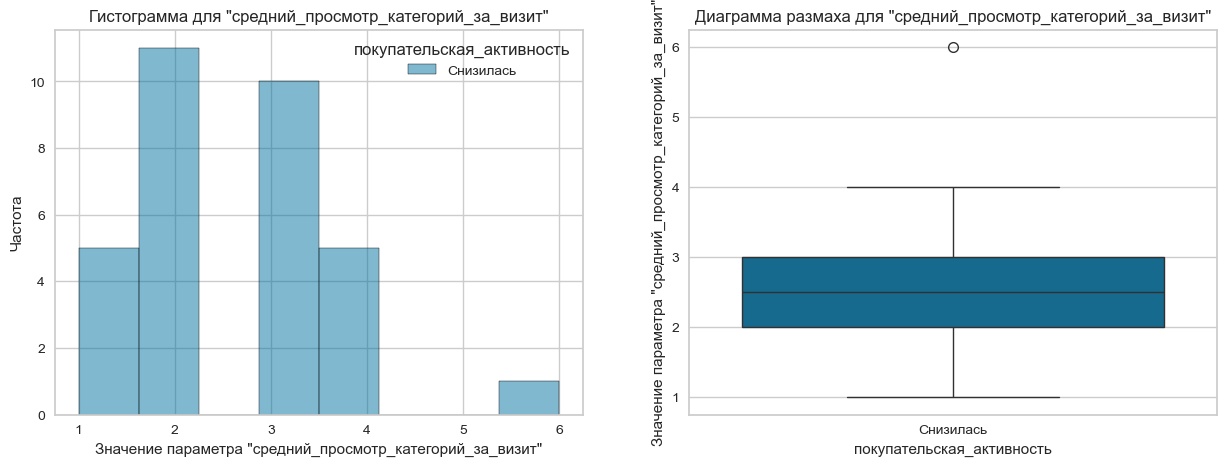

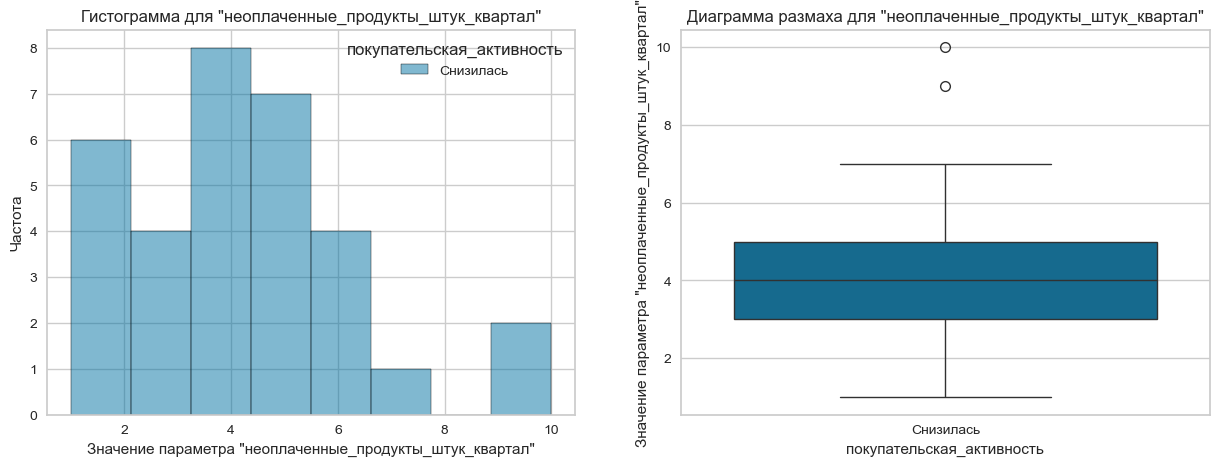

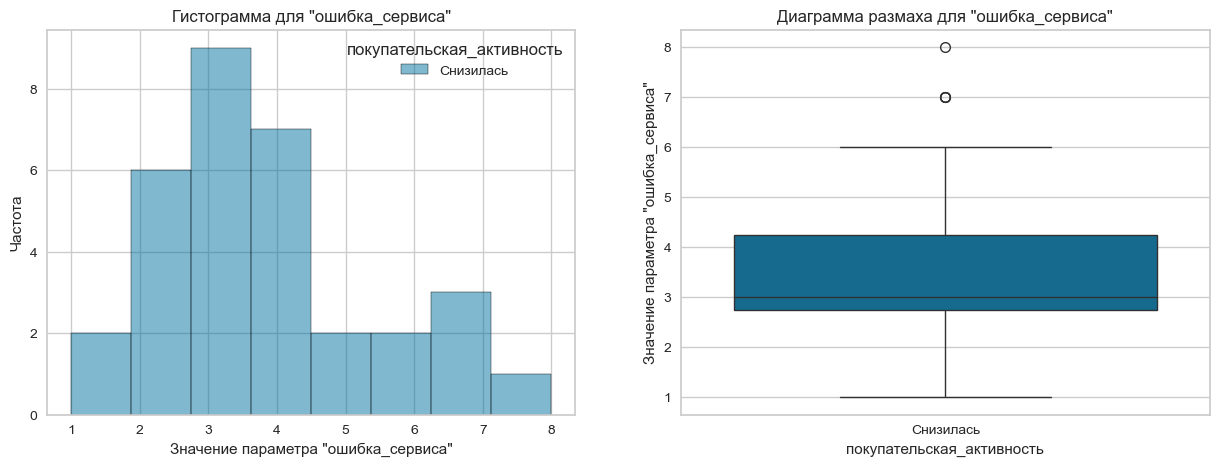

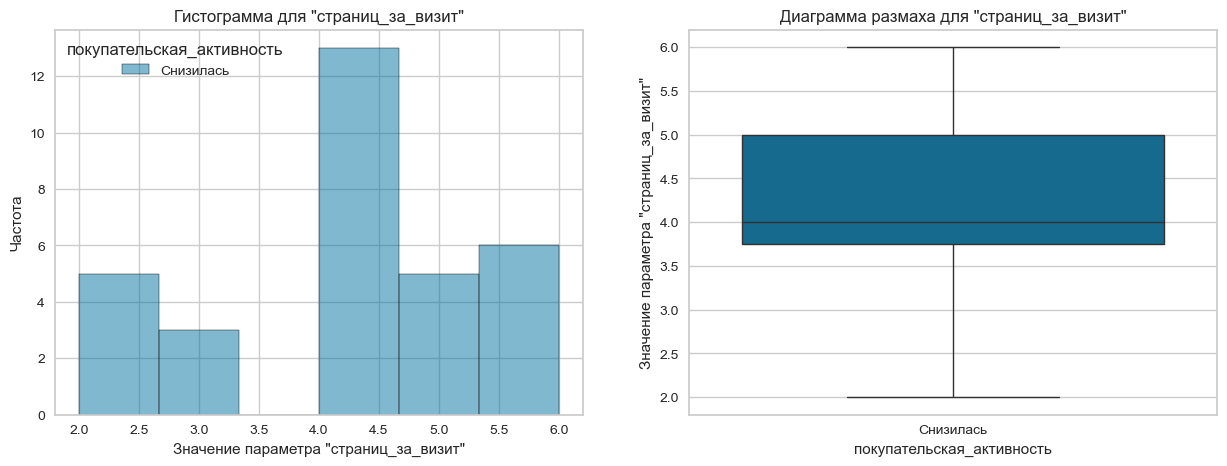

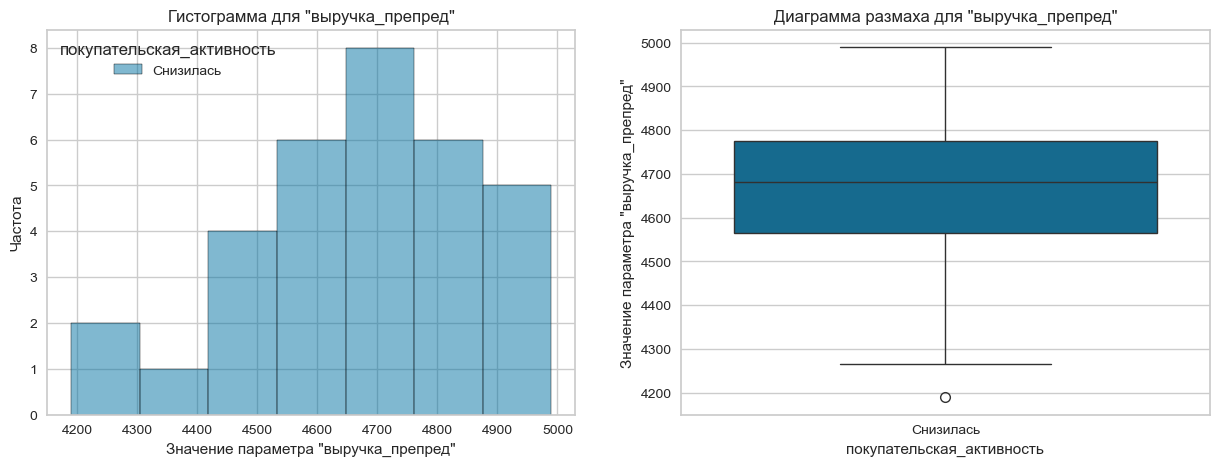

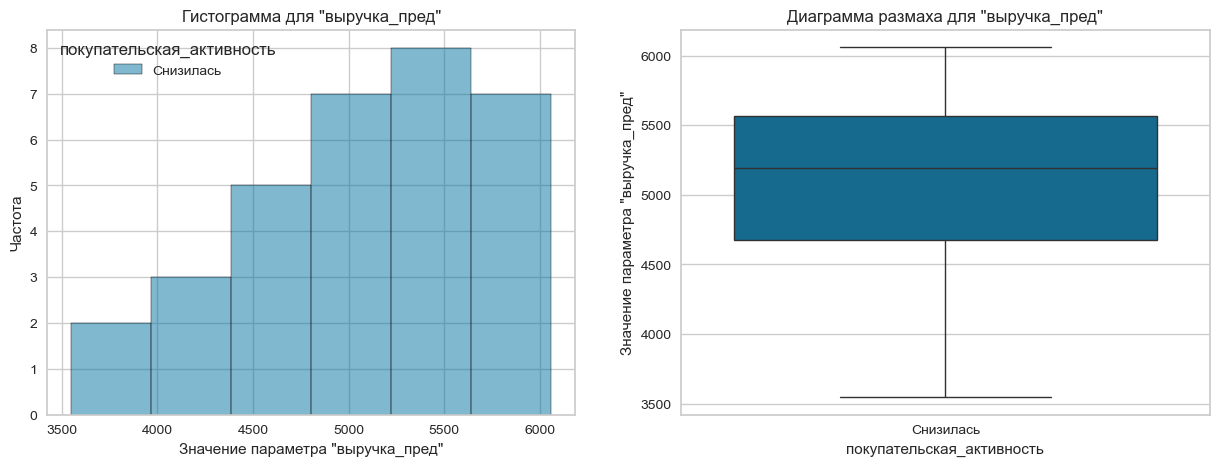

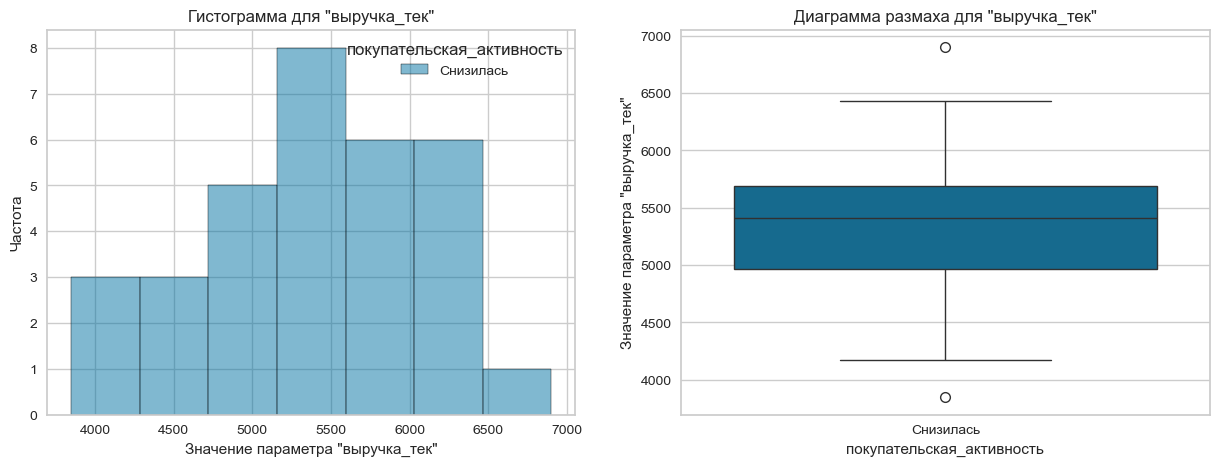

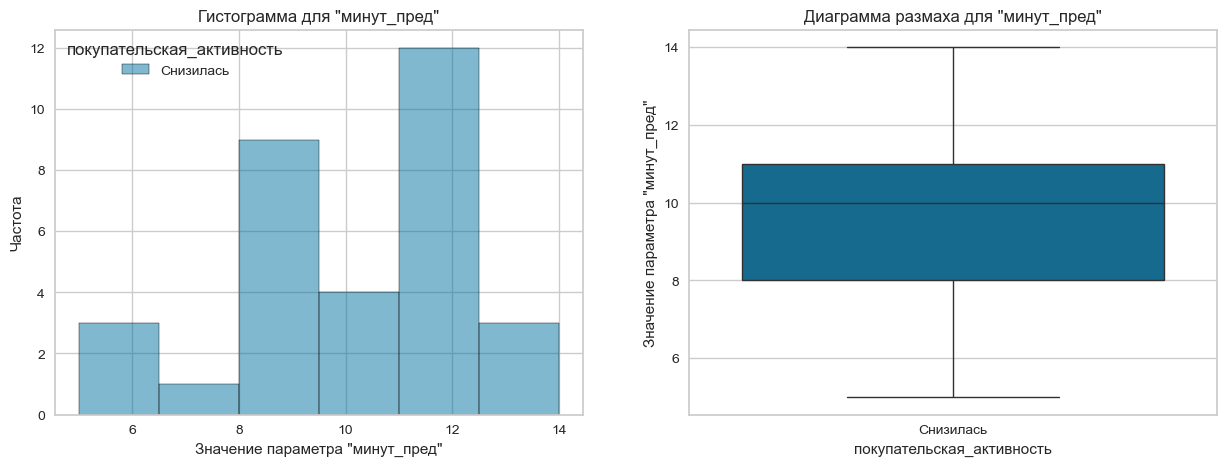

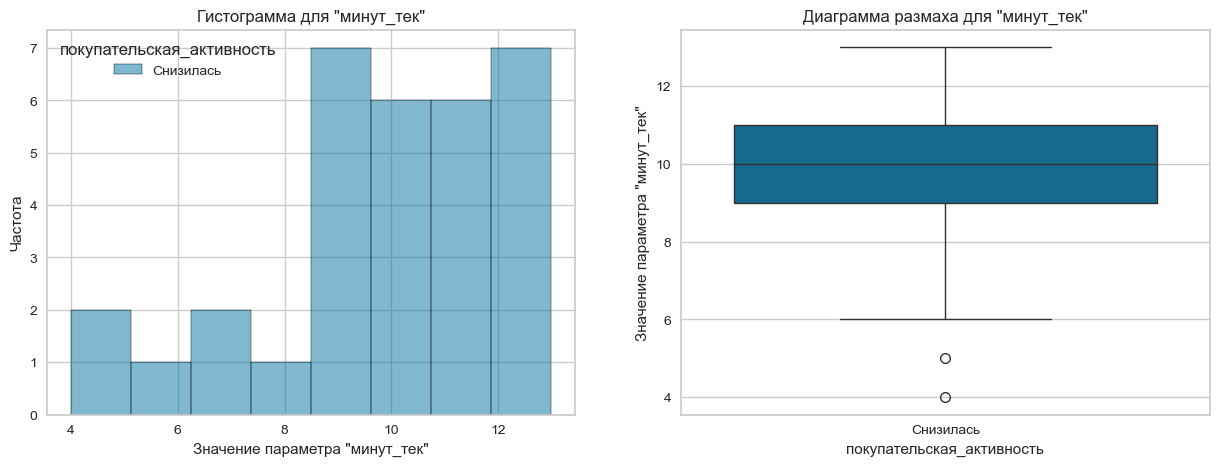

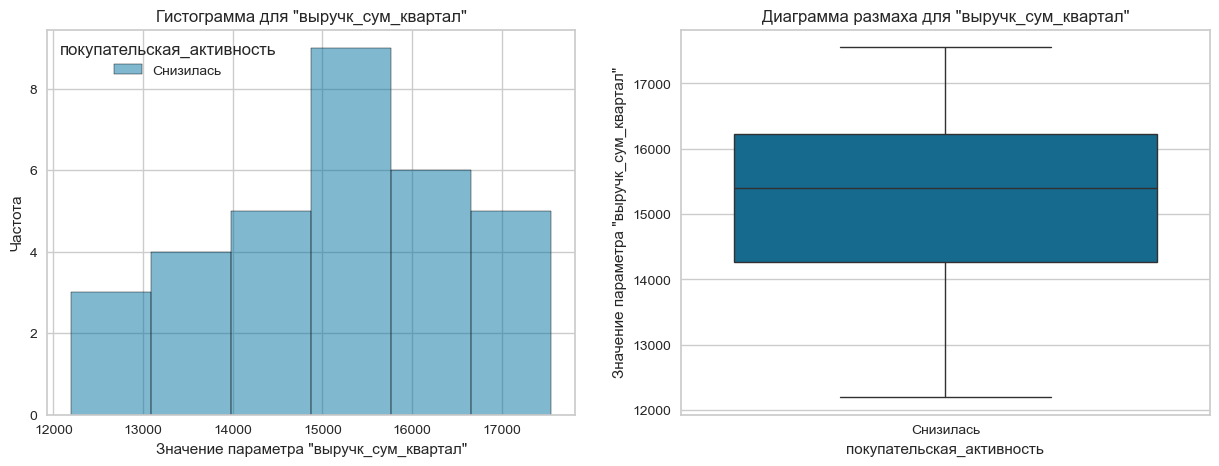

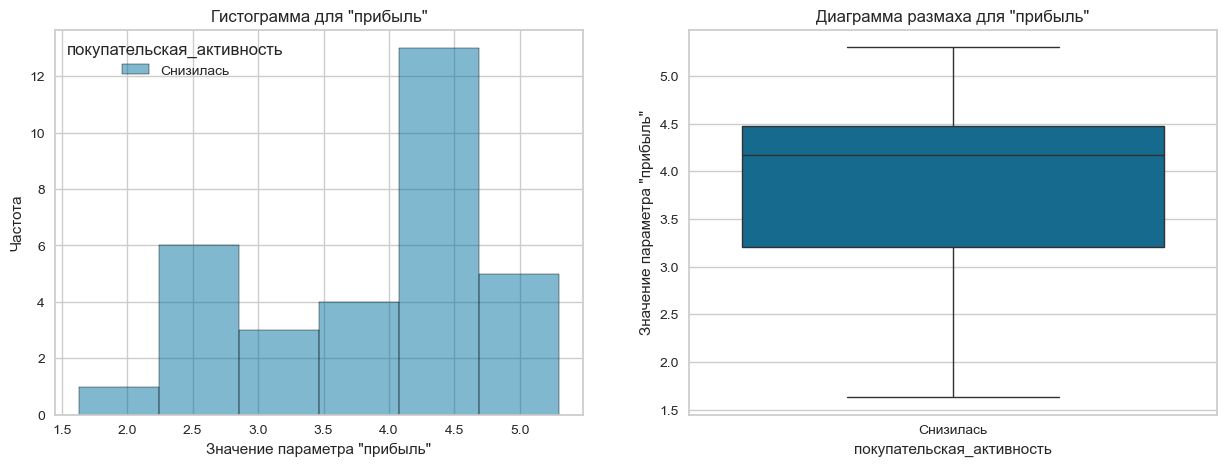

In [179]:
# вывозовим функции для построения графиков с количественными признаками
for name in operation_client.select_dtypes(include = 'number').columns.to_list():
    if name != 'вероятность_активности':
        build_histogram_boxplot_2(operation_client, name)
        plt.show()

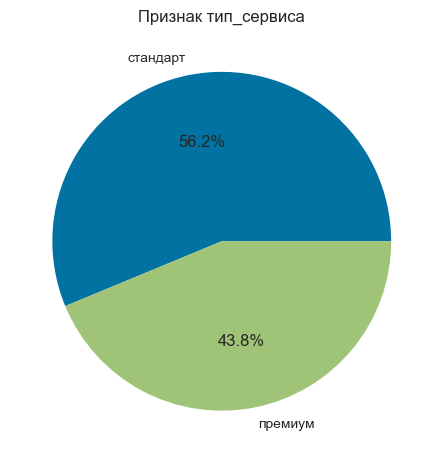

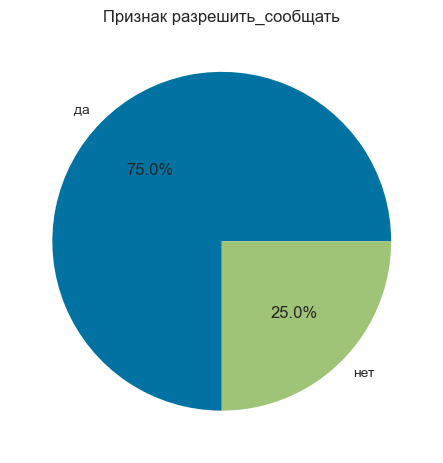

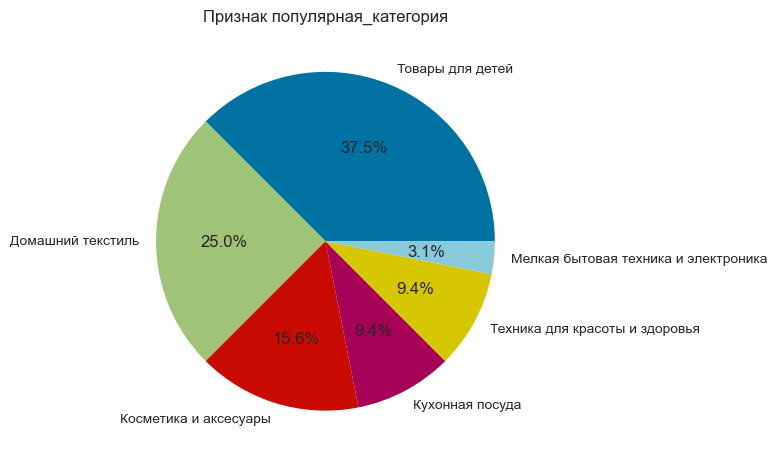

In [180]:
# вызовем функцию для построение круговых диаграм категориальных признаков 2 групп
for name in operation_client.select_dtypes(exclude = 'number').columns.to_list():
    if name != 'покупательская_активность': 
        plt.title(f'Признак {name}')
        operation_client[name].value_counts().plot(kind = 'pie', ylabel = '',  autopct='%1.1f%%', )
        plt.show()

In [181]:
warnings.filterwarnings('ignore')

In [182]:
# добавим столбец разница_выручка_тек_пред
operation_client['разница_выручка_тек_пред'] =  operation_client['выручка_тек'] - operation_client['выручка_пред']

In [183]:
# добавим столбец разница_выручка_пред_предпре
operation_client['разница_выручка_пред_предпре'] =  operation_client['выручка_тек'] - operation_client['выручка_препред']

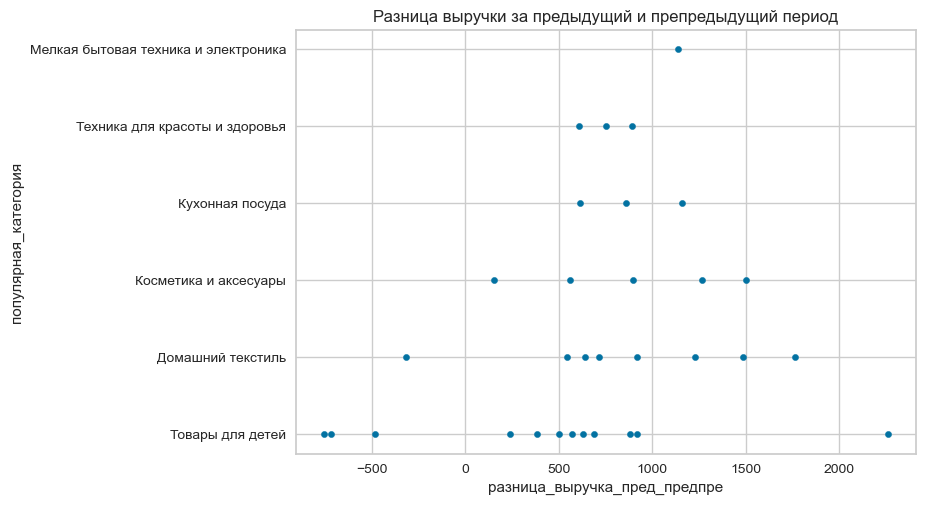

In [184]:
# посмторим какие категории имеют отрицательную разницу выручки за предыдущий и препредыдущий период
operation_client.plot(y = 'популярная_категория', x = 'разница_выручка_пред_предпре', kind = 'scatter')
plt.title('Разница выручки за предыдущий и препредыдущий период')
plt.show()

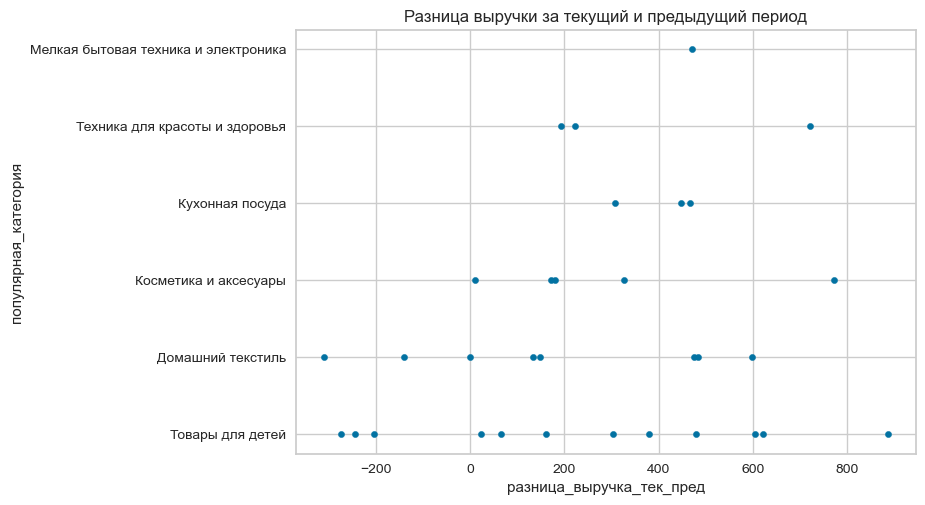

In [185]:
# посмторим какие категории имеют отрицательную разницу выручки за текущий и предыдущий период
operation_client.plot(y = 'популярная_категория', x = 'разница_выручка_тек_пред', kind = 'scatter')
plt.title('Разница выручки за текущий и предыдущий период')
plt.show()

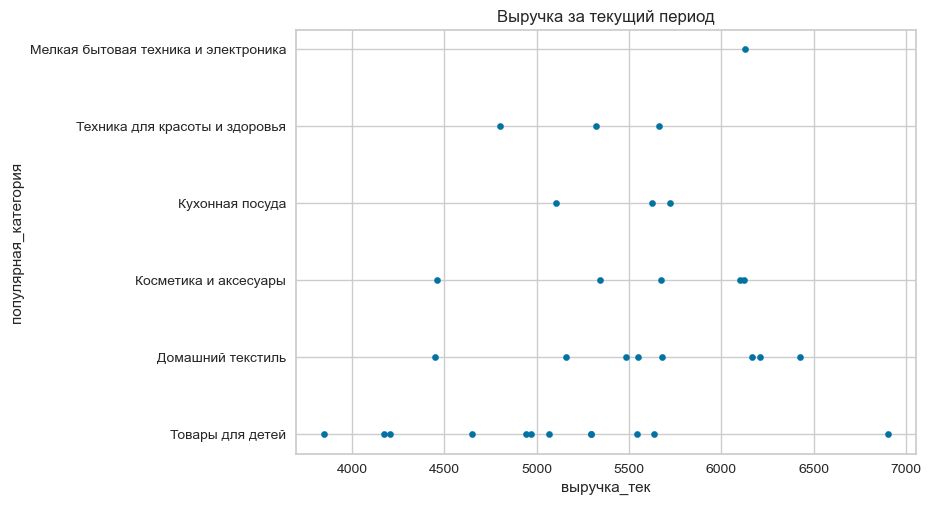

In [186]:
# выручка за текущий месяц по категориям
operation_client.plot(y = 'популярная_категория', x = 'выручка_тек', kind = 'scatter')
plt.title('Выручка за текущий период')
plt.show()

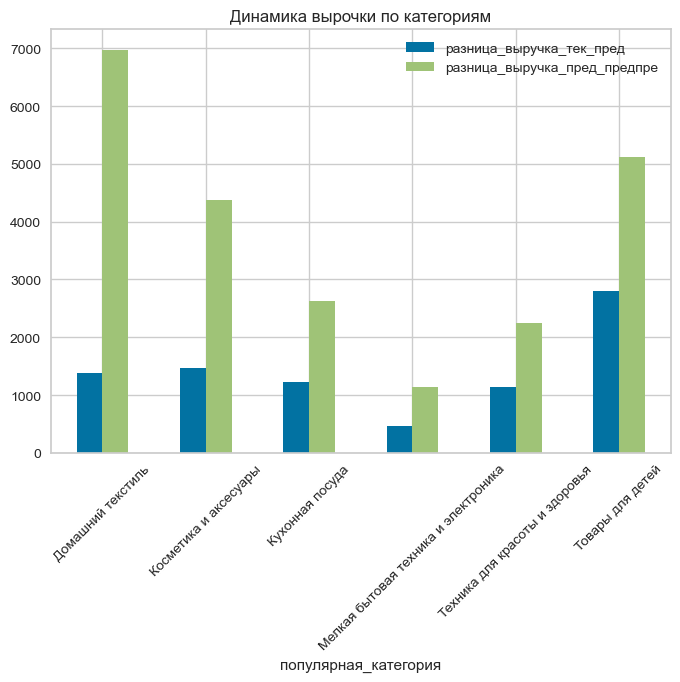

In [304]:
table = operation_client.groupby('популярная_категория')[["разница_выручка_тек_пред", "разница_выручка_пред_предпре"]].sum()
table.plot(kind="bar", title='Динамика вырочки по категориям', rot=45);

В итоге по графикам видно, что отрицательная разница выручки между периодами характерная для категорий `Товары для детей` и `Домашний текстиль`. В текущем месяце выделяется группа клиентов с пониженной выручкой в сравнении с остальными на категориях `Товары для детей` и `Домашний текстиль`. 

Выводы по дополнительному сегменту:

- маркетинг для клиентов есть, но для кого-то больше для кого-то меньше, и непонятно на что именно он направлен, возможно нужно больше привлекать внимания на категории `Товары для детей` и `Домашний текстиль`.
- в основном для клиентов с дня регистрации прошло больше года, а кто-то пришёл недавно.
- в среднем просматривается немного категорий 2-3, скорей всего это и есть `Товары для детей` и `Домашний текстиль`
- в корзине в среднем на одного человека по 4 неоплаченных заказа, возможно на них стоит сделать спец предложения
- в среднем клиент тратит 10 минут на сайте за месяц
- среднемесячная прибыль от одного клиента примерно от 1600 до 4500(75% клиентов), остальные готовы заплатить примерно до 5600. Не стоит предлагать таким клиентам слшишком дорогие товары, желательно в диапазоне от 1600 - 4500 рублей.

## Общий вывод

Для нас были поставлены задачи:
1) Разработать модель, которая предскажет вероятность снижения покупательской активности.
2) Выделить сегмент покупателей, проанализировать их и предложить, как увеличить их покупательскую активность.

Исходные данные: 
 - Таблица, которая содержит данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении.
 - Таблица с данными о выручке, которую получает магазин с покупателя, то есть сколько покупатель всего потратил за период взаимодействия с сайтом.
 - Таблица с данными о времени (в минутах), которое покупатель провёл на сайте в течение периода.
 - Таблица с данными о среднемесячной прибыли продавца за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю.

Что для этого было сделано:

1) Загрузили данны и необходимые библиотеки.
2) Сделали предобработку данных:
   
    - название столбцов привели к строчному прописанию.
    - пропусков не обнаружено.
    - Изменили в столбцах `маркет_актив_6_мес`, `акционные_покупки`, `выручка` тип данных  с str на float.
    - Заменили предыдцщий_месяц на предыдущий_месяц
    - Заменили стандартт на стандарт
    - Явные и неявные дубликаты не обнаружены

3) Провели исследовательский анализ данных:

    - Было удалено 4 пользователя: 1 с аномальной выручкой и остальные с слишком низкой выручкой.
    - Отобраны пользователи с покупательсокой активностью не менее 3 месяцев.

4) Объединили таблицы `market_file.csv`, `market_money.csv`, `market_time.csv`. Получили итоговую таблицу с новыми столбцами: `выручка_препред`, `выручка_пред`, `выручка_тек`, `минут_пред`, `минут_тек`.
5) Корреляционный анализ показал, что между входными признаками не большие зависимости, кроме `выручка_тек` и `выручка_пред`. Для уменьшения влияние мультиколлиниарности не учитывали столбец `выручка_тек` при обучении модели.
6) Использовали пайплайн для поиска лучшей модели:

    - Обучили четыре модели: KNeighborsClassifier(), DecisionTreeClassifier(), LogisticRegression() и SVC(). Для каждой из них подбрали разный набор гиперпараметров.
    - Использовали метрику ROC-AUC как основную, дополнительно оценили метрику F1-score
    - Получили лучшую модель LogisticRegression() с параметрами (C=1, penalty='l1', random_state=42, solver='liblinear')
    - Значение метрик ROC-AUC = 0.90 на тренировочной и ROC-AUC = 0.91, F1-score = 0.86 на тестовой выборке. 

7) Проанализировали важность признаков:

    - Чем больше значения признаков `неоплаченные_продукты_штук_квартал`, `акционные_покупки`, `длительность` тем вероятней актиновсть покупателя `Снизилась`.
    - Признаки: `тип_сервиса_стандарт`, `разрешить_сообщать_нет`, `маркет_актив_тек_мес`, `выручка_пред` меньше всех повлияли на активность покупателя.
    - Чем больше значения всех остальных признаков, тем вероятней, что покупательская активность осталась на прежнем уровне.
    - Для бизнеса нужно обратить на таких клиентов, которые мало проводят вермени на сайте, просматривают немного категорий, предпочитают покупать по акциям, у них много неопалченных товаров в корзине и оценить сколько на них действует маркетинговых кооммуникаций, возможно их стоит сделать больше. Для повышения покупательской активности таких клиентов, нужно подготовить какие-либо специальные предложения, акции, промокоды.
8) Выделили сегмент покупателей, провели анализ. Наиболее важные выводы для бизнеса:

    - Нужно обратить внимание на клиентов на которых мало задейстовано маркентинга(меньше 3), они в основом и имеют низкую активность.
    - Покупательская активность снизилась у группы клиентов, которые покупают товары в основом по акциям, для них нужно больше спец.предложений
    - Средемесячна прибыль с одного клиента равна примерно от 1300 до 4600(это 75% клиентов), остальная часть(25%) готова платить до 6900 рублей. Нет смысла предлагать клиентам особо дорогие товары, нужно ориентироваться на сумму 1300 - 4600 рублей. Те кто платит больше скорей всего покупают товары с длинным сроком жизни(техника).
    - Категории `Товары для детей`, `Техника для красоты и здоровья`, `Домашний текстиль` пользуется большим спросом среди остальных. Данные категории наводят на мысль что покупатели в основном женщины, которые любят делать покупки для детей, для своего здоровья и домашнего уюта.
    - Скорей всего для класса `Снизилась` нужно продумать более точечный маркетинг нацеленный на женщин и на определенные товары. Так как в группе `Снизилась` преобладает категории `Товары для детей` и `Техника для красоты и здоровья`, то можно сделать фокус именно на них, предлагая заманчивые предложения, акции, промокоды

9) Выделили дополнительный сегмент покупателей: группа клиентов с максимальной долей покупок по акции и высокой вероятностью снижения покупательской активности. Рекомендации для бизнеса:

    - маркетинг для клиентов есть, но для кого-то больше для кого-то меньше, и непонятно на что именно он направлен, возможно нужно больше привлекать внимания на категории `Товары для детей` и `Домашний текстиль`.
    - в среднем просматривается немного категорий 2-3, скорей всего это и есть `Товары для детей` и `Домашний текстиль`
    - в корзине в среднем на одного человека по 4 неоплаченных заказа, возможно на них стоит сделать спец предложения
    - в среднем клиент тратит 10 минут на сайте за месяц, не так много, нужно как то привлечь внимание, задеражать на сайте
    - среднемесячная прибыль от одного клиента примерно от 1600 до 4500(75% клиентов), остальные готовы заплатить примерно до 5600. Не стоит предлагать таким клиентам слшишком дорогие товары, желательно в диапазоне от 1600 - 4500 рублей.